# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-15 00:07:16.407741: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-15T00:07:19.457090
2025-04-15 00:07:19.457090


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 2
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 26
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-15 00:07:14"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

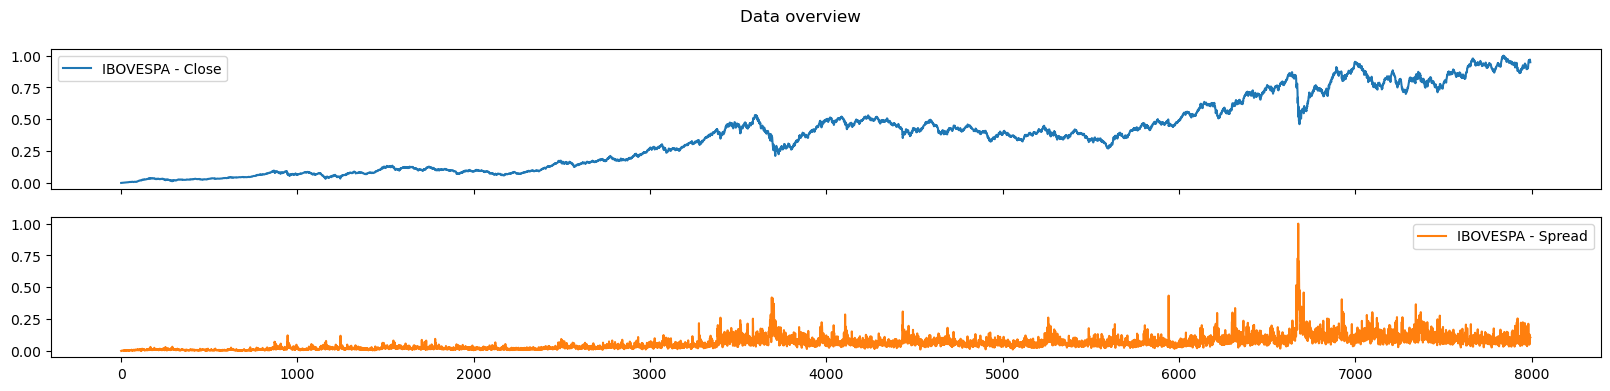

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

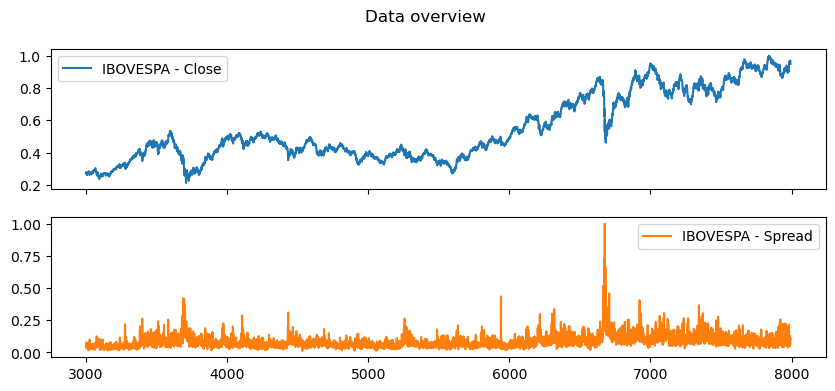

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

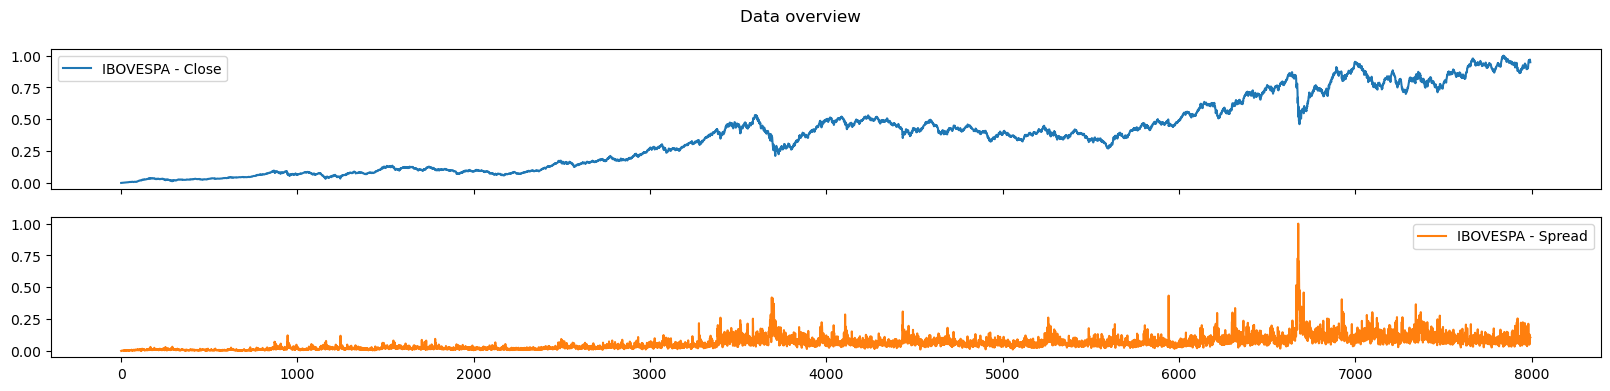

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

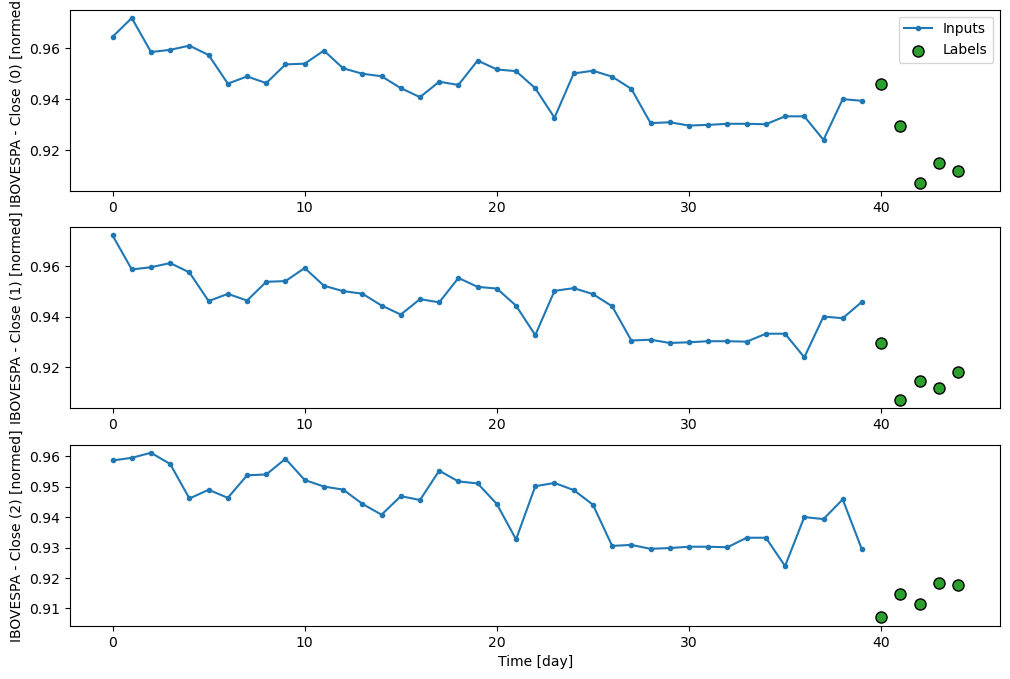

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

2

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9:11 2s/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.7411e-05 - root_mean_squared_error: 0.0076

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 74.6399 - mean_squared_error: 6.5063e-05 - root_mean_squared_error: 0.0079 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 64.0846 - mean_squared_error: 7.3329e-05 - root_mean_squared_error: 0.0084

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 56.5507 - mean_squared_error: 7.1479e-05 - root_mean_squared_error: 0.0084

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 51.1979 - mean_squared_error: 6.7865e-05 - root_mean_squared_error: 0.0082

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 46.9926 - mean_squared_error: 6.3913e-05 - root_mean_squared_error: 0.0079

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 43.7293 - mean_squared_error: 6.0567e-05 - root_mean_squared_error: 0.0077

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 41.1212 - mean_squared_error: 5.7736e-05 - root_mean_squared_error: 0.0075

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 38.9470 - mean_squared_error: 5.5351e-05 - root_mean_squared_error: 0.0073

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 37.0540 - mean_squared_error: 5.3179e-05 - root_mean_squared_error: 0.0072

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 35.3847 - mean_squared_error: 5.1208e-05 - root_mean_squared_error: 0.0070

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 33.9168 - mean_squared_error: 4.9616e-05 - root_mean_squared_error: 0.0069

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 32.6895 - mean_squared_error: 4.9274e-05 - root_mean_squared_error: 0.0069

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 31.6337 - mean_squared_error: 5.0206e-05 - root_mean_squared_error: 0.0070

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 30.3559 - mean_squared_error: 5.4170e-05 - root_mean_squared_error: 0.0072

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 29.6305 - mean_squared_error: 5.7130e-05 - root_mean_squared_error: 0.0074

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 28.9655 - mean_squared_error: 5.9853e-05 - root_mean_squared_error: 0.0076

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 28.4533 - mean_squared_error: 6.3766e-05 - root_mean_squared_error: 0.0078

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 28.0267 - mean_squared_error: 6.7783e-05 - root_mean_squared_error: 0.0080

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 27.5447 - mean_squared_error: 7.6548e-05 - root_mean_squared_error: 0.0084

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 27.2932 - mean_squared_error: 8.3425e-05 - root_mean_squared_error: 0.0087

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 27.0430 - mean_squared_error: 8.9536e-05 - root_mean_squared_error: 0.0090

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 26.8337 - mean_squared_error: 9.9129e-05 - root_mean_squared_error: 0.0094

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 26.5047 - mean_squared_error: 1.1144e-04 - root_mean_squared_error: 0.0098

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 26.1934 - mean_squared_error: 1.2262e-04 - root_mean_squared_error: 0.0103

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 25.9897 - mean_squared_error: 1.2933e-04 - root_mean_squared_error: 0.0105

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 25.7792 - mean_squared_error: 1.3522e-04 - root_mean_squared_error: 0.0108

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 25.5705 - mean_squared_error: 1.4049e-04 - root_mean_squared_error: 0.0110

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 25.2671 - mean_squared_error: 1.4748e-04 - root_mean_squared_error: 0.0113

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 25.0685 - mean_squared_error: 1.5155e-04 - root_mean_squared_error: 0.0114

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 24.8859 - mean_squared_error: 1.5544e-04 - root_mean_squared_error: 0.0116

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 24.6443 - mean_squared_error: 1.6102e-04 - root_mean_squared_error: 0.0118

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 24.4845 - mean_squared_error: 1.6430e-04 - root_mean_squared_error: 0.0120

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 24.3386 - mean_squared_error: 1.6765e-04 - root_mean_squared_error: 0.0121

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 24.2105 - mean_squared_error: 1.7169e-04 - root_mean_squared_error: 0.0123

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 24.0565 - mean_squared_error: 1.8165e-04 - root_mean_squared_error: 0.0126

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 23.9164 - mean_squared_error: 1.9264e-04 - root_mean_squared_error: 0.0129

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 23.8174 - mean_squared_error: 1.9924e-04 - root_mean_squared_error: 0.0131

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 23.7163 - mean_squared_error: 2.0539e-04 - root_mean_squared_error: 0.0133

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 23.5644 - mean_squared_error: 2.1421e-04 - root_mean_squared_error: 0.0136

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 23.4655 - mean_squared_error: 2.1997e-04 - root_mean_squared_error: 0.0138

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 23.3215 - mean_squared_error: 2.2911e-04 - root_mean_squared_error: 0.0141

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 23.2322 - mean_squared_error: 2.3667e-04 - root_mean_squared_error: 0.0143

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 23.1423 - mean_squared_error: 2.4408e-04 - root_mean_squared_error: 0.0145

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 23.0518 - mean_squared_error: 2.5122e-04 - root_mean_squared_error: 0.0147

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 22.9604 - mean_squared_error: 2.5810e-04 - root_mean_squared_error: 0.0149

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 22.8673 - mean_squared_error: 2.6461e-04 - root_mean_squared_error: 0.0151

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 22.7728 - mean_squared_error: 2.7083e-04 - root_mean_squared_error: 0.0153

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 22.6316 - mean_squared_error: 2.8074e-04 - root_mean_squared_error: 0.0155

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 22.5377 - mean_squared_error: 2.8758e-04 - root_mean_squared_error: 0.0157

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 22.4427 - mean_squared_error: 2.9410e-04 - root_mean_squared_error: 0.0159

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 22.3071 - mean_squared_error: 3.0623e-04 - root_mean_squared_error: 0.0162

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 22.2257 - mean_squared_error: 3.1691e-04 - root_mean_squared_error: 0.0164

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 22.1065 - mean_squared_error: 3.3356e-04 - root_mean_squared_error: 0.0168

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 22.0355 - mean_squared_error: 3.4960e-04 - root_mean_squared_error: 0.0171

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 21.9736 - mean_squared_error: 3.7553e-04 - root_mean_squared_error: 0.0176

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 21.9201 - mean_squared_error: 4.1207e-04 - root_mean_squared_error: 0.0181

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 21.8708 - mean_squared_error: 4.5292e-04 - root_mean_squared_error: 0.0187

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 21.8334 - mean_squared_error: 5.2181e-04 - root_mean_squared_error: 0.0195

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 21.7956 - mean_squared_error: 5.8948e-04 - root_mean_squared_error: 0.0202

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 21.7357 - mean_squared_error: 6.8571e-04 - root_mean_squared_error: 0.0214

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 21.6931 - mean_squared_error: 7.4632e-04 - root_mean_squared_error: 0.0221

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 21.6265 - mean_squared_error: 8.3244e-04 - root_mean_squared_error: 0.0231

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 21.5828 - mean_squared_error: 8.8802e-04 - root_mean_squared_error: 0.0237

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 21.5404 - mean_squared_error: 9.4283e-04 - root_mean_squared_error: 0.0244

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 21.4739 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0253    

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 21.4278 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0258

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 21.3804 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0264

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 21.3323 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0269

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 21.2596 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0277

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 21.2111 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0282

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 21.1620 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0287

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 21.1131 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0292

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 21.0640 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0296

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 21.0154 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0300

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 20.9675 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0305

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 20.8954 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0311

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 20.8474 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0315

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 20.7997 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0319

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 20.7533 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0322

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 20.6885 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0328

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 20.6493 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0332

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 20.6132 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0336

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 20.5795 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0340

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 20.5480 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0344

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 20.5183 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0348

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 20.4900 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0352

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 20.4476 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0359

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 20.4195 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0363

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 20.3907 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0367

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 20.3618 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0370

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 20.3325 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0374

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 20.2871 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0380

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 20.2430 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0385

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 20.2158 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0389

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 20.1745 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0395

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 20.1474 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0399

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 20.1214 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0402

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 20.0961 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0406

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 20.0706 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0410

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 20.0310 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0416

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 20.0044 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0420

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 19.9642 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0425

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 19.9227 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0430

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 19.8947 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0434

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 19.8535 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0439 - val_loss: 0.1858 - val_mean_absolute_error: 0.1858 - val_mean_absolute_percentage_error: 19.8078 - val_mean_squared_error: 0.0353 - val_root_mean_squared_error: 0.1879 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.6088 - mean_absolute_error: 0.6088 - mean_absolute_percentage_error: 8177.9170 - mean_squared_error: 0.3706 - root_mean_squared_error: 0.6088

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.6030 - mean_absolute_error: 0.6030 - mean_absolute_percentage_error: 6804.4058 - mean_squared_error: 0.3638 - root_mean_squared_error: 0.6031 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5858 - mean_absolute_error: 0.5858 - mean_absolute_percentage_error: 5372.7236 - mean_squared_error: 0.3444 - root_mean_squared_error: 0.5865

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5711 - mean_absolute_error: 0.5711 - mean_absolute_percentage_error: 4813.9185 - mean_squared_error: 0.3289 - root_mean_squared_error: 0.5728

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5787 - mean_absolute_error: 0.5787 - mean_absolute_percentage_error: 4508.5454 - mean_squared_error: 0.3889 - root_mean_squared_error: 0.6088

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5905 - mean_absolute_error: 0.5905 - mean_absolute_percentage_error: 4306.3486 - mean_squared_error: 0.4704 - root_mean_squared_error: 0.6635

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5945 - mean_absolute_error: 0.5945 - mean_absolute_percentage_error: 4123.9253 - mean_squared_error: 0.5175 - root_mean_squared_error: 0.6964

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5927 - mean_absolute_error: 0.5927 - mean_absolute_percentage_error: 3953.9397 - mean_squared_error: 0.5427 - root_mean_squared_error: 0.7154

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5876 - mean_absolute_error: 0.5876 - mean_absolute_percentage_error: 3796.7112 - mean_squared_error: 0.5544 - root_mean_squared_error: 0.7253

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5787 - mean_absolute_error: 0.5787 - mean_absolute_percentage_error: 3646.8977 - mean_squared_error: 0.5573 - root_mean_squared_error: 0.7291

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5680 - mean_absolute_error: 0.5680 - mean_absolute_percentage_error: 3506.7307 - mean_squared_error: 0.5548 - root_mean_squared_error: 0.7290

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5564 - mean_absolute_error: 0.5564 - mean_absolute_percentage_error: 3376.0132 - mean_squared_error: 0.5490 - root_mean_squared_error: 0.7263

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5382 - mean_absolute_error: 0.5382 - mean_absolute_percentage_error: 3196.3662 - mean_squared_error: 0.5368 - root_mean_squared_error: 0.7193

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5200 - mean_absolute_error: 0.5200 - mean_absolute_percentage_error: 3034.9863 - mean_squared_error: 0.5226 - root_mean_squared_error: 0.7101

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5024 - mean_absolute_error: 0.5024 - mean_absolute_percentage_error: 2889.8516 - mean_squared_error: 0.5076 - root_mean_squared_error: 0.6999

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4911 - mean_absolute_error: 0.4911 - mean_absolute_percentage_error: 2801.0613 - mean_squared_error: 0.4975 - root_mean_squared_error: 0.6928

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4749 - mean_absolute_error: 0.4749 - mean_absolute_percentage_error: 2678.6128 - mean_squared_error: 0.4826 - root_mean_squared_error: 0.6820

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4646 - mean_absolute_error: 0.4646 - mean_absolute_percentage_error: 2603.3206 - mean_squared_error: 0.4730 - root_mean_squared_error: 0.6748

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4547 - mean_absolute_error: 0.4547 - mean_absolute_percentage_error: 2532.5994 - mean_squared_error: 0.4636 - root_mean_squared_error: 0.6677

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4406 - mean_absolute_error: 0.4406 - mean_absolute_percentage_error: 2434.1848 - mean_squared_error: 0.4500 - root_mean_squared_error: 0.6572

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4318 - mean_absolute_error: 0.4318 - mean_absolute_percentage_error: 2373.2083 - mean_squared_error: 0.4414 - root_mean_squared_error: 0.6503

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4193 - mean_absolute_error: 0.4193 - mean_absolute_percentage_error: 2287.9058 - mean_squared_error: 0.4289 - root_mean_squared_error: 0.6403

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4074 - mean_absolute_error: 0.4074 - mean_absolute_percentage_error: 2209.1958 - mean_squared_error: 0.4171 - root_mean_squared_error: 0.6306

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4000 - mean_absolute_error: 0.4000 - mean_absolute_percentage_error: 2160.0181 - mean_squared_error: 0.4096 - root_mean_squared_error: 0.6244

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3928 - mean_absolute_error: 0.3928 - mean_absolute_percentage_error: 2113.2551 - mean_squared_error: 0.4023 - root_mean_squared_error: 0.6183

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3859 - mean_absolute_error: 0.3859 - mean_absolute_percentage_error: 2068.7217 - mean_squared_error: 0.3953 - root_mean_squared_error: 0.6123

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3793 - mean_absolute_error: 0.3793 - mean_absolute_percentage_error: 2026.2797 - mean_squared_error: 0.3885 - root_mean_squared_error: 0.6065

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3729 - mean_absolute_error: 0.3729 - mean_absolute_percentage_error: 1985.7750 - mean_squared_error: 0.3820 - root_mean_squared_error: 0.6008

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3668 - mean_absolute_error: 0.3668 - mean_absolute_percentage_error: 1947.0862 - mean_squared_error: 0.3757 - root_mean_squared_error: 0.5953

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3609 - mean_absolute_error: 0.3609 - mean_absolute_percentage_error: 1910.1077 - mean_squared_error: 0.3697 - root_mean_squared_error: 0.5899

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3553 - mean_absolute_error: 0.3553 - mean_absolute_percentage_error: 1874.7029 - mean_squared_error: 0.3638 - root_mean_squared_error: 0.5847

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3499 - mean_absolute_error: 0.3499 - mean_absolute_percentage_error: 1840.7834 - mean_squared_error: 0.3581 - root_mean_squared_error: 0.5796

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3446 - mean_absolute_error: 0.3446 - mean_absolute_percentage_error: 1808.2367 - mean_squared_error: 0.3527 - root_mean_squared_error: 0.5746

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3371 - mean_absolute_error: 0.3371 - mean_absolute_percentage_error: 1761.7869 - mean_squared_error: 0.3448 - root_mean_squared_error: 0.5674

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3323 - mean_absolute_error: 0.3323 - mean_absolute_percentage_error: 1732.2887 - mean_squared_error: 0.3397 - root_mean_squared_error: 0.5627

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3277 - mean_absolute_error: 0.3277 - mean_absolute_percentage_error: 1703.8903 - mean_squared_error: 0.3349 - root_mean_squared_error: 0.5581

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3210 - mean_absolute_error: 0.3210 - mean_absolute_percentage_error: 1663.2152 - mean_squared_error: 0.3278 - root_mean_squared_error: 0.5515

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3146 - mean_absolute_error: 0.3146 - mean_absolute_percentage_error: 1624.6810 - mean_squared_error: 0.3211 - root_mean_squared_error: 0.5451

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3105 - mean_absolute_error: 0.3105 - mean_absolute_percentage_error: 1600.0961 - mean_squared_error: 0.3168 - root_mean_squared_error: 0.5409

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3046 - mean_absolute_error: 0.3046 - mean_absolute_percentage_error: 1564.7604 - mean_squared_error: 0.3105 - root_mean_squared_error: 0.5348

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2990 - mean_absolute_error: 0.2990 - mean_absolute_percentage_error: 1531.1498 - mean_squared_error: 0.3046 - root_mean_squared_error: 0.5290

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2954 - mean_absolute_error: 0.2954 - mean_absolute_percentage_error: 1509.6367 - mean_squared_error: 0.3007 - root_mean_squared_error: 0.5252

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2919 - mean_absolute_error: 0.2919 - mean_absolute_percentage_error: 1488.7985 - mean_squared_error: 0.2970 - root_mean_squared_error: 0.5215

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2885 - mean_absolute_error: 0.2885 - mean_absolute_percentage_error: 1468.6006 - mean_squared_error: 0.2934 - root_mean_squared_error: 0.5178

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2852 - mean_absolute_error: 0.2852 - mean_absolute_percentage_error: 1449.0120 - mean_squared_error: 0.2898 - root_mean_squared_error: 0.5143

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2804 - mean_absolute_error: 0.2804 - mean_absolute_percentage_error: 1420.7134 - mean_squared_error: 0.2847 - root_mean_squared_error: 0.5091

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2774 - mean_absolute_error: 0.2774 - mean_absolute_percentage_error: 1402.5310 - mean_squared_error: 0.2814 - root_mean_squared_error: 0.5057

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2729 - mean_absolute_error: 0.2729 - mean_absolute_percentage_error: 1376.2216 - mean_squared_error: 0.2766 - root_mean_squared_error: 0.5008

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2686 - mean_absolute_error: 0.2686 - mean_absolute_percentage_error: 1351.0039 - mean_squared_error: 0.2720 - root_mean_squared_error: 0.4960

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2659 - mean_absolute_error: 0.2659 - mean_absolute_percentage_error: 1334.7726 - mean_squared_error: 0.2690 - root_mean_squared_error: 0.4929

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2633 - mean_absolute_error: 0.2633 - mean_absolute_percentage_error: 1318.9923 - mean_squared_error: 0.2661 - root_mean_squared_error: 0.4899

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2608 - mean_absolute_error: 0.2608 - mean_absolute_percentage_error: 1303.6361 - mean_squared_error: 0.2633 - root_mean_squared_error: 0.4869

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2571 - mean_absolute_error: 0.2571 - mean_absolute_percentage_error: 1281.3456 - mean_squared_error: 0.2592 - root_mean_squared_error: 0.4826

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2536 - mean_absolute_error: 0.2536 - mean_absolute_percentage_error: 1259.9095 - mean_squared_error: 0.2552 - root_mean_squared_error: 0.4783

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2514 - mean_absolute_error: 0.2514 - mean_absolute_percentage_error: 1246.0697 - mean_squared_error: 0.2527 - root_mean_squared_error: 0.4756

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2481 - mean_absolute_error: 0.2481 - mean_absolute_percentage_error: 1225.9467 - mean_squared_error: 0.2489 - root_mean_squared_error: 0.4716

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2461 - mean_absolute_error: 0.2461 - mean_absolute_percentage_error: 1212.9354 - mean_squared_error: 0.2465 - root_mean_squared_error: 0.4690

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2440 - mean_absolute_error: 0.2440 - mean_absolute_percentage_error: 1200.2316 - mean_squared_error: 0.2442 - root_mean_squared_error: 0.4664

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2420 - mean_absolute_error: 0.2420 - mean_absolute_percentage_error: 1187.8248 - mean_squared_error: 0.2419 - root_mean_squared_error: 0.4639

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2401 - mean_absolute_error: 0.2401 - mean_absolute_percentage_error: 1175.7076 - mean_squared_error: 0.2396 - root_mean_squared_error: 0.4614

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2382 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 1163.8713 - mean_squared_error: 0.2374 - root_mean_squared_error: 0.4590

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2364 - mean_absolute_error: 0.2364 - mean_absolute_percentage_error: 1152.3033 - mean_squared_error: 0.2352 - root_mean_squared_error: 0.4566

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2337 - mean_absolute_error: 0.2337 - mean_absolute_percentage_error: 1135.4304 - mean_squared_error: 0.2321 - root_mean_squared_error: 0.4531

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2320 - mean_absolute_error: 0.2320 - mean_absolute_percentage_error: 1124.4883 - mean_squared_error: 0.2300 - root_mean_squared_error: 0.4508

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2303 - mean_absolute_error: 0.2303 - mean_absolute_percentage_error: 1113.7806 - mean_squared_error: 0.2280 - root_mean_squared_error: 0.4485

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2286 - mean_absolute_error: 0.2286 - mean_absolute_percentage_error: 1103.3004 - mean_squared_error: 0.2260 - root_mean_squared_error: 0.4463

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2270 - mean_absolute_error: 0.2270 - mean_absolute_percentage_error: 1093.0398 - mean_squared_error: 0.2241 - root_mean_squared_error: 0.4441

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2254 - mean_absolute_error: 0.2254 - mean_absolute_percentage_error: 1082.9918 - mean_squared_error: 0.2222 - root_mean_squared_error: 0.4420

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2238 - mean_absolute_error: 0.2238 - mean_absolute_percentage_error: 1073.1492 - mean_squared_error: 0.2203 - root_mean_squared_error: 0.4399

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2222 - mean_absolute_error: 0.2222 - mean_absolute_percentage_error: 1063.5057 - mean_squared_error: 0.2185 - root_mean_squared_error: 0.4378

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2207 - mean_absolute_error: 0.2207 - mean_absolute_percentage_error: 1054.0552 - mean_squared_error: 0.2167 - root_mean_squared_error: 0.4357

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2192 - mean_absolute_error: 0.2192 - mean_absolute_percentage_error: 1044.7922 - mean_squared_error: 0.2149 - root_mean_squared_error: 0.4337

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2170 - mean_absolute_error: 0.2170 - mean_absolute_percentage_error: 1031.2362 - mean_squared_error: 0.2123 - root_mean_squared_error: 0.4307

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2155 - mean_absolute_error: 0.2155 - mean_absolute_percentage_error: 1022.4163 - mean_squared_error: 0.2107 - root_mean_squared_error: 0.4287

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2141 - mean_absolute_error: 0.2141 - mean_absolute_percentage_error: 1013.7639 - mean_squared_error: 0.2090 - root_mean_squared_error: 0.4268

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2127 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 1005.2753 - mean_squared_error: 0.2074 - root_mean_squared_error: 0.4249

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2113 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 996.9461 - mean_squared_error: 0.2058 - root_mean_squared_error: 0.4230 

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2093 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 984.7402 - mean_squared_error: 0.2034 - root_mean_squared_error: 0.4203

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2080 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 976.7885 - mean_squared_error: 0.2019 - root_mean_squared_error: 0.4184

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2067 - mean_absolute_error: 0.2067 - mean_absolute_percentage_error: 968.9813 - mean_squared_error: 0.2004 - root_mean_squared_error: 0.4167

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2055 - mean_absolute_error: 0.2055 - mean_absolute_percentage_error: 961.3145 - mean_squared_error: 0.1989 - root_mean_squared_error: 0.4149

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2042 - mean_absolute_error: 0.2042 - mean_absolute_percentage_error: 953.7838 - mean_squared_error: 0.1975 - root_mean_squared_error: 0.4132

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2024 - mean_absolute_error: 0.2024 - mean_absolute_percentage_error: 942.7340 - mean_squared_error: 0.1953 - root_mean_squared_error: 0.4106

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2007 - mean_absolute_error: 0.2007 - mean_absolute_percentage_error: 931.9683 - mean_squared_error: 0.1933 - root_mean_squared_error: 0.4081

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1995 - mean_absolute_error: 0.1995 - mean_absolute_percentage_error: 924.9434 - mean_squared_error: 0.1919 - root_mean_squared_error: 0.4064

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1984 - mean_absolute_error: 0.1984 - mean_absolute_percentage_error: 918.0377 - mean_squared_error: 0.1906 - root_mean_squared_error: 0.4048

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1973 - mean_absolute_error: 0.1973 - mean_absolute_percentage_error: 911.2472 - mean_squared_error: 0.1893 - root_mean_squared_error: 0.4032

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1956 - mean_absolute_error: 0.1956 - mean_absolute_percentage_error: 901.2705 - mean_squared_error: 0.1873 - root_mean_squared_error: 0.4008

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1940 - mean_absolute_error: 0.1940 - mean_absolute_percentage_error: 891.5369 - mean_squared_error: 0.1854 - root_mean_squared_error: 0.3985

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1930 - mean_absolute_error: 0.1930 - mean_absolute_percentage_error: 885.1781 - mean_squared_error: 0.1842 - root_mean_squared_error: 0.3970

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1915 - mean_absolute_error: 0.1915 - mean_absolute_percentage_error: 875.8292 - mean_squared_error: 0.1824 - root_mean_squared_error: 0.3948

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1905 - mean_absolute_error: 0.1905 - mean_absolute_percentage_error: 869.7220 - mean_squared_error: 0.1812 - root_mean_squared_error: 0.3933

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1896 - mean_absolute_error: 0.1896 - mean_absolute_percentage_error: 863.7115 - mean_squared_error: 0.1800 - root_mean_squared_error: 0.3919

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1886 - mean_absolute_error: 0.1886 - mean_absolute_percentage_error: 857.7945 - mean_squared_error: 0.1789 - root_mean_squared_error: 0.3904

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1877 - mean_absolute_error: 0.1877 - mean_absolute_percentage_error: 851.9675 - mean_squared_error: 0.1778 - root_mean_squared_error: 0.3890

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1868 - mean_absolute_error: 0.1868 - mean_absolute_percentage_error: 846.2287 - mean_squared_error: 0.1766 - root_mean_squared_error: 0.3876

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1859 - mean_absolute_error: 0.1859 - mean_absolute_percentage_error: 840.5761 - mean_squared_error: 0.1755 - root_mean_squared_error: 0.3863

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1851 - mean_absolute_error: 0.1851 - mean_absolute_percentage_error: 835.0076 - mean_squared_error: 0.1745 - root_mean_squared_error: 0.3849

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1842 - mean_absolute_error: 0.1842 - mean_absolute_percentage_error: 829.5212 - mean_squared_error: 0.1734 - root_mean_squared_error: 0.3836

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1834 - mean_absolute_error: 0.1834 - mean_absolute_percentage_error: 824.1149 - mean_squared_error: 0.1723 - root_mean_squared_error: 0.3822

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1825 - mean_absolute_error: 0.1825 - mean_absolute_percentage_error: 818.7870 - mean_squared_error: 0.1713 - root_mean_squared_error: 0.3809

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1813 - mean_absolute_error: 0.1813 - mean_absolute_percentage_error: 810.9382 - mean_squared_error: 0.1698 - root_mean_squared_error: 0.3790

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1805 - mean_absolute_error: 0.1805 - mean_absolute_percentage_error: 805.7985 - mean_squared_error: 0.1688 - root_mean_squared_error: 0.3777

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1793 - mean_absolute_error: 0.1793 - mean_absolute_percentage_error: 798.2242 - mean_squared_error: 0.1673 - root_mean_squared_error: 0.3758

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1785 - mean_absolute_error: 0.1785 - mean_absolute_percentage_error: 793.2719 - mean_squared_error: 0.1663 - root_mean_squared_error: 0.3746 - val_loss: 0.0763 - val_mean_absolute_error: 0.0763 - val_mean_absolute_percentage_error: 8.0891 - val_mean_squared_error: 0.0064 - val_root_mean_squared_error: 0.0802 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.5666 - mean_absolute_error: 0.5666 - mean_absolute_percentage_error: 7613.5859 - mean_squared_error: 0.3211 - root_mean_squared_error: 0.5667

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.5628 - mean_absolute_error: 0.5628 - mean_absolute_percentage_error: 5822.9033 - mean_squared_error: 0.3169 - root_mean_squared_error: 0.5629 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.5552 - mean_absolute_error: 0.5552 - mean_absolute_percentage_error: 4778.3403 - mean_squared_error: 0.3086 - root_mean_squared_error: 0.5555

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5487 - mean_absolute_error: 0.5487 - mean_absolute_percentage_error: 4380.3711 - mean_squared_error: 0.3018 - root_mean_squared_error: 0.5491

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5340 - mean_absolute_error: 0.5340 - mean_absolute_percentage_error: 3947.5549 - mean_squared_error: 0.2879 - root_mean_squared_error: 0.5359

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5160 - mean_absolute_error: 0.5160 - mean_absolute_percentage_error: 3614.5581 - mean_squared_error: 0.2727 - root_mean_squared_error: 0.5207

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5037 - mean_absolute_error: 0.5037 - mean_absolute_percentage_error: 3429.1162 - mean_squared_error: 0.2631 - root_mean_squared_error: 0.5109

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4879 - mean_absolute_error: 0.4879 - mean_absolute_percentage_error: 3195.8242 - mean_squared_error: 0.2506 - root_mean_squared_error: 0.4978

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4772 - mean_absolute_error: 0.4772 - mean_absolute_percentage_error: 3059.4058 - mean_squared_error: 0.2425 - root_mean_squared_error: 0.4892

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4667 - mean_absolute_error: 0.4667 - mean_absolute_percentage_error: 2935.4766 - mean_squared_error: 0.2349 - root_mean_squared_error: 0.4808

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4564 - mean_absolute_error: 0.4564 - mean_absolute_percentage_error: 2822.2300 - mean_squared_error: 0.2276 - root_mean_squared_error: 0.4726

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4465 - mean_absolute_error: 0.4465 - mean_absolute_percentage_error: 2718.2290 - mean_squared_error: 0.2208 - root_mean_squared_error: 0.4648

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4320 - mean_absolute_error: 0.4320 - mean_absolute_percentage_error: 2577.1086 - mean_squared_error: 0.2111 - root_mean_squared_error: 0.4534

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4179 - mean_absolute_error: 0.4179 - mean_absolute_percentage_error: 2451.2021 - mean_squared_error: 0.2022 - root_mean_squared_error: 0.4427

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4088 - mean_absolute_error: 0.4088 - mean_absolute_percentage_error: 2374.4998 - mean_squared_error: 0.1966 - root_mean_squared_error: 0.4359

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3958 - mean_absolute_error: 0.3958 - mean_absolute_percentage_error: 2268.9370 - mean_squared_error: 0.1889 - root_mean_squared_error: 0.4262

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3874 - mean_absolute_error: 0.3874 - mean_absolute_percentage_error: 2204.1589 - mean_squared_error: 0.1840 - root_mean_squared_error: 0.4200

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3794 - mean_absolute_error: 0.3794 - mean_absolute_percentage_error: 2143.4199 - mean_squared_error: 0.1795 - root_mean_squared_error: 0.4141

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3717 - mean_absolute_error: 0.3717 - mean_absolute_percentage_error: 2086.3179 - mean_squared_error: 0.1751 - root_mean_squared_error: 0.4084

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3644 - mean_absolute_error: 0.3644 - mean_absolute_percentage_error: 2032.5254 - mean_squared_error: 0.1710 - root_mean_squared_error: 0.4029

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3573 - mean_absolute_error: 0.3573 - mean_absolute_percentage_error: 1981.7701 - mean_squared_error: 0.1671 - root_mean_squared_error: 0.3976

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3505 - mean_absolute_error: 0.3505 - mean_absolute_percentage_error: 1933.8175 - mean_squared_error: 0.1634 - root_mean_squared_error: 0.3926

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3410 - mean_absolute_error: 0.3410 - mean_absolute_percentage_error: 1866.6992 - mean_squared_error: 0.1581 - root_mean_squared_error: 0.3853

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3350 - mean_absolute_error: 0.3350 - mean_absolute_percentage_error: 1824.8616 - mean_squared_error: 0.1548 - root_mean_squared_error: 0.3808

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3292 - mean_absolute_error: 0.3292 - mean_absolute_percentage_error: 1785.1180 - mean_squared_error: 0.1517 - root_mean_squared_error: 0.3763

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3237 - mean_absolute_error: 0.3237 - mean_absolute_percentage_error: 1747.3033 - mean_squared_error: 0.1487 - root_mean_squared_error: 0.3721

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3184 - mean_absolute_error: 0.3184 - mean_absolute_percentage_error: 1711.2694 - mean_squared_error: 0.1458 - root_mean_squared_error: 0.3679

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3108 - mean_absolute_error: 0.3108 - mean_absolute_percentage_error: 1660.2683 - mean_squared_error: 0.1417 - root_mean_squared_error: 0.3620

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3059 - mean_absolute_error: 0.3059 - mean_absolute_percentage_error: 1628.1394 - mean_squared_error: 0.1391 - root_mean_squared_error: 0.3582

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3012 - mean_absolute_error: 0.3012 - mean_absolute_percentage_error: 1597.3864 - mean_squared_error: 0.1367 - root_mean_squared_error: 0.3545

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2967 - mean_absolute_error: 0.2967 - mean_absolute_percentage_error: 1567.9232 - mean_squared_error: 0.1343 - root_mean_squared_error: 0.3510

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2901 - mean_absolute_error: 0.2901 - mean_absolute_percentage_error: 1525.9634 - mean_squared_error: 0.1309 - root_mean_squared_error: 0.3458

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2839 - mean_absolute_error: 0.2839 - mean_absolute_percentage_error: 1486.4617 - mean_squared_error: 0.1277 - root_mean_squared_error: 0.3409

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2799 - mean_absolute_error: 0.2799 - mean_absolute_percentage_error: 1461.3856 - mean_squared_error: 0.1256 - root_mean_squared_error: 0.3378

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2742 - mean_absolute_error: 0.2742 - mean_absolute_percentage_error: 1425.5162 - mean_squared_error: 0.1227 - root_mean_squared_error: 0.3332

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2687 - mean_absolute_error: 0.2687 - mean_absolute_percentage_error: 1391.5837 - mean_squared_error: 0.1199 - root_mean_squared_error: 0.3288

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2652 - mean_absolute_error: 0.2652 - mean_absolute_percentage_error: 1369.9570 - mean_squared_error: 0.1181 - root_mean_squared_error: 0.3260

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2601 - mean_absolute_error: 0.2601 - mean_absolute_percentage_error: 1338.9070 - mean_squared_error: 0.1155 - root_mean_squared_error: 0.3219

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2569 - mean_absolute_error: 0.2569 - mean_absolute_percentage_error: 1319.0746 - mean_squared_error: 0.1139 - root_mean_squared_error: 0.3193

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2537 - mean_absolute_error: 0.2537 - mean_absolute_percentage_error: 1299.8960 - mean_squared_error: 0.1123 - root_mean_squared_error: 0.3167

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2492 - mean_absolute_error: 0.2492 - mean_absolute_percentage_error: 1272.2800 - mean_squared_error: 0.1100 - root_mean_squared_error: 0.3129

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2462 - mean_absolute_error: 0.2462 - mean_absolute_percentage_error: 1254.5939 - mean_squared_error: 0.1086 - root_mean_squared_error: 0.3105

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2434 - mean_absolute_error: 0.2434 - mean_absolute_percentage_error: 1237.4529 - mean_squared_error: 0.1071 - root_mean_squared_error: 0.3082

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2406 - mean_absolute_error: 0.2406 - mean_absolute_percentage_error: 1220.8318 - mean_squared_error: 0.1057 - root_mean_squared_error: 0.3059

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2379 - mean_absolute_error: 0.2379 - mean_absolute_percentage_error: 1204.7063 - mean_squared_error: 0.1044 - root_mean_squared_error: 0.3036

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2353 - mean_absolute_error: 0.2353 - mean_absolute_percentage_error: 1189.0532 - mean_squared_error: 0.1031 - root_mean_squared_error: 0.3014

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2327 - mean_absolute_error: 0.2327 - mean_absolute_percentage_error: 1173.8516 - mean_squared_error: 0.1018 - root_mean_squared_error: 0.2992

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2302 - mean_absolute_error: 0.2302 - mean_absolute_percentage_error: 1159.0813 - mean_squared_error: 0.1006 - root_mean_squared_error: 0.2971

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2278 - mean_absolute_error: 0.2278 - mean_absolute_percentage_error: 1144.7236 - mean_squared_error: 0.0994 - root_mean_squared_error: 0.2951

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2254 - mean_absolute_error: 0.2254 - mean_absolute_percentage_error: 1130.7625 - mean_squared_error: 0.0982 - root_mean_squared_error: 0.2931

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2231 - mean_absolute_error: 0.2231 - mean_absolute_percentage_error: 1117.1824 - mean_squared_error: 0.0971 - root_mean_squared_error: 0.2911

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2198 - mean_absolute_error: 0.2198 - mean_absolute_percentage_error: 1097.4883 - mean_squared_error: 0.0954 - root_mean_squared_error: 0.2882

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2176 - mean_absolute_error: 0.2176 - mean_absolute_percentage_error: 1084.7906 - mean_squared_error: 0.0944 - root_mean_squared_error: 0.2864

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2145 - mean_absolute_error: 0.2145 - mean_absolute_percentage_error: 1066.3569 - mean_squared_error: 0.0928 - root_mean_squared_error: 0.2836

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2125 - mean_absolute_error: 0.2125 - mean_absolute_percentage_error: 1054.4551 - mean_squared_error: 0.0918 - root_mean_squared_error: 0.2819

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2106 - mean_absolute_error: 0.2106 - mean_absolute_percentage_error: 1042.8491 - mean_squared_error: 0.0908 - root_mean_squared_error: 0.2801

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2077 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 1025.9711 - mean_squared_error: 0.0894 - root_mean_squared_error: 0.2776

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2059 - mean_absolute_error: 0.2059 - mean_absolute_percentage_error: 1015.0563 - mean_squared_error: 0.0885 - root_mean_squared_error: 0.2760

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2032 - mean_absolute_error: 0.2032 - mean_absolute_percentage_error: 999.1642 - mean_squared_error: 0.0872 - root_mean_squared_error: 0.2735 

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2014 - mean_absolute_error: 0.2014 - mean_absolute_percentage_error: 988.8762 - mean_squared_error: 0.0863 - root_mean_squared_error: 0.2720

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1997 - mean_absolute_error: 0.1997 - mean_absolute_percentage_error: 978.8230 - mean_squared_error: 0.0855 - root_mean_squared_error: 0.2704

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1972 - mean_absolute_error: 0.1972 - mean_absolute_percentage_error: 964.1666 - mean_squared_error: 0.0842 - root_mean_squared_error: 0.2681

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1956 - mean_absolute_error: 0.1956 - mean_absolute_percentage_error: 954.6667 - mean_squared_error: 0.0834 - root_mean_squared_error: 0.2667

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1932 - mean_absolute_error: 0.1932 - mean_absolute_percentage_error: 940.8041 - mean_squared_error: 0.0822 - root_mean_squared_error: 0.2645

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1917 - mean_absolute_error: 0.1917 - mean_absolute_percentage_error: 931.8101 - mean_squared_error: 0.0815 - root_mean_squared_error: 0.2631

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1902 - mean_absolute_error: 0.1902 - mean_absolute_percentage_error: 923.0070 - mean_squared_error: 0.0807 - root_mean_squared_error: 0.2617

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1887 - mean_absolute_error: 0.1887 - mean_absolute_percentage_error: 914.3884 - mean_squared_error: 0.0800 - root_mean_squared_error: 0.2603

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1872 - mean_absolute_error: 0.1872 - mean_absolute_percentage_error: 905.9483 - mean_squared_error: 0.0793 - root_mean_squared_error: 0.2590

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1851 - mean_absolute_error: 0.1851 - mean_absolute_percentage_error: 893.6104 - mean_squared_error: 0.0782 - root_mean_squared_error: 0.2570

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1837 - mean_absolute_error: 0.1837 - mean_absolute_percentage_error: 885.5922 - mean_squared_error: 0.0776 - root_mean_squared_error: 0.2557

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1823 - mean_absolute_error: 0.1823 - mean_absolute_percentage_error: 877.7338 - mean_squared_error: 0.0769 - root_mean_squared_error: 0.2544

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1810 - mean_absolute_error: 0.1810 - mean_absolute_percentage_error: 870.0305 - mean_squared_error: 0.0762 - root_mean_squared_error: 0.2531

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1797 - mean_absolute_error: 0.1797 - mean_absolute_percentage_error: 862.4778 - mean_squared_error: 0.0756 - root_mean_squared_error: 0.2519

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1784 - mean_absolute_error: 0.1784 - mean_absolute_percentage_error: 855.0706 - mean_squared_error: 0.0750 - root_mean_squared_error: 0.2507

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1765 - mean_absolute_error: 0.1765 - mean_absolute_percentage_error: 844.2230 - mean_squared_error: 0.0740 - root_mean_squared_error: 0.2489

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1746 - mean_absolute_error: 0.1746 - mean_absolute_percentage_error: 833.6796 - mean_squared_error: 0.0731 - root_mean_squared_error: 0.2472

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1734 - mean_absolute_error: 0.1734 - mean_absolute_percentage_error: 826.8142 - mean_squared_error: 0.0726 - root_mean_squared_error: 0.2460

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1716 - mean_absolute_error: 0.1716 - mean_absolute_percentage_error: 816.7524 - mean_squared_error: 0.0717 - root_mean_squared_error: 0.2443

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1705 - mean_absolute_error: 0.1705 - mean_absolute_percentage_error: 810.1960 - mean_squared_error: 0.0711 - root_mean_squared_error: 0.2432

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1694 - mean_absolute_error: 0.1694 - mean_absolute_percentage_error: 803.7564 - mean_squared_error: 0.0706 - root_mean_squared_error: 0.2421

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1677 - mean_absolute_error: 0.1677 - mean_absolute_percentage_error: 794.3092 - mean_squared_error: 0.0698 - root_mean_squared_error: 0.2405

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1666 - mean_absolute_error: 0.1666 - mean_absolute_percentage_error: 788.1477 - mean_squared_error: 0.0693 - root_mean_squared_error: 0.2395

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1656 - mean_absolute_error: 0.1656 - mean_absolute_percentage_error: 782.0923 - mean_squared_error: 0.0687 - root_mean_squared_error: 0.2384

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1645 - mean_absolute_error: 0.1645 - mean_absolute_percentage_error: 776.1402 - mean_squared_error: 0.0682 - root_mean_squared_error: 0.2374

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1635 - mean_absolute_error: 0.1635 - mean_absolute_percentage_error: 770.2886 - mean_squared_error: 0.0677 - root_mean_squared_error: 0.2364

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1625 - mean_absolute_error: 0.1625 - mean_absolute_percentage_error: 764.5349 - mean_squared_error: 0.0672 - root_mean_squared_error: 0.2354

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1615 - mean_absolute_error: 0.1615 - mean_absolute_percentage_error: 758.8768 - mean_squared_error: 0.0668 - root_mean_squared_error: 0.2344

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1600 - mean_absolute_error: 0.1600 - mean_absolute_percentage_error: 750.5627 - mean_squared_error: 0.0661 - root_mean_squared_error: 0.2330

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1586 - mean_absolute_error: 0.1586 - mean_absolute_percentage_error: 742.4494 - mean_squared_error: 0.0654 - root_mean_squared_error: 0.2316

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1577 - mean_absolute_error: 0.1577 - mean_absolute_percentage_error: 737.1489 - mean_squared_error: 0.0649 - root_mean_squared_error: 0.2307

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1563 - mean_absolute_error: 0.1563 - mean_absolute_percentage_error: 729.3568 - mean_squared_error: 0.0642 - root_mean_squared_error: 0.2293

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1554 - mean_absolute_error: 0.1554 - mean_absolute_percentage_error: 724.2635 - mean_squared_error: 0.0638 - root_mean_squared_error: 0.2284

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1546 - mean_absolute_error: 0.1546 - mean_absolute_percentage_error: 719.2498 - mean_squared_error: 0.0634 - root_mean_squared_error: 0.2275

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1533 - mean_absolute_error: 0.1533 - mean_absolute_percentage_error: 711.8742 - mean_squared_error: 0.0628 - root_mean_squared_error: 0.2262

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1525 - mean_absolute_error: 0.1525 - mean_absolute_percentage_error: 707.0509 - mean_squared_error: 0.0623 - root_mean_squared_error: 0.2254

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1513 - mean_absolute_error: 0.1513 - mean_absolute_percentage_error: 699.9518 - mean_squared_error: 0.0617 - root_mean_squared_error: 0.2241

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1505 - mean_absolute_error: 0.1505 - mean_absolute_percentage_error: 695.3073 - mean_squared_error: 0.0613 - root_mean_squared_error: 0.2233

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1497 - mean_absolute_error: 0.1497 - mean_absolute_percentage_error: 690.7312 - mean_squared_error: 0.0610 - root_mean_squared_error: 0.2225

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1486 - mean_absolute_error: 0.1486 - mean_absolute_percentage_error: 683.9921 - mean_squared_error: 0.0604 - root_mean_squared_error: 0.2213

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1478 - mean_absolute_error: 0.1478 - mean_absolute_percentage_error: 679.5807 - mean_squared_error: 0.0600 - root_mean_squared_error: 0.2205

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1467 - mean_absolute_error: 0.1467 - mean_absolute_percentage_error: 673.0815 - mean_squared_error: 0.0595 - root_mean_squared_error: 0.2193

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1457 - mean_absolute_error: 0.1457 - mean_absolute_percentage_error: 666.7268 - mean_squared_error: 0.0589 - root_mean_squared_error: 0.2182 - val_loss: 0.0155 - val_mean_absolute_error: 0.0155 - val_mean_absolute_percentage_error: 1.6734 - val_mean_squared_error: 3.6653e-04 - val_root_mean_squared_error: 0.0191 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.2806 - mean_absolute_error: 0.2806 - mean_absolute_percentage_error: 3766.9937 - mean_squared_error: 0.0791 - root_mean_squared_error: 0.2812

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2733 - mean_absolute_error: 0.2733 - mean_absolute_percentage_error: 3102.5339 - mean_squared_error: 0.0751 - root_mean_squared_error: 0.2741 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.2588 - mean_absolute_error: 0.2588 - mean_absolute_percentage_error: 2423.7371 - mean_squared_error: 0.0680 - root_mean_squared_error: 0.2604

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.2478 - mean_absolute_error: 0.2478 - mean_absolute_percentage_error: 2151.4834 - mean_squared_error: 0.0633 - root_mean_squared_error: 0.2506

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.2286 - mean_absolute_error: 0.2286 - mean_absolute_percentage_error: 1857.9359 - mean_squared_error: 0.0565 - root_mean_squared_error: 0.2357

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2182 - mean_absolute_error: 0.2182 - mean_absolute_percentage_error: 1714.5204 - mean_squared_error: 0.0529 - root_mean_squared_error: 0.2273

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2085 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 1595.5115 - mean_squared_error: 0.0496 - root_mean_squared_error: 0.2196

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1998 - mean_absolute_error: 0.1998 - mean_absolute_percentage_error: 1494.9175 - mean_squared_error: 0.0468 - root_mean_squared_error: 0.2126

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1919 - mean_absolute_error: 0.1919 - mean_absolute_percentage_error: 1408.3755 - mean_squared_error: 0.0443 - root_mean_squared_error: 0.2062

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1847 - mean_absolute_error: 0.1847 - mean_absolute_percentage_error: 1332.9323 - mean_squared_error: 0.0421 - root_mean_squared_error: 0.2004

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1749 - mean_absolute_error: 0.1749 - mean_absolute_percentage_error: 1235.6526 - mean_squared_error: 0.0392 - root_mean_squared_error: 0.1925

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1663 - mean_absolute_error: 0.1663 - mean_absolute_percentage_error: 1153.2585 - mean_squared_error: 0.0367 - root_mean_squared_error: 0.1855

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1609 - mean_absolute_error: 0.1609 - mean_absolute_percentage_error: 1104.8855 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1812

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1560 - mean_absolute_error: 0.1560 - mean_absolute_percentage_error: 1060.9189 - mean_squared_error: 0.0339 - root_mean_squared_error: 0.1773

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1514 - mean_absolute_error: 0.1514 - mean_absolute_percentage_error: 1020.7839 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1735

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1471 - mean_absolute_error: 0.1471 - mean_absolute_percentage_error: 984.0150 - mean_squared_error: 0.0315 - root_mean_squared_error: 0.1701 

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1431 - mean_absolute_error: 0.1431 - mean_absolute_percentage_error: 950.1669 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1668

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1394 - mean_absolute_error: 0.1394 - mean_absolute_percentage_error: 918.8783 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1637

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1341 - mean_absolute_error: 0.1341 - mean_absolute_percentage_error: 876.1360 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1594

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1309 - mean_absolute_error: 0.1309 - mean_absolute_percentage_error: 850.0944 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1567

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1265 - mean_absolute_error: 0.1265 - mean_absolute_percentage_error: 814.2277 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1530

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1225 - mean_absolute_error: 0.1225 - mean_absolute_percentage_error: 781.7151 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1496

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1200 - mean_absolute_error: 0.1200 - mean_absolute_percentage_error: 761.6564 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1474

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1166 - mean_absolute_error: 0.1166 - mean_absolute_percentage_error: 733.6873 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1443

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1133 - mean_absolute_error: 0.1133 - mean_absolute_percentage_error: 707.9749 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1415

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1113 - mean_absolute_error: 0.1113 - mean_absolute_percentage_error: 691.9435 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1397

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1084 - mean_absolute_error: 0.1084 - mean_absolute_percentage_error: 669.3937 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1371

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1057 - mean_absolute_error: 0.1057 - mean_absolute_percentage_error: 648.4559 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1347

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1040 - mean_absolute_error: 0.1040 - mean_absolute_percentage_error: 635.3029 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1331

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1015 - mean_absolute_error: 0.1015 - mean_absolute_percentage_error: 616.6710 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1309

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0992 - mean_absolute_error: 0.0992 - mean_absolute_percentage_error: 599.2346 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1288

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0977 - mean_absolute_error: 0.0977 - mean_absolute_percentage_error: 588.2171 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1274

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 572.5264 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1255

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0936 - mean_absolute_error: 0.0936 - mean_absolute_percentage_error: 557.7695 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1236

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0923 - mean_absolute_error: 0.0923 - mean_absolute_percentage_error: 548.4043 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1225

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 539.3921 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1213

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 530.7111 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1202

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0882 - mean_absolute_error: 0.0882 - mean_absolute_percentage_error: 518.2745 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1186

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0867 - mean_absolute_error: 0.0867 - mean_absolute_percentage_error: 506.4837 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1171

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 498.9555 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1161

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 488.1289 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1147

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 481.2026 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1137

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 474.4941 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1129

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 464.8181 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1116

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0802 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 458.6102 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1107

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 449.6407 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1095

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 441.0569 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1083

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 435.5374 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1076

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 430.1713 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1068

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 424.9521 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1061

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 419.8731 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1054

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 412.5048 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1043

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 407.7515 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1037

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 400.8473 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1027

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 396.3882 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1020

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 392.0386 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1014

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 385.7109 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1005

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 381.6181 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.0999

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 375.6582 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0990

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 371.7994 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0984

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 366.1752 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0976

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 362.5302 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0970

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 358.9655 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0965

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 353.7632 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0957

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 350.3876 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0952

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 345.4570 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0945

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 340.6789 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0937

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 337.5748 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0932

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 333.0360 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0925

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 328.6316 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0918

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 325.7669 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0914

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 321.5731 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0907

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 317.4986 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0901

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 314.8457 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0897

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 310.9579 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0890

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 307.1758 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0884

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 304.7110 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0880

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 301.0955 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0874

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 297.5746 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0869

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 295.2782 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0865

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 291.9072 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0859

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 288.6212 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0854

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 286.4760 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0851

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 284.3661 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0847

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 282.2907 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0844

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 280.2493 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0840

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 277.2482 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0835

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 275.2873 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0832

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 272.4033 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0828

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 269.5862 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0823

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 267.7443 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0820

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 265.0335 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0815

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 263.2602 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0813

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 260.6493 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0808

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 258.0959 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0804

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 255.5985 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0800

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 254.7796 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0799 - val_loss: 0.0319 - val_mean_absolute_error: 0.0319 - val_mean_absolute_percentage_error: 3.3763 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0361 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.2338 - mean_absolute_error: 0.2338 - mean_absolute_percentage_error: 3138.9385 - mean_squared_error: 0.0552 - root_mean_squared_error: 0.2350

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.1776 - mean_absolute_error: 0.1776 - mean_absolute_percentage_error: 2070.1699 - mean_squared_error: 0.0364 - root_mean_squared_error: 0.1880 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1453 - mean_absolute_error: 0.1453 - mean_absolute_percentage_error: 1567.9117 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1612

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1329 - mean_absolute_error: 0.1329 - mean_absolute_percentage_error: 1377.1401 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1502

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1237 - mean_absolute_error: 0.1237 - mean_absolute_percentage_error: 1238.4545 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1417

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1153 - mean_absolute_error: 0.1153 - mean_absolute_percentage_error: 1092.8379 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1335

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1120 - mean_absolute_error: 0.1120 - mean_absolute_percentage_error: 1021.7520 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1302

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1085 - mean_absolute_error: 0.1085 - mean_absolute_percentage_error: 937.5461 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1265 

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 868.7455 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1231

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - mean_absolute_percentage_error: 829.0169 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1208

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0994 - mean_absolute_error: 0.0994 - mean_absolute_percentage_error: 776.7210 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1176

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - mean_absolute_percentage_error: 731.6483 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1147

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 - mean_absolute_percentage_error: 704.8951 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1129

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0926 - mean_absolute_error: 0.0926 - mean_absolute_percentage_error: 680.3328 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1111

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 657.7000 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1094

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 626.8465 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1070

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0859 - mean_absolute_error: 0.0859 - mean_absolute_percentage_error: 599.1788 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1048

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 582.2446 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1033

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 566.3687 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1020

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 551.4480 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1006

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 537.3956 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0994

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 517.7787 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0975

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 505.5801 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0964

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 488.4593 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0947

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 477.7594 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0937

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 467.5794 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0926

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 453.2003 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0912

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 444.1606 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0902

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 431.3452 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0889

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 419.3429 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0876

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 411.7529 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0867

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 400.9345 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0855

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 394.0740 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0847

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 387.4753 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0840

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 378.0334 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0829

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 372.0227 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0822

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 363.4021 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0812

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 357.9020 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0805

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 352.5874 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0799

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 344.9426 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0789

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 340.0515 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0783

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 333.0019 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0775

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 328.4827 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0769

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 324.1002 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0763

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 317.7693 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0755

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 313.7017 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0750

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 307.8164 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0743

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 304.0307 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0738

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 300.3495 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0733

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 295.0131 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0726

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 291.5726 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0721

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 286.5780 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0715

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 283.3538 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0710

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 278.6677 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0704

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 275.6392 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0700

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 272.6837 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0696

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 269.7986 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0692

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 266.9814 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0688

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 264.2299 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0684

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 261.5415 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0681

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 258.9142 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0677

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 255.0830 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0672

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 252.5989 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0668

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 250.1685 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0665

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 247.7902 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0661

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 244.3165 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0656

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 240.9503 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0651

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 238.7634 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0648

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 235.5658 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0644

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 232.4637 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0639

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 230.4460 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0636

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 228.4674 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0633

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 226.5265 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0630

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 223.6839 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0626

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 220.9203 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0622

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 219.1201 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0619

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 216.4807 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0615

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 214.7604 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0613

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 213.0706 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0610

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 211.4105 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0607

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 209.7791 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0605

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 207.3850 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0601

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 205.8228 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0599

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 203.5287 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0595

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 202.0309 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0593

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 200.5577 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0591

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 198.3926 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0587

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 196.9786 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0585

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 195.5870 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0583

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 194.2174 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0581

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 192.8693 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0579

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 191.5420 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0577

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 190.2351 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0575

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 188.9481 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0573

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 187.6806 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0571

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 185.8152 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0568

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 184.5944 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0567

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 183.3917 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0565

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 182.2067 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0563

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 180.4612 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0561

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 179.3201 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0559 - val_loss: 0.0354 - val_mean_absolute_error: 0.0354 - val_mean_absolute_percentage_error: 3.7547 - val_mean_squared_error: 0.0015 - val_root_mean_squared_error: 0.0384 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.1220 - mean_absolute_error: 0.1220 - mean_absolute_percentage_error: 1637.1858 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1226

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1173 - mean_absolute_error: 0.1173 - mean_absolute_percentage_error: 1232.2181 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1181 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1122 - mean_absolute_error: 0.1122 - mean_absolute_percentage_error: 1054.6951 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1135

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1020 - mean_absolute_error: 0.1020 - mean_absolute_percentage_error: 878.2163 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1055 

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 765.2309 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0991

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 684.1882 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0940

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 640.2391 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0909

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 585.2436 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0867

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 540.1445 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0831

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 514.2606 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0810

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 491.0600 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0790

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 470.1755 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0771

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 442.4574 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0746

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 425.9931 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0731

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 410.9162 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0717

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 390.5307 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0697

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 378.1956 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0684

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 361.2931 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0667

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 346.0505 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0651

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 336.6915 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0642

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 323.7082 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0628

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 311.8278 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0615

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 304.4537 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0607

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 297.4711 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0599

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 290.8511 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0592

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 284.5604 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0584

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 278.5767 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0577

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 272.8788 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0571

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 267.4455 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0564

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 262.2554 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0558

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 254.8876 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0549

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 250.2319 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0544

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 243.6011 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0536

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 237.3597 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0528

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 233.3965 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0523

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 229.5810 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0518

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 225.9045 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0513

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 220.6342 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0507

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 217.2733 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0502

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 214.0268 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0498

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 210.8889 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0494

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 207.8541 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0490

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 204.9166 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0486

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 200.6827 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0480

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 196.6425 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0475

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 194.0501 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0471

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 190.3036 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0466

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 187.8958 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0463

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 185.5571 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0460

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 183.2843 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0457

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 181.0738 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0454

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 177.8690 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0450

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 175.8026 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0447

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 172.8027 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0443

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 170.8662 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0440

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 168.0511 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0436

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 165.3384 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0432

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 163.5841 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0430

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 161.0301 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0426

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 159.3767 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0424

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 157.7614 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0422

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 155.4063 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0418

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 153.1291 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0415

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 151.6523 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0413

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 149.4963 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0410

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 147.4082 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0407

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 146.0521 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0405

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 144.7238 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 143.4227 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0401

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 141.5198 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0398

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 139.6730 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0395

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 138.4716 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0394

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 136.7129 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0391

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 135.0041 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 133.8914 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0387

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 132.2607 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0384

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 131.1982 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0383

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 129.6402 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 128.1233 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0378

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 127.1343 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0376

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 125.6828 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0374

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 124.2687 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0372

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 123.3457 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0371

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 121.9898 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 120.6672 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 119.8037 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 118.5340 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 117.2945 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 116.4843 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0361

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 115.6866 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0360

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 114.9011 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 114.1276 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 113.3658 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 112.2444 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 111.5105 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 110.7874 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 109.7223 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0352

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 109.0261 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0351 - val_loss: 0.0111 - val_mean_absolute_error: 0.0111 - val_mean_absolute_percentage_error: 1.1823 - val_mean_squared_error: 1.9564e-04 - val_root_mean_squared_error: 0.0140 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.1146 - mean_absolute_error: 0.1146 - mean_absolute_percentage_error: 1537.2004 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1151

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1091 - mean_absolute_error: 0.1091 - mean_absolute_percentage_error: 1151.1649 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1099 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1036 - mean_absolute_error: 0.1036 - mean_absolute_percentage_error: 982.7413 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1050 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0970 - mean_absolute_error: 0.0970 - mean_absolute_percentage_error: 863.4224 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0997

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0880 - mean_absolute_error: 0.0880 - mean_absolute_percentage_error: 738.8301 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0927

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 680.2633 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0892

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 612.2918 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0847

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 558.5860 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0808

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 528.8892 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0785

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 490.7229 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0755

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 468.6241 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0737

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 448.7227 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0720

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 430.6729 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0704

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 414.2228 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0690

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 392.0715 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0669

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 378.7621 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0657

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 366.4536 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0645

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 355.0243 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0634

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 339.3308 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0618

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 329.7209 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0608

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 320.7198 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0599

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 308.2247 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0586

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 300.4944 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0578

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 293.1945 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0570

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 282.9750 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0558

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 276.6023 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0551

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 267.6340 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0541

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 262.0154 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0535

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 256.6629 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0529

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 251.5564 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0523

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 246.6786 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0517

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 242.0113 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0511

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 237.5418 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0506

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 233.2558 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0501

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 229.1439 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0496

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 223.2765 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0488

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 217.7408 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0482

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 214.2211 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0477

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 209.1778 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0471

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 204.3970 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0465

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 201.3453 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0461

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 198.3957 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0457

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 195.5424 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0453

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 191.4327 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0448

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 187.5137 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0443

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 185.0005 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0439

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 181.3708 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0434

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 177.8988 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0430

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 175.6673 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0427

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 173.4991 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0424

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 171.3911 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0421

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 168.3360 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0417

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 165.4014 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0413

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 163.5083 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0411

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 160.7588 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 158.1115 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 156.4006 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0401

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 154.7309 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0399

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 153.1011 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 151.5099 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 149.9557 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 147.6912 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0389

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 145.5028 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0386

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 144.0839 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 142.0133 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 141.3379 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 140.6697 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 140.0085 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0378

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 139.3544 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 138.7070 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0376

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 137.4326 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0374

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 135.5697 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 133.7638 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 132.5897 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 130.8715 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0365

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 129.7537 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0363

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 128.6574 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 127.0518 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 126.0062 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 124.9798 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 123.9721 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 122.4945 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 121.0561 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0351

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 120.1181 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 119.1967 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 118.2911 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 116.9618 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 115.6659 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 114.8198 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 113.5766 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0340

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 112.3639 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0338

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 111.5714 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 110.7916 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 110.0240 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 109.2684 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 108.5243 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 107.7916 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 106.7134 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 106.0081 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 104.9695 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0329

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 104.2898 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 103.6200 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0327

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 102.6344 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0326 - val_loss: 0.0122 - val_mean_absolute_error: 0.0122 - val_mean_absolute_percentage_error: 1.2968 - val_mean_squared_error: 2.4539e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.1143 - mean_absolute_error: 0.1143 - mean_absolute_percentage_error: 1532.5939 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1156

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1097 - mean_absolute_error: 0.1097 - mean_absolute_percentage_error: 1151.1833 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1111 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1019 - mean_absolute_error: 0.1019 - mean_absolute_percentage_error: 922.2787 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1043 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0955 - mean_absolute_error: 0.0955 - mean_absolute_percentage_error: 820.8170 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0994

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 744.1612 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0950

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 659.6920 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0897

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 615.0934 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0865

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 577.1899 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0837

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 544.3323 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0812

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 515.5566 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0789

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 490.1208 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0767

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 456.9434 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0739

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 437.5509 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0721

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 419.9742 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0705

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 403.9640 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0690

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 389.3067 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0676

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 375.8549 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0663

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 357.5898 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0645

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 341.2576 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0628

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 326.5400 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0613

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 317.5038 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0603

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 309.0193 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0594

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 301.0353 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0585

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 289.9036 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0573

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 282.9875 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0565

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 276.4364 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0558

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 270.2228 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0550

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 264.3187 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0544

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 255.9947 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0534

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 250.7709 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0528

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 243.3759 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0519

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 236.4603 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0510

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 232.0921 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0505

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 225.8732 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0497

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 220.0225 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0489

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 216.3091 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0485

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 210.9976 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0478

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 207.6180 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0473

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 204.3588 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0469

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 199.6821 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0463

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 195.2422 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0457

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 192.4049 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0453

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 189.6594 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0450

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 185.7038 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0444

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 183.1688 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0441

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 180.7112 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0438

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 177.1620 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 174.8822 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0430

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 172.6685 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0427

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 169.4663 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0422

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 166.3962 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0418

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 164.4184 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 161.5490 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 159.6981 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0409

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 157.8943 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0407

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 156.1358 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0404

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 153.5791 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0401

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 151.9262 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0398

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 151.1148 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0397

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 149.5210 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0395

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 148.7382 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 147.2000 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 146.4444 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 145.6975 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0389

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 144.2291 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0387

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 142.7937 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0385

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 141.3900 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0383

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 140.0171 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 138.6739 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 137.3594 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 136.0726 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0376

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 134.8125 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0374

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 133.5785 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0372

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 132.3698 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 131.1856 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 130.0250 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 128.8873 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0365

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 128.3269 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 127.2223 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0363

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 126.1390 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0361

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 125.0765 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0359

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 124.0340 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 123.0109 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 122.0066 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 121.0207 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 120.0526 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0352

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 119.1018 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0350

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 118.1678 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0349

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 117.2503 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0348

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 116.3489 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 115.4630 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 115.0258 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 114.1626 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 113.3138 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 112.4792 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0340

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 111.6582 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0339

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 110.8510 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0338

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 110.0569 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0337

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 109.2754 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0336

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 108.8894 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0335

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 108.1265 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 107.3755 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 106.6362 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 105.9083 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 105.1915 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 104.4856 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0329

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 103.7903 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 103.1053 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0327

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 102.4305 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0327

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 102.0967 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0326

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 101.7654 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0326

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 101.1101 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0325

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 100.4652 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0324 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0845 - val_mean_squared_error: 1.6824e-04 - val_root_mean_squared_error: 0.0130 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0979 - mean_absolute_error: 0.0979 - mean_absolute_percentage_error: 1313.5845 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0983

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0945 - mean_absolute_error: 0.0945 - mean_absolute_percentage_error: 1076.8439 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0950 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 831.4787 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0880 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 726.8396 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0830

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 622.3773 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0772

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 553.5405 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 501.2078 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0696

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 472.5565 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0676

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 447.7892 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0658

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 425.8997 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0641

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 406.3374 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0626

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 388.7490 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0611

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 372.8142 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0598

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 358.3414 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0586

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 345.0972 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0574

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 332.9339 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0563

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 321.7253 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0553

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 311.3568 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0543

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 306.4523 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0538

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 297.1546 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0529

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 288.4799 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0521

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 280.3638 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0512

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 276.4996 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0509

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 269.1273 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0501

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 262.1908 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0494

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 255.6500 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0487

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 249.4714 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0480

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 243.6242 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0474

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 238.0816 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0468

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 232.8205 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0462

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 227.8177 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0457

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 223.0541 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0451

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 218.5133 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0446

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 214.1795 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0441

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 210.0376 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0436

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 204.1547 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0429

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 200.4359 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0425

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 195.1383 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0418

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 190.1506 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 186.9829 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 183.9329 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0405

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 180.9939 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0401

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 178.1598 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 175.4248 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0394

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 172.7834 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 168.9865 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 166.5587 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 163.0614 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 160.8207 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 158.6487 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 155.5130 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 153.4995 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 150.5881 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 148.7172 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 146.8988 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 144.2648 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 142.5675 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 140.1047 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 137.7365 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 136.2074 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 133.9845 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 131.8422 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 130.4568 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 128.4399 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 127.1346 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 125.8589 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 123.9989 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 122.7929 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 121.6132 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 120.4588 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 118.7730 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 117.1396 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 116.0785 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 114.5275 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 113.5195 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 112.5312 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 111.5623 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 110.6120 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 109.2208 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 107.8690 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 106.9886 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 106.1244 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 105.2759 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 104.0317 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 102.8205 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 102.0308 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 100.8721 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 99.7429 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294 

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 99.0058 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 98.2810 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 97.5681 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 96.5207 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 95.8367 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0289

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 95.1636 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 94.1740 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 93.5270 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 92.8902 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 92.2631 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 91.6456 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 91.0375 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 90.4385 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0283

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 89.5566 - mean_squared_error: 9.9664e-04 - root_mean_squared_error: 0.0282

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 88.9795 - mean_squared_error: 9.9196e-04 - root_mean_squared_error: 0.0282

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 88.1297 - mean_squared_error: 9.8523e-04 - root_mean_squared_error: 0.0281

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 87.5744 - mean_squared_error: 9.8089e-04 - root_mean_squared_error: 0.0280 - val_loss: 0.0281 - val_mean_absolute_error: 0.0281 - val_mean_absolute_percentage_error: 2.9836 - val_mean_squared_error: 9.7735e-04 - val_root_mean_squared_error: 0.0313 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.1036 - mean_absolute_error: 0.1036 - mean_absolute_percentage_error: 1388.5724 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1045

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1016 - mean_absolute_error: 0.1016 - mean_absolute_percentage_error: 1148.6045 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1025 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 965.0483 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0993 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0905 - mean_absolute_error: 0.0905 - mean_absolute_percentage_error: 791.5056 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0930

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 711.7413 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0888

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 651.9142 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0853

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 604.9736 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0824

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 565.7843 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0798

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 517.0554 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0763

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 477.7101 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0733

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 455.1377 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0714

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 425.5650 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0690

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 400.0702 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0668

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 384.9565 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0654

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 364.6025 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0635

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 352.3893 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0624

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 341.0932 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0613

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 325.6581 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0597

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 316.2362 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0588

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 303.2245 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0574

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 295.2090 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0566

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 287.6608 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0558

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 277.1283 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0546

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 270.5822 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0539

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 264.3781 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0532

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 258.4911 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0525

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 250.2011 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0516

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 242.4956 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0507

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 237.6537 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0501

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 230.7917 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0493

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 226.4628 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0488

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 222.3143 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0483

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 216.4053 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0475

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 210.8446 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0469

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 207.3149 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0464

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 202.2654 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0458

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 197.4888 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0451

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 194.4447 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0448

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 190.0752 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0442

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 187.2847 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0438

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 184.5876 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0435

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 181.9781 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0431

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 179.4512 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 175.8076 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 173.4709 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 171.2042 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0417

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 169.0040 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0414

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 166.8672 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0411

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 163.7762 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 161.7881 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 158.9074 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0401

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 156.1420 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 154.3583 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 152.6207 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 150.9274 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0391

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 149.2761 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 147.6654 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 145.3218 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 143.0615 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 141.5984 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 139.4664 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 137.4059 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 136.0701 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 134.7632 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 133.4845 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 131.6170 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 129.8074 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 128.6318 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 126.9131 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 125.2457 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 124.1613 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 123.0980 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 122.0551 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 120.5278 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 119.5335 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 118.5575 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 117.5994 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 116.6586 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 115.2789 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 114.3793 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 113.4954 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 112.1980 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 111.3516 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 110.1087 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 109.2973 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 108.1052 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 106.9422 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 106.1829 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 105.4357 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 104.7005 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 103.6193 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 102.5631 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 101.8725 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 100.8562 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 100.1913 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 99.5363 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321 

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 98.8910 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 98.2551 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 97.3186 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 96.7064 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317 - val_loss: 0.0119 - val_mean_absolute_error: 0.0119 - val_mean_absolute_percentage_error: 1.2590 - val_mean_squared_error: 2.2324e-04 - val_root_mean_squared_error: 0.0149 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 678.5694 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0512

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 497.6936 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0471 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 417.3263 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0437

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 347.1950 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0403

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 304.8358 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0381

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 283.1113 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0368

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 257.2323 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0352

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 242.8483 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0342

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 224.4974 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0329

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 213.9693 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 204.5172 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0313

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 195.9853 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0306

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 188.2534 - mean_squared_error: 9.6615e-04 - root_mean_squared_error: 0.0300

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 177.8959 - mean_squared_error: 9.1562e-04 - root_mean_squared_error: 0.0291

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 168.7965 - mean_squared_error: 8.7093e-04 - root_mean_squared_error: 0.0283

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 163.3427 - mean_squared_error: 8.4405e-04 - root_mean_squared_error: 0.0278

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 155.9059 - mean_squared_error: 8.0728e-04 - root_mean_squared_error: 0.0271

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 149.2338 - mean_squared_error: 7.7423e-04 - root_mean_squared_error: 0.0265

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 145.1503 - mean_squared_error: 7.5400e-04 - root_mean_squared_error: 0.0261

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 139.4933 - mean_squared_error: 7.2601e-04 - root_mean_squared_error: 0.0256

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 134.3212 - mean_squared_error: 7.0033e-04 - root_mean_squared_error: 0.0251

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 131.1124 - mean_squared_error: 6.8435e-04 - root_mean_squared_error: 0.0247

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 126.6192 - mean_squared_error: 6.6192e-04 - root_mean_squared_error: 0.0243

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 122.4681 - mean_squared_error: 6.4113e-04 - root_mean_squared_error: 0.0238

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 119.8724 - mean_squared_error: 6.2809e-04 - root_mean_squared_error: 0.0236

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 116.2077 - mean_squared_error: 6.0963e-04 - root_mean_squared_error: 0.0232

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 112.7940 - mean_squared_error: 5.9237e-04 - root_mean_squared_error: 0.0228

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 110.6439 - mean_squared_error: 5.8147e-04 - root_mean_squared_error: 0.0226

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 107.5897 - mean_squared_error: 5.6595e-04 - root_mean_squared_error: 0.0222

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 104.7228 - mean_squared_error: 5.5135e-04 - root_mean_squared_error: 0.0219

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 102.9075 - mean_squared_error: 5.4211e-04 - root_mean_squared_error: 0.0217

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 100.3188 - mean_squared_error: 5.2896e-04 - root_mean_squared_error: 0.0214

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 98.6753 - mean_squared_error: 5.2062e-04 - root_mean_squared_error: 0.0212 

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 97.0928 - mean_squared_error: 5.1258e-04 - root_mean_squared_error: 0.0210

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 94.8265 - mean_squared_error: 5.0110e-04 - root_mean_squared_error: 0.0208

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 93.3829 - mean_squared_error: 4.9381e-04 - root_mean_squared_error: 0.0206

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 91.3114 - mean_squared_error: 4.8342e-04 - root_mean_squared_error: 0.0204

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 89.9890 - mean_squared_error: 4.7685e-04 - root_mean_squared_error: 0.0202

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 88.7110 - mean_squared_error: 4.7058e-04 - root_mean_squared_error: 0.0201

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 86.8730 - mean_squared_error: 4.6173e-04 - root_mean_squared_error: 0.0199

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 85.6958 - mean_squared_error: 4.5610e-04 - root_mean_squared_error: 0.0197

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 83.9984 - mean_squared_error: 4.4812e-04 - root_mean_squared_error: 0.0195

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 82.9096 - mean_squared_error: 4.4310e-04 - root_mean_squared_error: 0.0194

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 81.8533 - mean_squared_error: 4.3834e-04 - root_mean_squared_error: 0.0193

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 80.8280 - mean_squared_error: 4.3383e-04 - root_mean_squared_error: 0.0192

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 79.8319 - mean_squared_error: 4.2950e-04 - root_mean_squared_error: 0.0191

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 78.8646 - mean_squared_error: 4.2541e-04 - root_mean_squared_error: 0.0190

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 77.9251 - mean_squared_error: 4.2156e-04 - root_mean_squared_error: 0.0189

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 76.5641 - mean_squared_error: 4.1603e-04 - root_mean_squared_error: 0.0188

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 75.2579 - mean_squared_error: 4.1087e-04 - root_mean_squared_error: 0.0187

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 74.4155 - mean_squared_error: 4.0760e-04 - root_mean_squared_error: 0.0186

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 73.5947 - mean_squared_error: 4.0445e-04 - root_mean_squared_error: 0.0186

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 72.7950 - mean_squared_error: 4.0147e-04 - root_mean_squared_error: 0.0185

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 72.0150 - mean_squared_error: 3.9857e-04 - root_mean_squared_error: 0.0185

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 71.2542 - mean_squared_error: 3.9576e-04 - root_mean_squared_error: 0.0184

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 70.5116 - mean_squared_error: 3.9303e-04 - root_mean_squared_error: 0.0183

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 69.7866 - mean_squared_error: 3.9035e-04 - root_mean_squared_error: 0.0183

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 69.0789 - mean_squared_error: 3.8777e-04 - root_mean_squared_error: 0.0182

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 68.0478 - mean_squared_error: 3.8402e-04 - root_mean_squared_error: 0.0182

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 67.3801 - mean_squared_error: 3.8161e-04 - root_mean_squared_error: 0.0181

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 66.7274 - mean_squared_error: 3.7926e-04 - root_mean_squared_error: 0.0181

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 65.7753 - mean_squared_error: 3.7584e-04 - root_mean_squared_error: 0.0180

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 64.8540 - mean_squared_error: 3.7252e-04 - root_mean_squared_error: 0.0179

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 64.2562 - mean_squared_error: 3.7036e-04 - root_mean_squared_error: 0.0179

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 63.3830 - mean_squared_error: 3.6719e-04 - root_mean_squared_error: 0.0178

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.5364 - mean_squared_error: 3.6409e-04 - root_mean_squared_error: 0.0177

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 61.9864 - mean_squared_error: 3.6206e-04 - root_mean_squared_error: 0.0177

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 61.4474 - mean_squared_error: 3.6007e-04 - root_mean_squared_error: 0.0176

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 60.9192 - mean_squared_error: 3.5814e-04 - root_mean_squared_error: 0.0176

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.1464 - mean_squared_error: 3.5529e-04 - root_mean_squared_error: 0.0175

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 59.6437 - mean_squared_error: 3.5344e-04 - root_mean_squared_error: 0.0175

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 58.9076 - mean_squared_error: 3.5071e-04 - root_mean_squared_error: 0.0174

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 58.1924 - mean_squared_error: 3.4808e-04 - root_mean_squared_error: 0.0174

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 57.7267 - mean_squared_error: 3.4637e-04 - root_mean_squared_error: 0.0173

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 57.0441 - mean_squared_error: 3.4386e-04 - root_mean_squared_error: 0.0173

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 56.5992 - mean_squared_error: 3.4223e-04 - root_mean_squared_error: 0.0172

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 56.1623 - mean_squared_error: 3.4063e-04 - root_mean_squared_error: 0.0172

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 55.5214 - mean_squared_error: 3.3828e-04 - root_mean_squared_error: 0.0172

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 55.1033 - mean_squared_error: 3.3674e-04 - root_mean_squared_error: 0.0171

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 54.6924 - mean_squared_error: 3.3523e-04 - root_mean_squared_error: 0.0171

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 54.2884 - mean_squared_error: 3.3376e-04 - root_mean_squared_error: 0.0171

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 53.8914 - mean_squared_error: 3.3233e-04 - root_mean_squared_error: 0.0170

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 53.3082 - mean_squared_error: 3.3025e-04 - root_mean_squared_error: 0.0170

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 52.9274 - mean_squared_error: 3.2891e-04 - root_mean_squared_error: 0.0169

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 52.5528 - mean_squared_error: 3.2760e-04 - root_mean_squared_error: 0.0169

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 52.1843 - mean_squared_error: 3.2631e-04 - root_mean_squared_error: 0.0169

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 51.6429 - mean_squared_error: 3.2472e-04 - root_mean_squared_error: 0.0169

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 51.1147 - mean_squared_error: 3.2337e-04 - root_mean_squared_error: 0.0168

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 50.7695 - mean_squared_error: 3.2255e-04 - root_mean_squared_error: 0.0168

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 50.2620 - mean_squared_error: 3.2146e-04 - root_mean_squared_error: 0.0168

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 49.7661 - mean_squared_error: 3.2047e-04 - root_mean_squared_error: 0.0168

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 49.4417 - mean_squared_error: 3.1985e-04 - root_mean_squared_error: 0.0168

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 49.1223 - mean_squared_error: 3.1928e-04 - root_mean_squared_error: 0.0168

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 48.8076 - mean_squared_error: 3.1874e-04 - root_mean_squared_error: 0.0168

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 48.3442 - mean_squared_error: 3.1796e-04 - root_mean_squared_error: 0.0168

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 48.0409 - mean_squared_error: 3.1748e-04 - root_mean_squared_error: 0.0168

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 47.7420 - mean_squared_error: 3.1701e-04 - root_mean_squared_error: 0.0167

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 47.3016 - mean_squared_error: 3.1636e-04 - root_mean_squared_error: 0.0167

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 47.0137 - mean_squared_error: 3.1593e-04 - root_mean_squared_error: 0.0167 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1119 - val_mean_squared_error: 1.6617e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 727.7880 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0556

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 528.6382 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0505 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 442.2668 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0467

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 411.0794 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0451

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 366.3278 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0428

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 334.0423 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0411

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 296.9611 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0388

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 269.6212 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0370

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 254.5317 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0360

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 235.5342 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0346

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 219.6088 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 210.3199 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0327

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 197.9746 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 190.6609 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0311

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 183.9513 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0305

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 177.8079 - mean_squared_error: 9.7875e-04 - root_mean_squared_error: 0.0300

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 172.1378 - mean_squared_error: 9.4925e-04 - root_mean_squared_error: 0.0295

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 164.4071 - mean_squared_error: 9.0887e-04 - root_mean_squared_error: 0.0288

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 159.6911 - mean_squared_error: 8.8411e-04 - root_mean_squared_error: 0.0284

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 155.2788 - mean_squared_error: 8.6086e-04 - root_mean_squared_error: 0.0279

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 151.1393 - mean_squared_error: 8.3900e-04 - root_mean_squared_error: 0.0275

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 145.3849 - mean_squared_error: 8.0852e-04 - root_mean_squared_error: 0.0270

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 140.1111 - mean_squared_error: 7.8046e-04 - root_mean_squared_error: 0.0265

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 136.8345 - mean_squared_error: 7.6300e-04 - root_mean_squared_error: 0.0261

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 133.7292 - mean_squared_error: 7.4640e-04 - root_mean_squared_error: 0.0258

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 130.7818 - mean_squared_error: 7.3061e-04 - root_mean_squared_error: 0.0255

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 126.6350 - mean_squared_error: 7.0833e-04 - root_mean_squared_error: 0.0251

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 124.0375 - mean_squared_error: 6.9436e-04 - root_mean_squared_error: 0.0248

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 121.5639 - mean_squared_error: 6.8102e-04 - root_mean_squared_error: 0.0245

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 118.0686 - mean_squared_error: 6.6214e-04 - root_mean_squared_error: 0.0241

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 115.8668 - mean_squared_error: 6.5022e-04 - root_mean_squared_error: 0.0239

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 112.7376 - mean_squared_error: 6.3325e-04 - root_mean_squared_error: 0.0235

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 110.7578 - mean_squared_error: 6.2249e-04 - root_mean_squared_error: 0.0233

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 108.8576 - mean_squared_error: 6.1219e-04 - root_mean_squared_error: 0.0231

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 106.1469 - mean_squared_error: 5.9755e-04 - root_mean_squared_error: 0.0228

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 104.4254 - mean_squared_error: 5.8826e-04 - root_mean_squared_error: 0.0226

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 101.9611 - mean_squared_error: 5.7496e-04 - root_mean_squared_error: 0.0223

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 100.3925 - mean_squared_error: 5.6652e-04 - root_mean_squared_error: 0.0221

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 98.8785 - mean_squared_error: 5.5838e-04 - root_mean_squared_error: 0.0219 

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 96.7040 - mean_squared_error: 5.4670e-04 - root_mean_squared_error: 0.0217

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 95.3145 - mean_squared_error: 5.3926e-04 - root_mean_squared_error: 0.0215

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 93.9709 - mean_squared_error: 5.3211e-04 - root_mean_squared_error: 0.0214

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 92.0351 - mean_squared_error: 5.2183e-04 - root_mean_squared_error: 0.0211

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 90.7946 - mean_squared_error: 5.1525e-04 - root_mean_squared_error: 0.0210

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 89.0041 - mean_squared_error: 5.0579e-04 - root_mean_squared_error: 0.0208

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 87.8549 - mean_squared_error: 4.9977e-04 - root_mean_squared_error: 0.0206

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 86.1940 - mean_squared_error: 4.9117e-04 - root_mean_squared_error: 0.0204

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 85.1263 - mean_squared_error: 4.8571e-04 - root_mean_squared_error: 0.0203

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 84.0888 - mean_squared_error: 4.8046e-04 - root_mean_squared_error: 0.0202

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 83.0816 - mean_squared_error: 4.7554e-04 - root_mean_squared_error: 0.0201

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 82.1021 - mean_squared_error: 4.7079e-04 - root_mean_squared_error: 0.0200

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 80.6824 - mean_squared_error: 4.6397e-04 - root_mean_squared_error: 0.0198

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 79.3183 - mean_squared_error: 4.5749e-04 - root_mean_squared_error: 0.0197

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 78.4380 - mean_squared_error: 4.5334e-04 - root_mean_squared_error: 0.0196

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 77.1591 - mean_squared_error: 4.4738e-04 - root_mean_squared_error: 0.0195

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 75.9272 - mean_squared_error: 4.4167e-04 - root_mean_squared_error: 0.0194

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 75.1307 - mean_squared_error: 4.3799e-04 - root_mean_squared_error: 0.0193

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 74.3531 - mean_squared_error: 4.3439e-04 - root_mean_squared_error: 0.0192

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 73.5939 - mean_squared_error: 4.3091e-04 - root_mean_squared_error: 0.0191

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 72.4883 - mean_squared_error: 4.2587e-04 - root_mean_squared_error: 0.0190

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 71.4205 - mean_squared_error: 4.2108e-04 - root_mean_squared_error: 0.0189

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 70.7285 - mean_squared_error: 4.1798e-04 - root_mean_squared_error: 0.0188

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 69.7190 - mean_squared_error: 4.1346e-04 - root_mean_squared_error: 0.0187

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 68.7418 - mean_squared_error: 4.0906e-04 - root_mean_squared_error: 0.0186

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 68.1077 - mean_squared_error: 4.0621e-04 - root_mean_squared_error: 0.0186

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 67.1813 - mean_squared_error: 4.0203e-04 - root_mean_squared_error: 0.0185

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 66.2832 - mean_squared_error: 3.9796e-04 - root_mean_squared_error: 0.0184

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 65.6996 - mean_squared_error: 3.9532e-04 - root_mean_squared_error: 0.0183

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 64.8463 - mean_squared_error: 3.9147e-04 - root_mean_squared_error: 0.0183

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 64.0185 - mean_squared_error: 3.8777e-04 - root_mean_squared_error: 0.0182

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 63.4800 - mean_squared_error: 3.8536e-04 - root_mean_squared_error: 0.0181

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 62.6915 - mean_squared_error: 3.8182e-04 - root_mean_squared_error: 0.0180

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 62.1783 - mean_squared_error: 3.7952e-04 - root_mean_squared_error: 0.0180

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 61.6749 - mean_squared_error: 3.7729e-04 - root_mean_squared_error: 0.0179

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 60.9372 - mean_squared_error: 3.7402e-04 - root_mean_squared_error: 0.0179

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 60.4566 - mean_squared_error: 3.7190e-04 - root_mean_squared_error: 0.0178

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 59.9846 - mean_squared_error: 3.6982e-04 - root_mean_squared_error: 0.0178

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 59.5211 - mean_squared_error: 3.6779e-04 - root_mean_squared_error: 0.0177

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.8412 - mean_squared_error: 3.6482e-04 - root_mean_squared_error: 0.0176

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 58.1788 - mean_squared_error: 3.6194e-04 - root_mean_squared_error: 0.0176

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 57.7467 - mean_squared_error: 3.6009e-04 - root_mean_squared_error: 0.0175

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 57.3220 - mean_squared_error: 3.5829e-04 - root_mean_squared_error: 0.0175

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 56.9046 - mean_squared_error: 3.5656e-04 - root_mean_squared_error: 0.0175

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 56.2915 - mean_squared_error: 3.5409e-04 - root_mean_squared_error: 0.0174

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 55.8911 - mean_squared_error: 3.5249e-04 - root_mean_squared_error: 0.0174

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 55.4972 - mean_squared_error: 3.5092e-04 - root_mean_squared_error: 0.0173

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 55.1096 - mean_squared_error: 3.4940e-04 - root_mean_squared_error: 0.0173

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 54.7286 - mean_squared_error: 3.4810e-04 - root_mean_squared_error: 0.0173

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 54.1683 - mean_squared_error: 3.4624e-04 - root_mean_squared_error: 0.0172

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 53.8022 - mean_squared_error: 3.4507e-04 - root_mean_squared_error: 0.0172

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 53.4418 - mean_squared_error: 3.4398e-04 - root_mean_squared_error: 0.0172

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 52.9115 - mean_squared_error: 3.4241e-04 - root_mean_squared_error: 0.0172

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 52.5647 - mean_squared_error: 3.4143e-04 - root_mean_squared_error: 0.0172

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 52.0543 - mean_squared_error: 3.4003e-04 - root_mean_squared_error: 0.0171

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 51.5553 - mean_squared_error: 3.3874e-04 - root_mean_squared_error: 0.0171

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 51.2287 - mean_squared_error: 3.3791e-04 - root_mean_squared_error: 0.0171

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 50.9069 - mean_squared_error: 3.3712e-04 - root_mean_squared_error: 0.0171

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 50.5897 - mean_squared_error: 3.3634e-04 - root_mean_squared_error: 0.0171

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 50.1224 - mean_squared_error: 3.3524e-04 - root_mean_squared_error: 0.0171

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 49.8169 - mean_squared_error: 3.3453e-04 - root_mean_squared_error: 0.0170 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1303 - val_mean_squared_error: 1.7203e-04 - val_root_mean_squared_error: 0.0131 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 1031.2194 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0790

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 764.6231 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0743  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 648.0371 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 535.1409 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0644

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 486.2716 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 448.4543 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 403.2631 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 379.0992 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 358.2045 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0528

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 339.8732 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0514

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 323.6646 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0501

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 309.1262 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0489

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 289.9611 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0472

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 278.6540 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0462

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 268.3339 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0453

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 258.8666 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0444

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 250.1724 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0436

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 242.1399 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0428

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 231.1469 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0417

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 224.4310 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0411

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 218.1455 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0404

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 212.2498 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0398

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 206.7081 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0392

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 201.4865 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0387

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 196.5587 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 191.8988 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0376

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 187.4837 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0371

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 183.2959 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0367

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 179.3166 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 173.7051 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 170.1835 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 166.8223 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 162.0565 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 159.0480 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 154.7663 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 152.0552 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 149.4508 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 145.7289 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 143.3625 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 139.9727 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 136.7604 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 134.7105 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 131.7638 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 128.9603 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 127.1654 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 125.4262 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 123.7405 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 121.3068 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 118.9798 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 117.4844 - mean_squared_error: 9.9364e-04 - root_mean_squared_error: 0.0286

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 115.3219 - mean_squared_error: 9.7635e-04 - root_mean_squared_error: 0.0283

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 113.2490 - mean_squared_error: 9.5985e-04 - root_mean_squared_error: 0.0280

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 111.9136 - mean_squared_error: 9.4925e-04 - root_mean_squared_error: 0.0279

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 109.9764 - mean_squared_error: 9.3390e-04 - root_mean_squared_error: 0.0276

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 108.7266 - mean_squared_error: 9.2402e-04 - root_mean_squared_error: 0.0275

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 107.5087 - mean_squared_error: 9.1441e-04 - root_mean_squared_error: 0.0273

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 105.7388 - mean_squared_error: 9.0047e-04 - root_mean_squared_error: 0.0271

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 104.0336 - mean_squared_error: 8.8705e-04 - root_mean_squared_error: 0.0269

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 102.9309 - mean_squared_error: 8.7837e-04 - root_mean_squared_error: 0.0267

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 101.3261 - mean_squared_error: 8.6578e-04 - root_mean_squared_error: 0.0265

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 100.2877 - mean_squared_error: 8.5767e-04 - root_mean_squared_error: 0.0264

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 98.7746 - mean_squared_error: 8.4589e-04 - root_mean_squared_error: 0.0262 

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 97.3127 - mean_squared_error: 8.3453e-04 - root_mean_squared_error: 0.0260

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 96.3650 - mean_squared_error: 8.2717e-04 - root_mean_squared_error: 0.0259

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 94.9821 - mean_squared_error: 8.1642e-04 - root_mean_squared_error: 0.0257

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 93.6435 - mean_squared_error: 8.0601e-04 - root_mean_squared_error: 0.0255

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 92.7745 - mean_squared_error: 7.9924e-04 - root_mean_squared_error: 0.0254

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 91.5048 - mean_squared_error: 7.8936e-04 - root_mean_squared_error: 0.0252

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 90.2739 - mean_squared_error: 7.7978e-04 - root_mean_squared_error: 0.0251

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 89.4744 - mean_squared_error: 7.7359e-04 - root_mean_squared_error: 0.0250

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 88.3048 - mean_squared_error: 7.6454e-04 - root_mean_squared_error: 0.0248

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 87.1693 - mean_squared_error: 7.5575e-04 - root_mean_squared_error: 0.0247

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 86.4307 - mean_squared_error: 7.5003e-04 - root_mean_squared_error: 0.0246

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 85.7063 - mean_squared_error: 7.4444e-04 - root_mean_squared_error: 0.0245

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 84.9956 - mean_squared_error: 7.3897e-04 - root_mean_squared_error: 0.0244

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 83.9544 - mean_squared_error: 7.3095e-04 - root_mean_squared_error: 0.0242

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 82.9418 - mean_squared_error: 7.2317e-04 - root_mean_squared_error: 0.0241

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 82.2820 - mean_squared_error: 7.1812e-04 - root_mean_squared_error: 0.0240

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 81.3144 - mean_squared_error: 7.1072e-04 - root_mean_squared_error: 0.0239

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 80.3723 - mean_squared_error: 7.0352e-04 - root_mean_squared_error: 0.0238

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 79.7580 - mean_squared_error: 6.9887e-04 - root_mean_squared_error: 0.0237

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 78.8563 - mean_squared_error: 6.9208e-04 - root_mean_squared_error: 0.0236

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 78.2680 - mean_squared_error: 6.8771e-04 - root_mean_squared_error: 0.0235

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 77.6897 - mean_squared_error: 6.8344e-04 - root_mean_squared_error: 0.0234

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 76.8402 - mean_squared_error: 6.7718e-04 - root_mean_squared_error: 0.0233

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 76.2854 - mean_squared_error: 6.7311e-04 - root_mean_squared_error: 0.0232

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 75.4704 - mean_squared_error: 6.6734e-04 - root_mean_squared_error: 0.0231

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 74.6751 - mean_squared_error: 6.6184e-04 - root_mean_squared_error: 0.0230

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 74.1555 - mean_squared_error: 6.5830e-04 - root_mean_squared_error: 0.0230

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 73.6441 - mean_squared_error: 6.5486e-04 - root_mean_squared_error: 0.0229

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 72.8919 - mean_squared_error: 6.4984e-04 - root_mean_squared_error: 0.0228

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 72.4000 - mean_squared_error: 6.4660e-04 - root_mean_squared_error: 0.0228

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 71.6763 - mean_squared_error: 6.4187e-04 - root_mean_squared_error: 0.0227

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 71.2029 - mean_squared_error: 6.3882e-04 - root_mean_squared_error: 0.0227

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 70.5060 - mean_squared_error: 6.3434e-04 - root_mean_squared_error: 0.0226

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 70.0499 - mean_squared_error: 6.3144e-04 - root_mean_squared_error: 0.0226

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 69.6005 - mean_squared_error: 6.2858e-04 - root_mean_squared_error: 0.0225

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 68.9386 - mean_squared_error: 6.2441e-04 - root_mean_squared_error: 0.0224

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 68.5059 - mean_squared_error: 6.2168e-04 - root_mean_squared_error: 0.0224 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0765 - val_mean_squared_error: 1.6043e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 956.3450 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0726

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 779.9661 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0697 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 647.0945 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 555.4570 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 469.0045 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0569

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 414.9612 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 386.8532 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0521

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 363.1290 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0506

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 342.9966 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0492

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 317.4033 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0473

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 302.6721 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0462

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 289.4544 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0452

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 277.4925 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0442

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 266.6541 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0433

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 261.5906 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0429

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 252.0967 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0420

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 243.3686 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0413

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 235.3161 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0405

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 227.8568 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0398

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 224.3260 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0395

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 220.9193 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0392

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 217.6302 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0389

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 214.4504 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0385

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 211.3753 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0382

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 208.3999 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0380

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 205.5190 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0377

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 202.7281 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 200.0238 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0371

 49/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 197.4005 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0368

 51/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 192.3825 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0363

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 187.6475 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0358

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 183.1720 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0354

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 178.9340 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 174.9139 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 171.0960 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 167.4640 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 164.0045 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 160.7062 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 159.1136 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 157.5571 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 156.0354 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 153.0907 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 150.2703 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

 76/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 147.5658 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 78/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 144.9704 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 79/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 143.7117 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 81/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 141.2679 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 138.9169 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 136.6532 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 135.5527 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 133.4113 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 131.3459 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 129.3520 - mean_squared_error: 9.9826e-04 - root_mean_squared_error: 0.0291

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 128.3807 - mean_squared_error: 9.9091e-04 - root_mean_squared_error: 0.0290

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 126.4871 - mean_squared_error: 9.7659e-04 - root_mean_squared_error: 0.0288

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 124.6564 - mean_squared_error: 9.6277e-04 - root_mean_squared_error: 0.0285

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 123.7636 - mean_squared_error: 9.5603e-04 - root_mean_squared_error: 0.0284

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 122.0208 - mean_squared_error: 9.4288e-04 - root_mean_squared_error: 0.0282

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 120.3329 - mean_squared_error: 9.3015e-04 - root_mean_squared_error: 0.0280

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 118.6973 - mean_squared_error: 9.1783e-04 - root_mean_squared_error: 0.0278

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 117.1116 - mean_squared_error: 9.0593e-04 - root_mean_squared_error: 0.0276

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 115.5735 - mean_squared_error: 8.9442e-04 - root_mean_squared_error: 0.0274

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 114.0811 - mean_squared_error: 8.8333e-04 - root_mean_squared_error: 0.0272

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 112.6319 - mean_squared_error: 8.7260e-04 - root_mean_squared_error: 0.0270

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 111.2244 - mean_squared_error: 8.6226e-04 - root_mean_squared_error: 0.0268

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 109.8581 - mean_squared_error: 8.5242e-04 - root_mean_squared_error: 0.0266

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 108.5299 - mean_squared_error: 8.4288e-04 - root_mean_squared_error: 0.0265

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 107.2384 - mean_squared_error: 8.3366e-04 - root_mean_squared_error: 0.0263

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 105.9819 - mean_squared_error: 8.2475e-04 - root_mean_squared_error: 0.0262

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 104.7587 - mean_squared_error: 8.1612e-04 - root_mean_squared_error: 0.0260

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 103.5673 - mean_squared_error: 8.0775e-04 - root_mean_squared_error: 0.0259

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 102.4068 - mean_squared_error: 7.9968e-04 - root_mean_squared_error: 0.0257

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 101.2757 - mean_squared_error: 7.9185e-04 - root_mean_squared_error: 0.0256

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 100.1727 - mean_squared_error: 7.8422e-04 - root_mean_squared_error: 0.0255

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 99.0967 - mean_squared_error: 7.7681e-04 - root_mean_squared_error: 0.0254 

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 98.0467 - mean_squared_error: 7.6957e-04 - root_mean_squared_error: 0.0252

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 97.0220 - mean_squared_error: 7.6254e-04 - root_mean_squared_error: 0.0251

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 96.0216 - mean_squared_error: 7.5571e-04 - root_mean_squared_error: 0.0250

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 95.0444 - mean_squared_error: 7.4904e-04 - root_mean_squared_error: 0.0249

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 94.0898 - mean_squared_error: 7.4255e-04 - root_mean_squared_error: 0.0248

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 93.1567 - mean_squared_error: 7.3620e-04 - root_mean_squared_error: 0.0247

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 92.2444 - mean_squared_error: 7.2999e-04 - root_mean_squared_error: 0.0245

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 91.3521 - mean_squared_error: 7.2391e-04 - root_mean_squared_error: 0.0244

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 90.4792 - mean_squared_error: 7.1795e-04 - root_mean_squared_error: 0.0243

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 89.6251 - mean_squared_error: 7.1212e-04 - root_mean_squared_error: 0.0242

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 88.7891 - mean_squared_error: 7.0641e-04 - root_mean_squared_error: 0.0241

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 87.9707 - mean_squared_error: 7.0081e-04 - root_mean_squared_error: 0.0240

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 87.1692 - mean_squared_error: 6.9532e-04 - root_mean_squared_error: 0.0239

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 86.3841 - mean_squared_error: 6.8993e-04 - root_mean_squared_error: 0.0238

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 85.6150 - mean_squared_error: 6.8466e-04 - root_mean_squared_error: 0.0237

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 84.8615 - mean_squared_error: 6.7952e-04 - root_mean_squared_error: 0.0236

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 84.1230 - mean_squared_error: 6.7447e-04 - root_mean_squared_error: 0.0236

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 83.3989 - mean_squared_error: 6.6952e-04 - root_mean_squared_error: 0.0235

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 82.6890 - mean_squared_error: 6.6466e-04 - root_mean_squared_error: 0.0234

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 81.9926 - mean_squared_error: 6.5989e-04 - root_mean_squared_error: 0.0233

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 81.3097 - mean_squared_error: 6.5523e-04 - root_mean_squared_error: 0.0232

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 80.6398 - mean_squared_error: 6.5068e-04 - root_mean_squared_error: 0.0231

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 79.9824 - mean_squared_error: 6.4622e-04 - root_mean_squared_error: 0.0230

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 79.3371 - mean_squared_error: 6.4184e-04 - root_mean_squared_error: 0.0230

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 78.7036 - mean_squared_error: 6.3755e-04 - root_mean_squared_error: 0.0229

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 78.0815 - mean_squared_error: 6.3335e-04 - root_mean_squared_error: 0.0228

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 77.4706 - mean_squared_error: 6.2924e-04 - root_mean_squared_error: 0.0227

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 76.8705 - mean_squared_error: 6.2521e-04 - root_mean_squared_error: 0.0227

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 76.2809 - mean_squared_error: 6.2126e-04 - root_mean_squared_error: 0.0226

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 75.9900 - mean_squared_error: 6.1933e-04 - root_mean_squared_error: 0.0225

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 75.7017 - mean_squared_error: 6.1743e-04 - root_mean_squared_error: 0.0225

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 75.1325 - mean_squared_error: 6.1369e-04 - root_mean_squared_error: 0.0224

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 74.5730 - mean_squared_error: 6.1004e-04 - root_mean_squared_error: 0.0224

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 74.0231 - mean_squared_error: 6.0650e-04 - root_mean_squared_error: 0.0223

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 73.4823 - mean_squared_error: 6.0304e-04 - root_mean_squared_error: 0.0223

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 72.9504 - mean_squared_error: 5.9965e-04 - root_mean_squared_error: 0.0222

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 72.4272 - mean_squared_error: 5.9631e-04 - root_mean_squared_error: 0.0221

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 71.9125 - mean_squared_error: 5.9313e-04 - root_mean_squared_error: 0.0221

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 71.4064 - mean_squared_error: 5.9012e-04 - root_mean_squared_error: 0.0220

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 70.9083 - mean_squared_error: 5.8717e-04 - root_mean_squared_error: 0.0220

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 70.4181 - mean_squared_error: 5.8429e-04 - root_mean_squared_error: 0.0219

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 69.9356 - mean_squared_error: 5.8150e-04 - root_mean_squared_error: 0.0219

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 69.4606 - mean_squared_error: 5.7878e-04 - root_mean_squared_error: 0.0218

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 68.9929 - mean_squared_error: 5.7613e-04 - root_mean_squared_error: 0.0218

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 68.5323 - mean_squared_error: 5.7353e-04 - root_mean_squared_error: 0.0217

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 68.0787 - mean_squared_error: 5.7101e-04 - root_mean_squared_error: 0.0217

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 67.6320 - mean_squared_error: 5.6856e-04 - root_mean_squared_error: 0.0217

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 67.1918 - mean_squared_error: 5.6616e-04 - root_mean_squared_error: 0.0216

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 66.7582 - mean_squared_error: 5.6382e-04 - root_mean_squared_error: 0.0216

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 66.3309 - mean_squared_error: 5.6151e-04 - root_mean_squared_error: 0.0215

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 65.9098 - mean_squared_error: 5.5926e-04 - root_mean_squared_error: 0.0215

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 65.4948 - mean_squared_error: 5.5706e-04 - root_mean_squared_error: 0.0215

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 65.0863 - mean_squared_error: 5.5489e-04 - root_mean_squared_error: 0.0214 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.1009 - val_mean_squared_error: 1.6609e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 1123.2960 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0844

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 921.7160 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0818  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 769.3002 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0781

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 664.5967 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0739

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 588.7613 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 534.1707 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 492.5022 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0643

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 458.4233 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 429.4250 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0601

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 404.7072 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0583

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 383.2302 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0567

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 364.2230 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 355.5385 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0545

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 339.5604 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0532

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 325.1338 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0519

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 312.0758 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0508

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 305.9927 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0503

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 294.5982 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0493

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 284.1437 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0483

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 274.5119 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0474

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 265.6090 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0465

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 257.3407 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0457

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 249.6394 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0450

 45/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 242.4467 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0442

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 235.7139 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0436

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 229.3967 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0429

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 223.4562 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0423

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 217.8570 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0417

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 212.5701 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0411

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 207.5686 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0406

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 202.8290 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0400

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 198.3314 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0395

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 194.0556 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 189.9850 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0386

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 186.1061 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 182.4041 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

 71/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 178.8667 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 175.4821 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 172.2400 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 169.1311 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 166.1480 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 163.2827 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 160.5273 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 159.1888 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 156.5866 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 154.0793 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 151.6617 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 149.3287 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 147.0758 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 144.8991 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 142.7944 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 140.7578 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 138.7860 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 136.8757 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 135.0244 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 133.2291 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 131.4875 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 129.7968 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 128.1551 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 126.5612 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 125.0121 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 123.5058 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 122.0401 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 120.6133 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 119.2239 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 117.8702 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 116.5509 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 115.2647 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 114.0100 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 112.7858 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 111.5911 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 110.4249 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 109.2861 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 108.1736 - mean_squared_error: 9.9467e-04 - root_mean_squared_error: 0.0283

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 107.6270 - mean_squared_error: 9.9003e-04 - root_mean_squared_error: 0.0283

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 106.5524 - mean_squared_error: 9.8090e-04 - root_mean_squared_error: 0.0281

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 106.0241 - mean_squared_error: 9.7641e-04 - root_mean_squared_error: 0.0280

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 105.5017 - mean_squared_error: 9.7198e-04 - root_mean_squared_error: 0.0280

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 104.4742 - mean_squared_error: 9.6324e-04 - root_mean_squared_error: 0.0278

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 103.4691 - mean_squared_error: 9.5470e-04 - root_mean_squared_error: 0.0277

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 102.4857 - mean_squared_error: 9.4634e-04 - root_mean_squared_error: 0.0276

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 101.5231 - mean_squared_error: 9.3815e-04 - root_mean_squared_error: 0.0274

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 100.5807 - mean_squared_error: 9.3013e-04 - root_mean_squared_error: 0.0273

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 99.6579 - mean_squared_error: 9.2228e-04 - root_mean_squared_error: 0.0272 

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 98.7541 - mean_squared_error: 9.1459e-04 - root_mean_squared_error: 0.0271

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 97.8688 - mean_squared_error: 9.0708e-04 - root_mean_squared_error: 0.0270

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 97.0016 - mean_squared_error: 8.9973e-04 - root_mean_squared_error: 0.0268

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 96.1515 - mean_squared_error: 8.9253e-04 - root_mean_squared_error: 0.0267

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 95.3182 - mean_squared_error: 8.8547e-04 - root_mean_squared_error: 0.0266

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 94.5011 - mean_squared_error: 8.7855e-04 - root_mean_squared_error: 0.0265

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 93.6997 - mean_squared_error: 8.7177e-04 - root_mean_squared_error: 0.0264

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 92.9138 - mean_squared_error: 8.6513e-04 - root_mean_squared_error: 0.0263

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 92.1427 - mean_squared_error: 8.5863e-04 - root_mean_squared_error: 0.0262

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 91.3860 - mean_squared_error: 8.5225e-04 - root_mean_squared_error: 0.0261

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 90.6432 - mean_squared_error: 8.4599e-04 - root_mean_squared_error: 0.0260

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 89.9139 - mean_squared_error: 8.3985e-04 - root_mean_squared_error: 0.0259

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 89.1979 - mean_squared_error: 8.3383e-04 - root_mean_squared_error: 0.0258

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 88.4946 - mean_squared_error: 8.2793e-04 - root_mean_squared_error: 0.0257

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 87.8038 - mean_squared_error: 8.2214e-04 - root_mean_squared_error: 0.0256

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 87.1251 - mean_squared_error: 8.1647e-04 - root_mean_squared_error: 0.0255

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 86.4583 - mean_squared_error: 8.1094e-04 - root_mean_squared_error: 0.0254

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 85.8030 - mean_squared_error: 8.0552e-04 - root_mean_squared_error: 0.0253

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 85.1590 - mean_squared_error: 8.0024e-04 - root_mean_squared_error: 0.0252

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 84.5259 - mean_squared_error: 7.9507e-04 - root_mean_squared_error: 0.0251

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 83.9033 - mean_squared_error: 7.9001e-04 - root_mean_squared_error: 0.0250

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 83.5959 - mean_squared_error: 7.8751e-04 - root_mean_squared_error: 0.0250

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 83.2910 - mean_squared_error: 7.8504e-04 - root_mean_squared_error: 0.0250

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 82.9886 - mean_squared_error: 7.8259e-04 - root_mean_squared_error: 0.0249

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 82.6887 - mean_squared_error: 7.8016e-04 - root_mean_squared_error: 0.0249

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 82.3913 - mean_squared_error: 7.7785e-04 - root_mean_squared_error: 0.0248

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 81.8040 - mean_squared_error: 7.7331e-04 - root_mean_squared_error: 0.0248

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 81.5139 - mean_squared_error: 7.7107e-04 - root_mean_squared_error: 0.0247

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 81.2260 - mean_squared_error: 7.6885e-04 - root_mean_squared_error: 0.0247

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 80.9405 - mean_squared_error: 7.6665e-04 - root_mean_squared_error: 0.0247

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 80.6573 - mean_squared_error: 7.6450e-04 - root_mean_squared_error: 0.0246

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 80.3764 - mean_squared_error: 7.6237e-04 - root_mean_squared_error: 0.0246

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 80.0976 - mean_squared_error: 7.6027e-04 - root_mean_squared_error: 0.0246

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 79.8210 - mean_squared_error: 7.5819e-04 - root_mean_squared_error: 0.0245

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 79.5466 - mean_squared_error: 7.5612e-04 - root_mean_squared_error: 0.0245

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 79.0042 - mean_squared_error: 7.5207e-04 - root_mean_squared_error: 0.0244

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 78.7361 - mean_squared_error: 7.5008e-04 - root_mean_squared_error: 0.0244

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 78.4701 - mean_squared_error: 7.4810e-04 - root_mean_squared_error: 0.0244

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 78.2061 - mean_squared_error: 7.4615e-04 - root_mean_squared_error: 0.0244

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 77.6842 - mean_squared_error: 7.4233e-04 - root_mean_squared_error: 0.0243

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 77.1701 - mean_squared_error: 7.3858e-04 - root_mean_squared_error: 0.0242

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 76.6636 - mean_squared_error: 7.3491e-04 - root_mean_squared_error: 0.0242

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 76.1646 - mean_squared_error: 7.3131e-04 - root_mean_squared_error: 0.0241

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 75.6730 - mean_squared_error: 7.2776e-04 - root_mean_squared_error: 0.0241

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 75.1885 - mean_squared_error: 7.2430e-04 - root_mean_squared_error: 0.0240

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 74.7112 - mean_squared_error: 7.2090e-04 - root_mean_squared_error: 0.0240

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 74.4755 - mean_squared_error: 7.1922e-04 - root_mean_squared_error: 0.0239 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0961 - val_mean_squared_error: 1.6398e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 26s 113ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 933.0632 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0704

  3/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 762.8889 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0678 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 634.4348 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

  6/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 586.3212 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0623

  8/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 511.7733 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

 10/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 460.8909 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

 12/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 423.8261 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

 14/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 394.1755 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0522

 16/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 368.9583 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0506

 17/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 357.8894 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0498

 19/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 338.2939 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0485

 21/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 321.3065 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0474

 23/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 306.1688 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0463

 25/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 292.6411 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0453

 27/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 280.4536 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0443 

 29/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 269.3723 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0434

 30/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 264.2136 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0430

 31/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 259.2849 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0426

 33/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 250.0393 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0418

 35/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 241.5285 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0411

 37/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 233.6966 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0404

 39/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 226.4379 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0398

 41/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 219.6875 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0391

 43/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 213.3879 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0385

 44/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 210.3943 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0382

 45/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 207.4975 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0380

 46/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 204.6908 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0377

 47/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 201.9699 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 48/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 199.3324 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372

 50/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 194.2864 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0367

 52/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 189.5231 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0362

 54/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 185.0213 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 56/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 180.7582 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 58/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 176.7137 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 60/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 172.8723 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 62/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 169.2175 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 64/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 165.7360 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 66/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 162.4160 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 68/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 159.2466 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 70/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 156.2169 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 72/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 153.3168 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 74/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 150.5372 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 76/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 147.8703 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 77/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 146.5770 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 78/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 145.3096 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 80/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 142.8489 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 82/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 140.4820 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 84/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 138.2027 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

 85/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 137.0946 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 86/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 136.0066 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 88/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 133.8889 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 89/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 132.8581 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 90/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 131.8455 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 91/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 130.8503 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

 93/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 128.9104 - mean_squared_error: 9.9615e-04 - root_mean_squared_error: 0.0293

 94/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 127.9648 - mean_squared_error: 9.8907e-04 - root_mean_squared_error: 0.0292

 96/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 126.1208 - mean_squared_error: 9.7527e-04 - root_mean_squared_error: 0.0290

 98/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 124.3365 - mean_squared_error: 9.6192e-04 - root_mean_squared_error: 0.0287

100/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 122.6088 - mean_squared_error: 9.4900e-04 - root_mean_squared_error: 0.0285

101/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 121.7653 - mean_squared_error: 9.4269e-04 - root_mean_squared_error: 0.0284

102/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 120.9350 - mean_squared_error: 9.3649e-04 - root_mean_squared_error: 0.0283

103/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 120.1175 - mean_squared_error: 9.3038e-04 - root_mean_squared_error: 0.0282

105/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 118.5196 - mean_squared_error: 9.1846e-04 - root_mean_squared_error: 0.0280

106/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 117.7388 - mean_squared_error: 9.1266e-04 - root_mean_squared_error: 0.0279

107/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 116.9696 - mean_squared_error: 9.0694e-04 - root_mean_squared_error: 0.0278

108/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 116.2119 - mean_squared_error: 9.0133e-04 - root_mean_squared_error: 0.0277

110/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 114.7299 - mean_squared_error: 8.9040e-04 - root_mean_squared_error: 0.0275

112/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 113.2903 - mean_squared_error: 8.7983e-04 - root_mean_squared_error: 0.0273

114/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 111.8917 - mean_squared_error: 8.6963e-04 - root_mean_squared_error: 0.0272

115/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 111.2078 - mean_squared_error: 8.6472e-04 - root_mean_squared_error: 0.0271

117/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 109.8686 - mean_squared_error: 8.5514e-04 - root_mean_squared_error: 0.0269

119/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 108.5661 - mean_squared_error: 8.4584e-04 - root_mean_squared_error: 0.0267

121/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 107.2986 - mean_squared_error: 8.3683e-04 - root_mean_squared_error: 0.0266

123/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 106.0645 - mean_squared_error: 8.2807e-04 - root_mean_squared_error: 0.0264

125/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 104.8624 - mean_squared_error: 8.1957e-04 - root_mean_squared_error: 0.0263

127/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 103.6911 - mean_squared_error: 8.1131e-04 - root_mean_squared_error: 0.0261

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 102.5494 - mean_squared_error: 8.0330e-04 - root_mean_squared_error: 0.0260

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 101.4359 - mean_squared_error: 7.9549e-04 - root_mean_squared_error: 0.0259

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 100.3497 - mean_squared_error: 7.8787e-04 - root_mean_squared_error: 0.0257

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 99.2895 - mean_squared_error: 7.8044e-04 - root_mean_squared_error: 0.0256 

137/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 98.2545 - mean_squared_error: 7.7319e-04 - root_mean_squared_error: 0.0255

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 97.2441 - mean_squared_error: 7.6615e-04 - root_mean_squared_error: 0.0254

141/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 96.2572 - mean_squared_error: 7.5928e-04 - root_mean_squared_error: 0.0252

143/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 95.2930 - mean_squared_error: 7.5261e-04 - root_mean_squared_error: 0.0251

145/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 94.3506 - mean_squared_error: 7.4608e-04 - root_mean_squared_error: 0.0250

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 93.4292 - mean_squared_error: 7.3971e-04 - root_mean_squared_error: 0.0249

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 92.9762 - mean_squared_error: 7.3657e-04 - root_mean_squared_error: 0.0248

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 92.0849 - mean_squared_error: 7.3040e-04 - root_mean_squared_error: 0.0247

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 91.2128 - mean_squared_error: 7.2435e-04 - root_mean_squared_error: 0.0246

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 90.3593 - mean_squared_error: 7.1843e-04 - root_mean_squared_error: 0.0245

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 89.5238 - mean_squared_error: 7.1264e-04 - root_mean_squared_error: 0.0244

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 88.7057 - mean_squared_error: 7.0695e-04 - root_mean_squared_error: 0.0243

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 87.9044 - mean_squared_error: 7.0138e-04 - root_mean_squared_error: 0.0242

162/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 87.1194 - mean_squared_error: 6.9592e-04 - root_mean_squared_error: 0.0241

164/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 86.3503 - mean_squared_error: 6.9057e-04 - root_mean_squared_error: 0.0240

166/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 85.5967 - mean_squared_error: 6.8535e-04 - root_mean_squared_error: 0.0239

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 84.8581 - mean_squared_error: 6.8024e-04 - root_mean_squared_error: 0.0238

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 84.1337 - mean_squared_error: 6.7521e-04 - root_mean_squared_error: 0.0237

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 83.4233 - mean_squared_error: 6.7029e-04 - root_mean_squared_error: 0.0236

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 82.7265 - mean_squared_error: 6.6545e-04 - root_mean_squared_error: 0.0235

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 82.0431 - mean_squared_error: 6.6073e-04 - root_mean_squared_error: 0.0234

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 81.3725 - mean_squared_error: 6.5611e-04 - root_mean_squared_error: 0.0234

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 80.7143 - mean_squared_error: 6.5157e-04 - root_mean_squared_error: 0.0233

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 80.0681 - mean_squared_error: 6.4713e-04 - root_mean_squared_error: 0.0232

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 79.4337 - mean_squared_error: 6.4277e-04 - root_mean_squared_error: 0.0231

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 78.8106 - mean_squared_error: 6.3850e-04 - root_mean_squared_error: 0.0230

188/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 78.1986 - mean_squared_error: 6.3431e-04 - root_mean_squared_error: 0.0229

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 77.5974 - mean_squared_error: 6.3020e-04 - root_mean_squared_error: 0.0229

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 77.0065 - mean_squared_error: 6.2616e-04 - root_mean_squared_error: 0.0228

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 76.4260 - mean_squared_error: 6.2224e-04 - root_mean_squared_error: 0.0227

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 75.8554 - mean_squared_error: 6.1840e-04 - root_mean_squared_error: 0.0227

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 75.2945 - mean_squared_error: 6.1466e-04 - root_mean_squared_error: 0.0226

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 74.7430 - mean_squared_error: 6.1102e-04 - root_mean_squared_error: 0.0225

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 74.2007 - mean_squared_error: 6.0745e-04 - root_mean_squared_error: 0.0224

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 73.6673 - mean_squared_error: 6.0396e-04 - root_mean_squared_error: 0.0224

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 73.1425 - mean_squared_error: 6.0053e-04 - root_mean_squared_error: 0.0223

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 72.6263 - mean_squared_error: 5.9726e-04 - root_mean_squared_error: 0.0223

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 72.1185 - mean_squared_error: 5.9415e-04 - root_mean_squared_error: 0.0222

212/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 71.6187 - mean_squared_error: 5.9109e-04 - root_mean_squared_error: 0.0221

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 71.3718 - mean_squared_error: 5.8960e-04 - root_mean_squared_error: 0.0221

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 70.8838 - mean_squared_error: 5.8667e-04 - root_mean_squared_error: 0.0221

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 70.4034 - mean_squared_error: 5.8382e-04 - root_mean_squared_error: 0.0220

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 69.9303 - mean_squared_error: 5.8103e-04 - root_mean_squared_error: 0.0220

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 69.4645 - mean_squared_error: 5.7831e-04 - root_mean_squared_error: 0.0219

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 69.0056 - mean_squared_error: 5.7564e-04 - root_mean_squared_error: 0.0219

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 68.5537 - mean_squared_error: 5.7306e-04 - root_mean_squared_error: 0.0218

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 68.1085 - mean_squared_error: 5.7054e-04 - root_mean_squared_error: 0.0218

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 67.6699 - mean_squared_error: 5.6806e-04 - root_mean_squared_error: 0.0217

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 67.2377 - mean_squared_error: 5.6564e-04 - root_mean_squared_error: 0.0217

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 66.8117 - mean_squared_error: 5.6326e-04 - root_mean_squared_error: 0.0217

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 66.3918 - mean_squared_error: 5.6094e-04 - root_mean_squared_error: 0.0216

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 65.7738 - mean_squared_error: 5.5753e-04 - root_mean_squared_error: 0.0216 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0750 - val_mean_squared_error: 1.6086e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 1022.7009 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0768

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 837.7194 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0742  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 698.1006 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0706

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 602.1358 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0667

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 532.9481 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 483.0408 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 444.6889 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 413.1095 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 386.4830 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 363.9008 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0521

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 344.2753 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0506

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 326.9811 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0492

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 311.6717 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0479

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 297.9441 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0468

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 285.5434 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0457

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 274.3039 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0448

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 264.0297 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0438

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 254.6125 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0430

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 245.9427 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0422

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 237.9356 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0414

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 230.5038 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0407

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 223.5848 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0400

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 217.1256 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0394

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 211.0815 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0387

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 205.4131 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0382

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 200.0825 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0376

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 195.0591 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0371

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 190.3169 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0366

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 185.8317 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 181.5819 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 177.5494 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 173.7169 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 170.0692 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 166.5944 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 163.2790 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 160.1118 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 157.0820 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 154.1800 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 151.3976 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 148.7278 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 146.1637 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 143.6982 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 141.3253 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 139.0401 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 136.8376 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 134.7133 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 132.6624 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 130.6814 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 128.7668 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 127.8332 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 126.0114 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 124.2475 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 122.5387 - mean_squared_error: 9.8913e-04 - root_mean_squared_error: 0.0285

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 120.8826 - mean_squared_error: 9.7603e-04 - root_mean_squared_error: 0.0283

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 119.2766 - mean_squared_error: 9.6336e-04 - root_mean_squared_error: 0.0281

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 117.7188 - mean_squared_error: 9.5115e-04 - root_mean_squared_error: 0.0279

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 116.2065 - mean_squared_error: 9.3934e-04 - root_mean_squared_error: 0.0277

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 114.7380 - mean_squared_error: 9.2794e-04 - root_mean_squared_error: 0.0275

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 113.3125 - mean_squared_error: 9.1704e-04 - root_mean_squared_error: 0.0274

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 111.9271 - mean_squared_error: 9.0647e-04 - root_mean_squared_error: 0.0272

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 110.5801 - mean_squared_error: 8.9624e-04 - root_mean_squared_error: 0.0270

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 109.2697 - mean_squared_error: 8.8631e-04 - root_mean_squared_error: 0.0268

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 107.9941 - mean_squared_error: 8.7668e-04 - root_mean_squared_error: 0.0267

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 106.7519 - mean_squared_error: 8.6732e-04 - root_mean_squared_error: 0.0265

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 105.5420 - mean_squared_error: 8.5826e-04 - root_mean_squared_error: 0.0264

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 104.3627 - mean_squared_error: 8.4944e-04 - root_mean_squared_error: 0.0262

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 103.2131 - mean_squared_error: 8.4085e-04 - root_mean_squared_error: 0.0261

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 102.0917 - mean_squared_error: 8.3248e-04 - root_mean_squared_error: 0.0260

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 100.9976 - mean_squared_error: 8.2432e-04 - root_mean_squared_error: 0.0258

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 99.9299 - mean_squared_error: 8.1638e-04 - root_mean_squared_error: 0.0257 

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 98.8877 - mean_squared_error: 8.0866e-04 - root_mean_squared_error: 0.0256

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 97.8700 - mean_squared_error: 8.0114e-04 - root_mean_squared_error: 0.0254

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 96.8759 - mean_squared_error: 7.9380e-04 - root_mean_squared_error: 0.0253

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 95.9045 - mean_squared_error: 7.8665e-04 - root_mean_squared_error: 0.0252

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 94.9549 - mean_squared_error: 7.7965e-04 - root_mean_squared_error: 0.0251

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 94.0263 - mean_squared_error: 7.7280e-04 - root_mean_squared_error: 0.0249

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 93.1180 - mean_squared_error: 7.6610e-04 - root_mean_squared_error: 0.0248

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 92.2295 - mean_squared_error: 7.5955e-04 - root_mean_squared_error: 0.0247

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 91.3600 - mean_squared_error: 7.5313e-04 - root_mean_squared_error: 0.0246

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 90.5087 - mean_squared_error: 7.4684e-04 - root_mean_squared_error: 0.0245

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 89.6753 - mean_squared_error: 7.4068e-04 - root_mean_squared_error: 0.0244

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 88.8591 - mean_squared_error: 7.3465e-04 - root_mean_squared_error: 0.0243

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 88.4573 - mean_squared_error: 7.3168e-04 - root_mean_squared_error: 0.0242

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 87.6660 - mean_squared_error: 7.2585e-04 - root_mean_squared_error: 0.0241

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 86.8909 - mean_squared_error: 7.2014e-04 - root_mean_squared_error: 0.0240

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 86.1311 - mean_squared_error: 7.1455e-04 - root_mean_squared_error: 0.0239

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 85.3861 - mean_squared_error: 7.0906e-04 - root_mean_squared_error: 0.0238

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 84.6558 - mean_squared_error: 7.0369e-04 - root_mean_squared_error: 0.0237

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 83.9395 - mean_squared_error: 6.9842e-04 - root_mean_squared_error: 0.0237

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 83.2371 - mean_squared_error: 6.9327e-04 - root_mean_squared_error: 0.0236

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 82.5480 - mean_squared_error: 6.8823e-04 - root_mean_squared_error: 0.0235

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 81.8717 - mean_squared_error: 6.8329e-04 - root_mean_squared_error: 0.0234

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 81.2079 - mean_squared_error: 6.7844e-04 - root_mean_squared_error: 0.0233

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 80.5562 - mean_squared_error: 6.7370e-04 - root_mean_squared_error: 0.0232

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 79.9164 - mean_squared_error: 6.6905e-04 - root_mean_squared_error: 0.0231

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 79.2879 - mean_squared_error: 6.6449e-04 - root_mean_squared_error: 0.0230

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 78.6707 - mean_squared_error: 6.6003e-04 - root_mean_squared_error: 0.0230

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 78.0642 - mean_squared_error: 6.5566e-04 - root_mean_squared_error: 0.0229

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 77.4685 - mean_squared_error: 6.5141e-04 - root_mean_squared_error: 0.0228

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 76.8830 - mean_squared_error: 6.4726e-04 - root_mean_squared_error: 0.0227

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 76.3075 - mean_squared_error: 6.4321e-04 - root_mean_squared_error: 0.0227

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 75.7418 - mean_squared_error: 6.3926e-04 - root_mean_squared_error: 0.0226

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 75.1855 - mean_squared_error: 6.3538e-04 - root_mean_squared_error: 0.0225

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 74.6384 - mean_squared_error: 6.3158e-04 - root_mean_squared_error: 0.0225

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 74.1002 - mean_squared_error: 6.2785e-04 - root_mean_squared_error: 0.0224

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 73.5711 - mean_squared_error: 6.2438e-04 - root_mean_squared_error: 0.0223

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 73.0504 - mean_squared_error: 6.2097e-04 - root_mean_squared_error: 0.0223

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 72.5381 - mean_squared_error: 6.1763e-04 - root_mean_squared_error: 0.0222

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 72.0339 - mean_squared_error: 6.1439e-04 - root_mean_squared_error: 0.0222

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 71.5377 - mean_squared_error: 6.1122e-04 - root_mean_squared_error: 0.0221

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 71.0491 - mean_squared_error: 6.0812e-04 - root_mean_squared_error: 0.0221

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 70.5681 - mean_squared_error: 6.0509e-04 - root_mean_squared_error: 0.0220

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 70.0944 - mean_squared_error: 6.0212e-04 - root_mean_squared_error: 0.0220

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 69.6279 - mean_squared_error: 5.9924e-04 - root_mean_squared_error: 0.0219

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 69.1685 - mean_squared_error: 5.9642e-04 - root_mean_squared_error: 0.0219

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 68.7159 - mean_squared_error: 5.9366e-04 - root_mean_squared_error: 0.0218

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 68.2699 - mean_squared_error: 5.9095e-04 - root_mean_squared_error: 0.0218

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 67.8305 - mean_squared_error: 5.8829e-04 - root_mean_squared_error: 0.0217

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 67.3975 - mean_squared_error: 5.8569e-04 - root_mean_squared_error: 0.0217

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 66.7602 - mean_squared_error: 5.8188e-04 - root_mean_squared_error: 0.0216 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0718 - val_mean_squared_error: 1.6773e-04 - val_root_mean_squared_error: 0.0130 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 997.2593 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0748

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 816.8367 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0722 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 680.8693 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 587.5392 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 520.3641 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 472.0851 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 435.1055 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 404.7233 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 379.0033 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0526

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 357.1780 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0510

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 338.2498 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0496

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 321.4976 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0483

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 306.6159 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0471

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 293.2552 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0460

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 281.1671 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0450

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 270.2086 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0441

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 260.1882 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0432

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 250.9973 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0423

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 242.5432 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0416

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 234.7281 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0408

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 227.4726 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0401

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 220.7141 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0395

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 214.4059 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0388

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 208.4989 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0382

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 202.9602 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0377

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 197.7477 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0371

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 192.8347 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0366

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 188.1947 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 183.8046 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 179.6431 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 175.6954 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 171.9430 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 168.3741 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 164.9742 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 161.7323 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 158.6353 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 155.6731 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 152.8360 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 150.1149 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 147.5029 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 144.9928 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 142.5779 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 140.2531 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 138.0132 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 135.8534 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 133.7692 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 131.7565 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 129.8115 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 127.9312 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 126.1119 - mean_squared_error: 9.9946e-04 - root_mean_squared_error: 0.0289

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 124.3503 - mean_squared_error: 9.8576e-04 - root_mean_squared_error: 0.0287

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 122.6439 - mean_squared_error: 9.7250e-04 - root_mean_squared_error: 0.0285

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 120.9898 - mean_squared_error: 9.5967e-04 - root_mean_squared_error: 0.0282

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 119.3858 - mean_squared_error: 9.4727e-04 - root_mean_squared_error: 0.0280

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 117.8297 - mean_squared_error: 9.3530e-04 - root_mean_squared_error: 0.0278

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 116.3192 - mean_squared_error: 9.2374e-04 - root_mean_squared_error: 0.0276

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 114.8522 - mean_squared_error: 9.1256e-04 - root_mean_squared_error: 0.0275

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 114.1346 - mean_squared_error: 9.0711e-04 - root_mean_squared_error: 0.0274

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 112.7309 - mean_squared_error: 8.9661e-04 - root_mean_squared_error: 0.0272

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 111.3663 - mean_squared_error: 8.8643e-04 - root_mean_squared_error: 0.0270

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 110.0392 - mean_squared_error: 8.7656e-04 - root_mean_squared_error: 0.0269

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 108.7479 - mean_squared_error: 8.6700e-04 - root_mean_squared_error: 0.0267

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 107.4906 - mean_squared_error: 8.5772e-04 - root_mean_squared_error: 0.0265

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 106.2661 - mean_squared_error: 8.4870e-04 - root_mean_squared_error: 0.0264

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 105.0731 - mean_squared_error: 8.3998e-04 - root_mean_squared_error: 0.0262

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 103.9103 - mean_squared_error: 8.3149e-04 - root_mean_squared_error: 0.0261

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 102.7763 - mean_squared_error: 8.2323e-04 - root_mean_squared_error: 0.0260

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 101.6701 - mean_squared_error: 8.1518e-04 - root_mean_squared_error: 0.0258

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 100.5906 - mean_squared_error: 8.0732e-04 - root_mean_squared_error: 0.0257

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 99.5370 - mean_squared_error: 7.9968e-04 - root_mean_squared_error: 0.0256 

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 98.5084 - mean_squared_error: 7.9225e-04 - root_mean_squared_error: 0.0254

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 97.5037 - mean_squared_error: 7.8500e-04 - root_mean_squared_error: 0.0253

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 96.5221 - mean_squared_error: 7.7794e-04 - root_mean_squared_error: 0.0252

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 95.5628 - mean_squared_error: 7.7104e-04 - root_mean_squared_error: 0.0251

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 94.6248 - mean_squared_error: 7.6429e-04 - root_mean_squared_error: 0.0250

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 93.7075 - mean_squared_error: 7.5768e-04 - root_mean_squared_error: 0.0248

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 92.8101 - mean_squared_error: 7.5121e-04 - root_mean_squared_error: 0.0247

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 91.9320 - mean_squared_error: 7.4489e-04 - root_mean_squared_error: 0.0246

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 91.0727 - mean_squared_error: 7.3870e-04 - root_mean_squared_error: 0.0245

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 90.2313 - mean_squared_error: 7.3262e-04 - root_mean_squared_error: 0.0244

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 89.4074 - mean_squared_error: 7.2668e-04 - root_mean_squared_error: 0.0243

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 88.6003 - mean_squared_error: 7.2085e-04 - root_mean_squared_error: 0.0242

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 87.8098 - mean_squared_error: 7.1515e-04 - root_mean_squared_error: 0.0241

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 87.0352 - mean_squared_error: 7.0957e-04 - root_mean_squared_error: 0.0240

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 86.2761 - mean_squared_error: 7.0411e-04 - root_mean_squared_error: 0.0239

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 85.5318 - mean_squared_error: 6.9875e-04 - root_mean_squared_error: 0.0238

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 84.8020 - mean_squared_error: 6.9350e-04 - root_mean_squared_error: 0.0237

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 84.0863 - mean_squared_error: 6.8834e-04 - root_mean_squared_error: 0.0236

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 83.3844 - mean_squared_error: 6.8330e-04 - root_mean_squared_error: 0.0235

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 82.6958 - mean_squared_error: 6.7838e-04 - root_mean_squared_error: 0.0234

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 82.3564 - mean_squared_error: 6.7595e-04 - root_mean_squared_error: 0.0234

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 81.6869 - mean_squared_error: 6.7117e-04 - root_mean_squared_error: 0.0233

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 81.0298 - mean_squared_error: 6.6649e-04 - root_mean_squared_error: 0.0232

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 80.3846 - mean_squared_error: 6.6190e-04 - root_mean_squared_error: 0.0231

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 79.7510 - mean_squared_error: 6.5740e-04 - root_mean_squared_error: 0.0231

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 79.1287 - mean_squared_error: 6.5300e-04 - root_mean_squared_error: 0.0230

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 78.5174 - mean_squared_error: 6.4869e-04 - root_mean_squared_error: 0.0229

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 77.9168 - mean_squared_error: 6.4448e-04 - root_mean_squared_error: 0.0228

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 77.3267 - mean_squared_error: 6.4038e-04 - root_mean_squared_error: 0.0228

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 76.7467 - mean_squared_error: 6.3636e-04 - root_mean_squared_error: 0.0227

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 76.1765 - mean_squared_error: 6.3244e-04 - root_mean_squared_error: 0.0226

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 75.6160 - mean_squared_error: 6.2861e-04 - root_mean_squared_error: 0.0225

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 75.0647 - mean_squared_error: 6.2486e-04 - root_mean_squared_error: 0.0225

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 74.5224 - mean_squared_error: 6.2117e-04 - root_mean_squared_error: 0.0224

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 73.9889 - mean_squared_error: 6.1756e-04 - root_mean_squared_error: 0.0223

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 73.4644 - mean_squared_error: 6.1420e-04 - root_mean_squared_error: 0.0223

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 72.9483 - mean_squared_error: 6.1091e-04 - root_mean_squared_error: 0.0222

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 72.4404 - mean_squared_error: 6.0769e-04 - root_mean_squared_error: 0.0222

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 71.9405 - mean_squared_error: 6.0457e-04 - root_mean_squared_error: 0.0221

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 71.4484 - mean_squared_error: 6.0153e-04 - root_mean_squared_error: 0.0221

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 70.9639 - mean_squared_error: 5.9855e-04 - root_mean_squared_error: 0.0220

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 70.4869 - mean_squared_error: 5.9564e-04 - root_mean_squared_error: 0.0220

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 70.0171 - mean_squared_error: 5.9280e-04 - root_mean_squared_error: 0.0219

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 69.5545 - mean_squared_error: 5.9004e-04 - root_mean_squared_error: 0.0219

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 69.0987 - mean_squared_error: 5.8734e-04 - root_mean_squared_error: 0.0218

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 68.6497 - mean_squared_error: 5.8469e-04 - root_mean_squared_error: 0.0218

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 68.2073 - mean_squared_error: 5.8211e-04 - root_mean_squared_error: 0.0218

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 67.9885 - mean_squared_error: 5.8083e-04 - root_mean_squared_error: 0.0217

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 67.7713 - mean_squared_error: 5.7956e-04 - root_mean_squared_error: 0.0217

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 67.5557 - mean_squared_error: 5.7831e-04 - root_mean_squared_error: 0.0217

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 67.1292 - mean_squared_error: 5.7586e-04 - root_mean_squared_error: 0.0216

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 66.7094 - mean_squared_error: 5.7345e-04 - root_mean_squared_error: 0.0216 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0915 - val_mean_squared_error: 1.6720e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 946.3619 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0710

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 775.6994 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0686 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 646.9740 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0655

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 558.5550 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 494.7014 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 448.8138 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 413.7592 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 385.0373 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0519

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 360.6975 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0502

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 340.0891 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0487

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 322.2935 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0474

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 306.5349 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0462

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 292.4789 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0451

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 279.8477 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0441

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 268.4034 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0431

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 258.0090 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0422

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 248.5002 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0414

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 239.7733 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0406

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 231.7508 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0399

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 224.3342 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0392

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 217.4523 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0385

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 211.0419 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0379

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 205.0591 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0373

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 199.4552 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0367

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 194.1940 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 189.2403 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 184.5681 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 180.1539 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 175.9747 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 172.0114 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 168.2488 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 164.6700 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 161.2626 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 159.6194 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 156.4476 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 153.4181 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 150.5204 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 147.7455 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 145.0850 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 142.5324 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 140.0817 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 137.7255 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 135.4582 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 133.2748 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 131.1708 - mean_squared_error: 9.9778e-04 - root_mean_squared_error: 0.0291

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 129.1414 - mean_squared_error: 9.8262e-04 - root_mean_squared_error: 0.0288

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 127.1824 - mean_squared_error: 9.6799e-04 - root_mean_squared_error: 0.0286

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 125.2899 - mean_squared_error: 9.5387e-04 - root_mean_squared_error: 0.0284

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 123.4608 - mean_squared_error: 9.4025e-04 - root_mean_squared_error: 0.0281

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 121.6919 - mean_squared_error: 9.2709e-04 - root_mean_squared_error: 0.0279

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 119.9795 - mean_squared_error: 9.1435e-04 - root_mean_squared_error: 0.0277

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 118.3211 - mean_squared_error: 9.0203e-04 - root_mean_squared_error: 0.0275

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 116.7140 - mean_squared_error: 8.9010e-04 - root_mean_squared_error: 0.0273

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 115.1559 - mean_squared_error: 8.7857e-04 - root_mean_squared_error: 0.0271

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 113.6446 - mean_squared_error: 8.6744e-04 - root_mean_squared_error: 0.0269

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 112.1782 - mean_squared_error: 8.5671e-04 - root_mean_squared_error: 0.0267

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 110.7542 - mean_squared_error: 8.4633e-04 - root_mean_squared_error: 0.0265

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 109.3712 - mean_squared_error: 8.3631e-04 - root_mean_squared_error: 0.0263

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 108.0282 - mean_squared_error: 8.2673e-04 - root_mean_squared_error: 0.0262

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 106.7227 - mean_squared_error: 8.1744e-04 - root_mean_squared_error: 0.0260

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 105.4529 - mean_squared_error: 8.0843e-04 - root_mean_squared_error: 0.0259

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 104.2172 - mean_squared_error: 7.9967e-04 - root_mean_squared_error: 0.0257

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 103.0139 - mean_squared_error: 7.9116e-04 - root_mean_squared_error: 0.0256

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 101.8419 - mean_squared_error: 7.8289e-04 - root_mean_squared_error: 0.0254

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 100.6998 - mean_squared_error: 7.7484e-04 - root_mean_squared_error: 0.0253

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 99.5865 - mean_squared_error: 7.6702e-04 - root_mean_squared_error: 0.0251 

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 98.5007 - mean_squared_error: 7.5939e-04 - root_mean_squared_error: 0.0250

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 97.4415 - mean_squared_error: 7.5195e-04 - root_mean_squared_error: 0.0249

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 96.4077 - mean_squared_error: 7.4469e-04 - root_mean_squared_error: 0.0247

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 95.3987 - mean_squared_error: 7.3761e-04 - root_mean_squared_error: 0.0246

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 94.4136 - mean_squared_error: 7.3073e-04 - root_mean_squared_error: 0.0245

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 93.4514 - mean_squared_error: 7.2403e-04 - root_mean_squared_error: 0.0244

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 92.5113 - mean_squared_error: 7.1749e-04 - root_mean_squared_error: 0.0243

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 91.5925 - mean_squared_error: 7.1110e-04 - root_mean_squared_error: 0.0241

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 90.6943 - mean_squared_error: 7.0487e-04 - root_mean_squared_error: 0.0240

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 89.8157 - mean_squared_error: 6.9876e-04 - root_mean_squared_error: 0.0239

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 88.9563 - mean_squared_error: 6.9279e-04 - root_mean_squared_error: 0.0238

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 88.1154 - mean_squared_error: 6.8694e-04 - root_mean_squared_error: 0.0237

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 87.2924 - mean_squared_error: 6.8122e-04 - root_mean_squared_error: 0.0236

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 86.4866 - mean_squared_error: 6.7561e-04 - root_mean_squared_error: 0.0235

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 85.6974 - mean_squared_error: 6.7011e-04 - root_mean_squared_error: 0.0234

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 84.9245 - mean_squared_error: 6.6473e-04 - root_mean_squared_error: 0.0233

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 84.1674 - mean_squared_error: 6.5946e-04 - root_mean_squared_error: 0.0232

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 83.4256 - mean_squared_error: 6.5432e-04 - root_mean_squared_error: 0.0231

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 82.6986 - mean_squared_error: 6.4929e-04 - root_mean_squared_error: 0.0230

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 81.9859 - mean_squared_error: 6.4435e-04 - root_mean_squared_error: 0.0229

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 81.2870 - mean_squared_error: 6.3950e-04 - root_mean_squared_error: 0.0228

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 80.6016 - mean_squared_error: 6.3475e-04 - root_mean_squared_error: 0.0227

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 79.9293 - mean_squared_error: 6.3011e-04 - root_mean_squared_error: 0.0226

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 79.2699 - mean_squared_error: 6.2557e-04 - root_mean_squared_error: 0.0226

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 78.6227 - mean_squared_error: 6.2112e-04 - root_mean_squared_error: 0.0225

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 77.9874 - mean_squared_error: 6.1675e-04 - root_mean_squared_error: 0.0224

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 77.3637 - mean_squared_error: 6.1246e-04 - root_mean_squared_error: 0.0223

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 76.7513 - mean_squared_error: 6.0827e-04 - root_mean_squared_error: 0.0222

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 76.1497 - mean_squared_error: 6.0415e-04 - root_mean_squared_error: 0.0221

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 75.5588 - mean_squared_error: 6.0012e-04 - root_mean_squared_error: 0.0221

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 74.9782 - mean_squared_error: 5.9615e-04 - root_mean_squared_error: 0.0220

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 74.4078 - mean_squared_error: 5.9229e-04 - root_mean_squared_error: 0.0219

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 73.8472 - mean_squared_error: 5.8851e-04 - root_mean_squared_error: 0.0219

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 73.2962 - mean_squared_error: 5.8483e-04 - root_mean_squared_error: 0.0218

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 72.7545 - mean_squared_error: 5.8124e-04 - root_mean_squared_error: 0.0217

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 72.2219 - mean_squared_error: 5.7773e-04 - root_mean_squared_error: 0.0216

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 71.6980 - mean_squared_error: 5.7429e-04 - root_mean_squared_error: 0.0216

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 71.1827 - mean_squared_error: 5.7091e-04 - root_mean_squared_error: 0.0215

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 70.6759 - mean_squared_error: 5.6769e-04 - root_mean_squared_error: 0.0215

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 70.1774 - mean_squared_error: 5.6464e-04 - root_mean_squared_error: 0.0214

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 69.6868 - mean_squared_error: 5.6164e-04 - root_mean_squared_error: 0.0214

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 69.2041 - mean_squared_error: 5.5873e-04 - root_mean_squared_error: 0.0213

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 68.7290 - mean_squared_error: 5.5591e-04 - root_mean_squared_error: 0.0213

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 68.2612 - mean_squared_error: 5.5314e-04 - root_mean_squared_error: 0.0212

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 67.8006 - mean_squared_error: 5.5046e-04 - root_mean_squared_error: 0.0212

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 67.3471 - mean_squared_error: 5.4782e-04 - root_mean_squared_error: 0.0211

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 66.9005 - mean_squared_error: 5.4527e-04 - root_mean_squared_error: 0.0211

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 66.4606 - mean_squared_error: 5.4279e-04 - root_mean_squared_error: 0.0210

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 66.0272 - mean_squared_error: 5.4035e-04 - root_mean_squared_error: 0.0210

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 65.6003 - mean_squared_error: 5.3797e-04 - root_mean_squared_error: 0.0209

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 65.1796 - mean_squared_error: 5.3565e-04 - root_mean_squared_error: 0.0209

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 64.7650 - mean_squared_error: 5.3337e-04 - root_mean_squared_error: 0.0209

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 64.3564 - mean_squared_error: 5.3116e-04 - root_mean_squared_error: 0.0208

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 63.9543 - mean_squared_error: 5.2898e-04 - root_mean_squared_error: 0.0208 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0699 - val_mean_squared_error: 1.6424e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 837.6692 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0633

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 682.8306 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0607 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 566.7551 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0574

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 486.8458 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0538

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 431.9081 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0508

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 390.5645 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0483

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 357.2562 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0461

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 329.8491 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0442

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 306.8580 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0425

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 287.2440 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0409

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 270.2873 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0396

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 255.5092 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0383

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 242.5190 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 230.9834 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 220.6498 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 211.3353 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 202.8795 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 195.1705 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 188.1195 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 181.6396 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 175.6522 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 170.1028 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 164.9418 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 160.1306 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 155.6328 - mean_squared_error: 9.8385e-04 - root_mean_squared_error: 0.0290

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 151.4160 - mean_squared_error: 9.5739e-04 - root_mean_squared_error: 0.0285

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 147.4529 - mean_squared_error: 9.3251e-04 - root_mean_squared_error: 0.0281

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 143.7215 - mean_squared_error: 9.0908e-04 - root_mean_squared_error: 0.0277

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 140.2005 - mean_squared_error: 8.8697e-04 - root_mean_squared_error: 0.0273

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 136.8721 - mean_squared_error: 8.6605e-04 - root_mean_squared_error: 0.0270

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 133.7212 - mean_squared_error: 8.4624e-04 - root_mean_squared_error: 0.0266

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 130.7326 - mean_squared_error: 8.2743e-04 - root_mean_squared_error: 0.0263

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 127.8943 - mean_squared_error: 8.0957e-04 - root_mean_squared_error: 0.0259

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 125.1956 - mean_squared_error: 7.9256e-04 - root_mean_squared_error: 0.0256

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 122.6259 - mean_squared_error: 7.7635e-04 - root_mean_squared_error: 0.0253

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 120.1745 - mean_squared_error: 7.6088e-04 - root_mean_squared_error: 0.0250

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 117.8327 - mean_squared_error: 7.4610e-04 - root_mean_squared_error: 0.0248

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 115.5924 - mean_squared_error: 7.3195e-04 - root_mean_squared_error: 0.0245

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 113.4470 - mean_squared_error: 7.1840e-04 - root_mean_squared_error: 0.0242

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 111.3911 - mean_squared_error: 7.0543e-04 - root_mean_squared_error: 0.0240

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 109.4190 - mean_squared_error: 6.9300e-04 - root_mean_squared_error: 0.0237

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 107.5249 - mean_squared_error: 6.8106e-04 - root_mean_squared_error: 0.0235

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 105.7039 - mean_squared_error: 6.6958e-04 - root_mean_squared_error: 0.0233

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 103.9519 - mean_squared_error: 6.5855e-04 - root_mean_squared_error: 0.0231

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 102.2652 - mean_squared_error: 6.4794e-04 - root_mean_squared_error: 0.0228

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 100.6396 - mean_squared_error: 6.3772e-04 - root_mean_squared_error: 0.0226

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 99.0721 - mean_squared_error: 6.2788e-04 - root_mean_squared_error: 0.0224 

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 97.5593 - mean_squared_error: 6.1841e-04 - root_mean_squared_error: 0.0223

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 96.0985 - mean_squared_error: 6.0930e-04 - root_mean_squared_error: 0.0221

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 94.6870 - mean_squared_error: 6.0051e-04 - root_mean_squared_error: 0.0219

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 93.3217 - mean_squared_error: 5.9203e-04 - root_mean_squared_error: 0.0217

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 92.0005 - mean_squared_error: 5.8384e-04 - root_mean_squared_error: 0.0215

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 90.7212 - mean_squared_error: 5.7594e-04 - root_mean_squared_error: 0.0214

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 89.4819 - mean_squared_error: 5.6835e-04 - root_mean_squared_error: 0.0212

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 88.2808 - mean_squared_error: 5.6107e-04 - root_mean_squared_error: 0.0211

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 87.1161 - mean_squared_error: 5.5406e-04 - root_mean_squared_error: 0.0209

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 85.9859 - mean_squared_error: 5.4733e-04 - root_mean_squared_error: 0.0208

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 84.8895 - mean_squared_error: 5.4092e-04 - root_mean_squared_error: 0.0207

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 83.8255 - mean_squared_error: 5.3480e-04 - root_mean_squared_error: 0.0205

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 82.7918 - mean_squared_error: 5.2888e-04 - root_mean_squared_error: 0.0204

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 81.7867 - mean_squared_error: 5.2313e-04 - root_mean_squared_error: 0.0203

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 80.8091 - mean_squared_error: 5.1756e-04 - root_mean_squared_error: 0.0202

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 79.8577 - mean_squared_error: 5.1215e-04 - root_mean_squared_error: 0.0201

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 78.9314 - mean_squared_error: 5.0691e-04 - root_mean_squared_error: 0.0200

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 78.0292 - mean_squared_error: 5.0182e-04 - root_mean_squared_error: 0.0199

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 77.1502 - mean_squared_error: 4.9686e-04 - root_mean_squared_error: 0.0198

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 76.2932 - mean_squared_error: 4.9204e-04 - root_mean_squared_error: 0.0197

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 75.4575 - mean_squared_error: 4.8734e-04 - root_mean_squared_error: 0.0196

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 74.6423 - mean_squared_error: 4.8275e-04 - root_mean_squared_error: 0.0195

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 74.2422 - mean_squared_error: 4.8052e-04 - root_mean_squared_error: 0.0195

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 73.4566 - mean_squared_error: 4.7614e-04 - root_mean_squared_error: 0.0194

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 72.6898 - mean_squared_error: 4.7188e-04 - root_mean_squared_error: 0.0193

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 71.9409 - mean_squared_error: 4.6773e-04 - root_mean_squared_error: 0.0192

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 71.2095 - mean_squared_error: 4.6369e-04 - root_mean_squared_error: 0.0191

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 70.4947 - mean_squared_error: 4.5974e-04 - root_mean_squared_error: 0.0190

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 69.7960 - mean_squared_error: 4.5588e-04 - root_mean_squared_error: 0.0189

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 69.1129 - mean_squared_error: 4.5210e-04 - root_mean_squared_error: 0.0189

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 68.4448 - mean_squared_error: 4.4841e-04 - root_mean_squared_error: 0.0188

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 67.7912 - mean_squared_error: 4.4480e-04 - root_mean_squared_error: 0.0187

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 67.1516 - mean_squared_error: 4.4126e-04 - root_mean_squared_error: 0.0186

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 66.5256 - mean_squared_error: 4.3779e-04 - root_mean_squared_error: 0.0186

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 65.9126 - mean_squared_error: 4.3440e-04 - root_mean_squared_error: 0.0185

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 65.3124 - mean_squared_error: 4.3109e-04 - root_mean_squared_error: 0.0184

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 64.7248 - mean_squared_error: 4.2786e-04 - root_mean_squared_error: 0.0184

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 64.1490 - mean_squared_error: 4.2470e-04 - root_mean_squared_error: 0.0183

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 63.5847 - mean_squared_error: 4.2160e-04 - root_mean_squared_error: 0.0182

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 63.0317 - mean_squared_error: 4.1856e-04 - root_mean_squared_error: 0.0182

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 62.4896 - mean_squared_error: 4.1559e-04 - root_mean_squared_error: 0.0181

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 61.9582 - mean_squared_error: 4.1268e-04 - root_mean_squared_error: 0.0180

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 61.4370 - mean_squared_error: 4.0985e-04 - root_mean_squared_error: 0.0180

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 60.9258 - mean_squared_error: 4.0707e-04 - root_mean_squared_error: 0.0179

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 60.4242 - mean_squared_error: 4.0436e-04 - root_mean_squared_error: 0.0179

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 59.9318 - mean_squared_error: 4.0169e-04 - root_mean_squared_error: 0.0178

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 59.4486 - mean_squared_error: 3.9909e-04 - root_mean_squared_error: 0.0177

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 58.9741 - mean_squared_error: 3.9654e-04 - root_mean_squared_error: 0.0177

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 58.5082 - mean_squared_error: 3.9404e-04 - root_mean_squared_error: 0.0176

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 58.0505 - mean_squared_error: 3.9158e-04 - root_mean_squared_error: 0.0176

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 57.6010 - mean_squared_error: 3.8920e-04 - root_mean_squared_error: 0.0175

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 57.1593 - mean_squared_error: 3.8687e-04 - root_mean_squared_error: 0.0175

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 56.7253 - mean_squared_error: 3.8460e-04 - root_mean_squared_error: 0.0174

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 56.2989 - mean_squared_error: 3.8240e-04 - root_mean_squared_error: 0.0174

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 55.8796 - mean_squared_error: 3.8025e-04 - root_mean_squared_error: 0.0173

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 55.4674 - mean_squared_error: 3.7815e-04 - root_mean_squared_error: 0.0173

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 55.0620 - mean_squared_error: 3.7609e-04 - root_mean_squared_error: 0.0173

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 54.6635 - mean_squared_error: 3.7417e-04 - root_mean_squared_error: 0.0172

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 54.2717 - mean_squared_error: 3.7241e-04 - root_mean_squared_error: 0.0172

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 53.8863 - mean_squared_error: 3.7069e-04 - root_mean_squared_error: 0.0172

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 53.5071 - mean_squared_error: 3.6904e-04 - root_mean_squared_error: 0.0171

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 53.1341 - mean_squared_error: 3.6747e-04 - root_mean_squared_error: 0.0171

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 52.7669 - mean_squared_error: 3.6593e-04 - root_mean_squared_error: 0.0171

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 52.4055 - mean_squared_error: 3.6444e-04 - root_mean_squared_error: 0.0170

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 52.0497 - mean_squared_error: 3.6299e-04 - root_mean_squared_error: 0.0170

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 51.6994 - mean_squared_error: 3.6160e-04 - root_mean_squared_error: 0.0170

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 51.3544 - mean_squared_error: 3.6025e-04 - root_mean_squared_error: 0.0170

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 51.0147 - mean_squared_error: 3.5893e-04 - root_mean_squared_error: 0.0170

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 50.6801 - mean_squared_error: 3.5766e-04 - root_mean_squared_error: 0.0169

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 50.3504 - mean_squared_error: 3.5641e-04 - root_mean_squared_error: 0.0169

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 50.0257 - mean_squared_error: 3.5521e-04 - root_mean_squared_error: 0.0169

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 49.7056 - mean_squared_error: 3.5403e-04 - root_mean_squared_error: 0.0169

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 49.3907 - mean_squared_error: 3.5288e-04 - root_mean_squared_error: 0.0169 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0537 - val_mean_squared_error: 1.5672e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 618.7354 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0479

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 499.5937 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0454 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 410.8521 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0422

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 351.6263 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0393

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 314.0282 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0374

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 287.5843 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0361

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 266.1984 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 248.4997 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0337

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 233.8568 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0328

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 221.2012 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 210.0587 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0311

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 200.2253 - mean_squared_error: 9.7566e-04 - root_mean_squared_error: 0.0304

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 191.3839 - mean_squared_error: 9.3602e-04 - root_mean_squared_error: 0.0297

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 183.4060 - mean_squared_error: 9.0010e-04 - root_mean_squared_error: 0.0291

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 176.1667 - mean_squared_error: 8.6731e-04 - root_mean_squared_error: 0.0285

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 169.5659 - mean_squared_error: 8.3718e-04 - root_mean_squared_error: 0.0280

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 163.5196 - mean_squared_error: 8.0938e-04 - root_mean_squared_error: 0.0275

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 157.9592 - mean_squared_error: 7.8363e-04 - root_mean_squared_error: 0.0270

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 152.8459 - mean_squared_error: 7.5979e-04 - root_mean_squared_error: 0.0265

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 148.1107 - mean_squared_error: 7.3757e-04 - root_mean_squared_error: 0.0261

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 143.7066 - mean_squared_error: 7.1680e-04 - root_mean_squared_error: 0.0257

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 139.5971 - mean_squared_error: 6.9733e-04 - root_mean_squared_error: 0.0253

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 135.7489 - mean_squared_error: 6.7903e-04 - root_mean_squared_error: 0.0249

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 132.1378 - mean_squared_error: 6.6182e-04 - root_mean_squared_error: 0.0246

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 128.7415 - mean_squared_error: 6.4559e-04 - root_mean_squared_error: 0.0242

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 125.5399 - mean_squared_error: 6.3025e-04 - root_mean_squared_error: 0.0239

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 122.5170 - mean_squared_error: 6.1574e-04 - root_mean_squared_error: 0.0236

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 119.6579 - mean_squared_error: 6.0198e-04 - root_mean_squared_error: 0.0233

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 116.9483 - mean_squared_error: 5.8891e-04 - root_mean_squared_error: 0.0230

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 114.3764 - mean_squared_error: 5.7647e-04 - root_mean_squared_error: 0.0227

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 111.9331 - mean_squared_error: 5.6463e-04 - root_mean_squared_error: 0.0225

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 109.6074 - mean_squared_error: 5.5334e-04 - root_mean_squared_error: 0.0222

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 107.3914 - mean_squared_error: 5.4256e-04 - root_mean_squared_error: 0.0220

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 105.2783 - mean_squared_error: 5.3225e-04 - root_mean_squared_error: 0.0217

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 103.2602 - mean_squared_error: 5.2239e-04 - root_mean_squared_error: 0.0215

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 101.3307 - mean_squared_error: 5.1294e-04 - root_mean_squared_error: 0.0213

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 99.4827 - mean_squared_error: 5.0387e-04 - root_mean_squared_error: 0.0211 

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 97.7110 - mean_squared_error: 4.9517e-04 - root_mean_squared_error: 0.0209

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 96.0105 - mean_squared_error: 4.8682e-04 - root_mean_squared_error: 0.0207

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 94.3778 - mean_squared_error: 4.7882e-04 - root_mean_squared_error: 0.0205

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 92.8083 - mean_squared_error: 4.7112e-04 - root_mean_squared_error: 0.0203

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 91.2978 - mean_squared_error: 4.6372e-04 - root_mean_squared_error: 0.0201

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 89.8427 - mean_squared_error: 4.5658e-04 - root_mean_squared_error: 0.0199

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 88.4404 - mean_squared_error: 4.4971e-04 - root_mean_squared_error: 0.0198

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 87.0879 - mean_squared_error: 4.4309e-04 - root_mean_squared_error: 0.0196

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 85.7824 - mean_squared_error: 4.3671e-04 - root_mean_squared_error: 0.0194

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 84.5210 - mean_squared_error: 4.3055e-04 - root_mean_squared_error: 0.0193

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 83.3018 - mean_squared_error: 4.2461e-04 - root_mean_squared_error: 0.0191

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 82.1227 - mean_squared_error: 4.1890e-04 - root_mean_squared_error: 0.0190

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 80.9814 - mean_squared_error: 4.1338e-04 - root_mean_squared_error: 0.0188

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 79.8759 - mean_squared_error: 4.0804e-04 - root_mean_squared_error: 0.0187

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 78.8045 - mean_squared_error: 4.0288e-04 - root_mean_squared_error: 0.0186

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 77.7656 - mean_squared_error: 3.9789e-04 - root_mean_squared_error: 0.0184

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 76.7579 - mean_squared_error: 3.9311e-04 - root_mean_squared_error: 0.0183

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 75.7800 - mean_squared_error: 3.8853e-04 - root_mean_squared_error: 0.0182

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 74.8305 - mean_squared_error: 3.8413e-04 - root_mean_squared_error: 0.0181

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 73.9081 - mean_squared_error: 3.7991e-04 - root_mean_squared_error: 0.0180

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 73.0125 - mean_squared_error: 3.7594e-04 - root_mean_squared_error: 0.0179

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 72.1424 - mean_squared_error: 3.7218e-04 - root_mean_squared_error: 0.0178

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 71.2963 - mean_squared_error: 3.6854e-04 - root_mean_squared_error: 0.0177

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 70.4729 - mean_squared_error: 3.6503e-04 - root_mean_squared_error: 0.0176

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 69.6711 - mean_squared_error: 3.6162e-04 - root_mean_squared_error: 0.0175

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 68.8901 - mean_squared_error: 3.5833e-04 - root_mean_squared_error: 0.0175

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 68.1291 - mean_squared_error: 3.5514e-04 - root_mean_squared_error: 0.0174

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 67.3872 - mean_squared_error: 3.5207e-04 - root_mean_squared_error: 0.0173

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 66.6637 - mean_squared_error: 3.4907e-04 - root_mean_squared_error: 0.0172

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 65.9577 - mean_squared_error: 3.4616e-04 - root_mean_squared_error: 0.0172

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 65.2686 - mean_squared_error: 3.4331e-04 - root_mean_squared_error: 0.0171

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 64.5959 - mean_squared_error: 3.4054e-04 - root_mean_squared_error: 0.0170

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 63.9392 - mean_squared_error: 3.3786e-04 - root_mean_squared_error: 0.0170

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 63.2977 - mean_squared_error: 3.3526e-04 - root_mean_squared_error: 0.0169

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 62.6710 - mean_squared_error: 3.3274e-04 - root_mean_squared_error: 0.0168

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 62.0584 - mean_squared_error: 3.3028e-04 - root_mean_squared_error: 0.0168

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 61.4595 - mean_squared_error: 3.2789e-04 - root_mean_squared_error: 0.0167

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 60.8736 - mean_squared_error: 3.2554e-04 - root_mean_squared_error: 0.0167

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 60.3005 - mean_squared_error: 3.2324e-04 - root_mean_squared_error: 0.0166

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 59.7396 - mean_squared_error: 3.2098e-04 - root_mean_squared_error: 0.0165

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 59.1906 - mean_squared_error: 3.1878e-04 - root_mean_squared_error: 0.0165

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 58.6531 - mean_squared_error: 3.1662e-04 - root_mean_squared_error: 0.0164

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 58.1266 - mean_squared_error: 3.1449e-04 - root_mean_squared_error: 0.0164

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 57.6109 - mean_squared_error: 3.1241e-04 - root_mean_squared_error: 0.0163

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 57.1057 - mean_squared_error: 3.1037e-04 - root_mean_squared_error: 0.0163

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 56.6107 - mean_squared_error: 3.0839e-04 - root_mean_squared_error: 0.0162

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 56.1256 - mean_squared_error: 3.0646e-04 - root_mean_squared_error: 0.0162

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 55.6500 - mean_squared_error: 3.0456e-04 - root_mean_squared_error: 0.0161

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 55.1835 - mean_squared_error: 3.0270e-04 - root_mean_squared_error: 0.0161

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 54.7261 - mean_squared_error: 3.0088e-04 - root_mean_squared_error: 0.0160

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 54.2774 - mean_squared_error: 2.9909e-04 - root_mean_squared_error: 0.0160

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 53.8373 - mean_squared_error: 2.9736e-04 - root_mean_squared_error: 0.0159

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 53.4054 - mean_squared_error: 2.9568e-04 - root_mean_squared_error: 0.0159

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 52.9815 - mean_squared_error: 2.9402e-04 - root_mean_squared_error: 0.0159

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 52.5653 - mean_squared_error: 2.9241e-04 - root_mean_squared_error: 0.0158

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 52.1566 - mean_squared_error: 2.9083e-04 - root_mean_squared_error: 0.0158

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 51.7551 - mean_squared_error: 2.8928e-04 - root_mean_squared_error: 0.0157

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 51.3607 - mean_squared_error: 2.8777e-04 - root_mean_squared_error: 0.0157

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 50.9732 - mean_squared_error: 2.8629e-04 - root_mean_squared_error: 0.0157

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 50.5924 - mean_squared_error: 2.8485e-04 - root_mean_squared_error: 0.0156

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 50.2182 - mean_squared_error: 2.8347e-04 - root_mean_squared_error: 0.0156

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 49.8504 - mean_squared_error: 2.8213e-04 - root_mean_squared_error: 0.0156

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 49.4888 - mean_squared_error: 2.8084e-04 - root_mean_squared_error: 0.0155

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 49.1332 - mean_squared_error: 2.7960e-04 - root_mean_squared_error: 0.0155

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 48.7835 - mean_squared_error: 2.7839e-04 - root_mean_squared_error: 0.0155

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 48.4394 - mean_squared_error: 2.7720e-04 - root_mean_squared_error: 0.0154

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 48.1008 - mean_squared_error: 2.7605e-04 - root_mean_squared_error: 0.0154

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 47.7680 - mean_squared_error: 2.7511e-04 - root_mean_squared_error: 0.0154

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 47.4405 - mean_squared_error: 2.7420e-04 - root_mean_squared_error: 0.0154

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 47.1182 - mean_squared_error: 2.7333e-04 - root_mean_squared_error: 0.0153

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 46.8010 - mean_squared_error: 2.7252e-04 - root_mean_squared_error: 0.0153

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 46.4886 - mean_squared_error: 2.7174e-04 - root_mean_squared_error: 0.0153

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 46.1811 - mean_squared_error: 2.7099e-04 - root_mean_squared_error: 0.0153

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 45.8782 - mean_squared_error: 2.7028e-04 - root_mean_squared_error: 0.0153

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 45.5799 - mean_squared_error: 2.6960e-04 - root_mean_squared_error: 0.0153

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 45.2861 - mean_squared_error: 2.6897e-04 - root_mean_squared_error: 0.0153

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 44.9967 - mean_squared_error: 2.6837e-04 - root_mean_squared_error: 0.0153

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 44.7115 - mean_squared_error: 2.6779e-04 - root_mean_squared_error: 0.0152

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 44.4305 - mean_squared_error: 2.6724e-04 - root_mean_squared_error: 0.0152

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 44.1536 - mean_squared_error: 2.6671e-04 - root_mean_squared_error: 0.0152

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 43.8807 - mean_squared_error: 2.6622e-04 - root_mean_squared_error: 0.0152

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 43.4790 - mean_squared_error: 2.6552e-04 - root_mean_squared_error: 0.0152 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1113 - val_mean_squared_error: 1.7618e-04 - val_root_mean_squared_error: 0.0133 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 848.9418 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0640

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 694.0436 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0616 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 577.3640 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0585

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 496.8819 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 440.4447 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0520

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 400.3283 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0497

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 369.3806 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0479

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 343.6401 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0462

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 322.1210 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0447

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 303.6801 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0434

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 287.5047 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0422

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 273.2422 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0411

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 260.4958 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0400

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 249.0459 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0391

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 238.6931 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0382

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 229.2994 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 220.7213 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0366

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 212.8699 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 205.6545 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 199.0008 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0346

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 192.8300 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 187.0934 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 181.7376 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 176.7241 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 172.0182 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 167.5909 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 163.4180 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 159.4781 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 155.7501 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 152.2175 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 148.8657 - mean_squared_error: 9.9346e-04 - root_mean_squared_error: 0.0294

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 145.6794 - mean_squared_error: 9.7248e-04 - root_mean_squared_error: 0.0291

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 142.6472 - mean_squared_error: 9.5249e-04 - root_mean_squared_error: 0.0287

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 139.7584 - mean_squared_error: 9.3342e-04 - root_mean_squared_error: 0.0284

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 137.0028 - mean_squared_error: 9.1521e-04 - root_mean_squared_error: 0.0281

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 134.3704 - mean_squared_error: 8.9780e-04 - root_mean_squared_error: 0.0278

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 131.8515 - mean_squared_error: 8.8112e-04 - root_mean_squared_error: 0.0275

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 130.6327 - mean_squared_error: 8.7305e-04 - root_mean_squared_error: 0.0273

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 128.2707 - mean_squared_error: 8.5740e-04 - root_mean_squared_error: 0.0270

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 126.0054 - mean_squared_error: 8.4242e-04 - root_mean_squared_error: 0.0268

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 123.8315 - mean_squared_error: 8.2807e-04 - root_mean_squared_error: 0.0265

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 121.7418 - mean_squared_error: 8.1428e-04 - root_mean_squared_error: 0.0263

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 119.7314 - mean_squared_error: 8.0101e-04 - root_mean_squared_error: 0.0260

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 117.7956 - mean_squared_error: 7.8824e-04 - root_mean_squared_error: 0.0258

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 115.9308 - mean_squared_error: 7.7595e-04 - root_mean_squared_error: 0.0256

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 114.1322 - mean_squared_error: 7.6410e-04 - root_mean_squared_error: 0.0253

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 112.3963 - mean_squared_error: 7.5266e-04 - root_mean_squared_error: 0.0251

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 110.7195 - mean_squared_error: 7.4163e-04 - root_mean_squared_error: 0.0249

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 109.0992 - mean_squared_error: 7.3100e-04 - root_mean_squared_error: 0.0247

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 107.5322 - mean_squared_error: 7.2074e-04 - root_mean_squared_error: 0.0245

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 106.0156 - mean_squared_error: 7.1081e-04 - root_mean_squared_error: 0.0243

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 104.5469 - mean_squared_error: 7.0120e-04 - root_mean_squared_error: 0.0241

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 103.1237 - mean_squared_error: 6.9191e-04 - root_mean_squared_error: 0.0240

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 101.7443 - mean_squared_error: 6.8295e-04 - root_mean_squared_error: 0.0238

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 100.4063 - mean_squared_error: 6.7430e-04 - root_mean_squared_error: 0.0236

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 99.1083 - mean_squared_error: 6.6599e-04 - root_mean_squared_error: 0.0234 

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 97.8480 - mean_squared_error: 6.5797e-04 - root_mean_squared_error: 0.0233

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 96.6241 - mean_squared_error: 6.5024e-04 - root_mean_squared_error: 0.0231

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 95.4360 - mean_squared_error: 6.4290e-04 - root_mean_squared_error: 0.0230

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 94.2813 - mean_squared_error: 6.3579e-04 - root_mean_squared_error: 0.0229

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 93.1582 - mean_squared_error: 6.2890e-04 - root_mean_squared_error: 0.0227

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 92.0654 - mean_squared_error: 6.2221e-04 - root_mean_squared_error: 0.0226

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 91.0014 - mean_squared_error: 6.1571e-04 - root_mean_squared_error: 0.0225

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 89.9650 - mean_squared_error: 6.0939e-04 - root_mean_squared_error: 0.0224

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 88.9552 - mean_squared_error: 6.0326e-04 - root_mean_squared_error: 0.0222

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 87.9710 - mean_squared_error: 5.9729e-04 - root_mean_squared_error: 0.0221

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 87.0111 - mean_squared_error: 5.9148e-04 - root_mean_squared_error: 0.0220

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 86.0748 - mean_squared_error: 5.8582e-04 - root_mean_squared_error: 0.0219

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 85.1610 - mean_squared_error: 5.8029e-04 - root_mean_squared_error: 0.0218

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 84.2691 - mean_squared_error: 5.7490e-04 - root_mean_squared_error: 0.0217

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 83.3985 - mean_squared_error: 5.6968e-04 - root_mean_squared_error: 0.0216

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 82.5482 - mean_squared_error: 5.6459e-04 - root_mean_squared_error: 0.0215

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 81.7174 - mean_squared_error: 5.5963e-04 - root_mean_squared_error: 0.0214

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 80.9056 - mean_squared_error: 5.5480e-04 - root_mean_squared_error: 0.0213

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 80.1119 - mean_squared_error: 5.5007e-04 - root_mean_squared_error: 0.0212

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 79.3357 - mean_squared_error: 5.4545e-04 - root_mean_squared_error: 0.0211

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 78.5764 - mean_squared_error: 5.4092e-04 - root_mean_squared_error: 0.0210

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 77.8335 - mean_squared_error: 5.3649e-04 - root_mean_squared_error: 0.0209

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 77.1065 - mean_squared_error: 5.3216e-04 - root_mean_squared_error: 0.0208

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 76.3946 - mean_squared_error: 5.2791e-04 - root_mean_squared_error: 0.0207

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 75.6976 - mean_squared_error: 5.2375e-04 - root_mean_squared_error: 0.0207

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 75.0149 - mean_squared_error: 5.1967e-04 - root_mean_squared_error: 0.0206

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 74.3462 - mean_squared_error: 5.1569e-04 - root_mean_squared_error: 0.0205

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 73.6911 - mean_squared_error: 5.1181e-04 - root_mean_squared_error: 0.0204

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 73.3685 - mean_squared_error: 5.0989e-04 - root_mean_squared_error: 0.0204

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 72.7328 - mean_squared_error: 5.0612e-04 - root_mean_squared_error: 0.0203

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 72.1095 - mean_squared_error: 5.0242e-04 - root_mean_squared_error: 0.0202

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 71.4984 - mean_squared_error: 4.9880e-04 - root_mean_squared_error: 0.0201

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 70.8990 - mean_squared_error: 4.9525e-04 - root_mean_squared_error: 0.0201

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 70.3111 - mean_squared_error: 4.9178e-04 - root_mean_squared_error: 0.0200

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 69.7343 - mean_squared_error: 4.8838e-04 - root_mean_squared_error: 0.0199

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 69.1682 - mean_squared_error: 4.8505e-04 - root_mean_squared_error: 0.0199

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 68.6124 - mean_squared_error: 4.8179e-04 - root_mean_squared_error: 0.0198

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 68.0668 - mean_squared_error: 4.7859e-04 - root_mean_squared_error: 0.0197

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 67.5310 - mean_squared_error: 4.7545e-04 - root_mean_squared_error: 0.0197

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 67.0046 - mean_squared_error: 4.7237e-04 - root_mean_squared_error: 0.0196

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 66.4875 - mean_squared_error: 4.6935e-04 - root_mean_squared_error: 0.0195

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 65.9794 - mean_squared_error: 4.6640e-04 - root_mean_squared_error: 0.0195

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 65.4802 - mean_squared_error: 4.6352e-04 - root_mean_squared_error: 0.0194

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 64.9895 - mean_squared_error: 4.6070e-04 - root_mean_squared_error: 0.0194

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 64.5072 - mean_squared_error: 4.5796e-04 - root_mean_squared_error: 0.0193

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 64.0330 - mean_squared_error: 4.5528e-04 - root_mean_squared_error: 0.0192

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 63.5666 - mean_squared_error: 4.5265e-04 - root_mean_squared_error: 0.0192

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 63.1079 - mean_squared_error: 4.5008e-04 - root_mean_squared_error: 0.0191

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 62.6566 - mean_squared_error: 4.4756e-04 - root_mean_squared_error: 0.0191

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 62.2130 - mean_squared_error: 4.4527e-04 - root_mean_squared_error: 0.0190

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 61.7765 - mean_squared_error: 4.4305e-04 - root_mean_squared_error: 0.0190

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 61.3470 - mean_squared_error: 4.4089e-04 - root_mean_squared_error: 0.0190

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 60.9243 - mean_squared_error: 4.3881e-04 - root_mean_squared_error: 0.0189

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 60.5082 - mean_squared_error: 4.3679e-04 - root_mean_squared_error: 0.0189

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 60.0986 - mean_squared_error: 4.3482e-04 - root_mean_squared_error: 0.0188

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 59.6953 - mean_squared_error: 4.3290e-04 - root_mean_squared_error: 0.0188

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 59.2981 - mean_squared_error: 4.3103e-04 - root_mean_squared_error: 0.0188

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 58.9069 - mean_squared_error: 4.2923e-04 - root_mean_squared_error: 0.0187

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 58.5216 - mean_squared_error: 4.2747e-04 - root_mean_squared_error: 0.0187

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 58.1420 - mean_squared_error: 4.2575e-04 - root_mean_squared_error: 0.0187

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 57.7680 - mean_squared_error: 4.2407e-04 - root_mean_squared_error: 0.0186

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 57.5831 - mean_squared_error: 4.2325e-04 - root_mean_squared_error: 0.0186

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 57.2172 - mean_squared_error: 4.2163e-04 - root_mean_squared_error: 0.0186

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 56.8567 - mean_squared_error: 4.2006e-04 - root_mean_squared_error: 0.0186

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 56.5019 - mean_squared_error: 4.1852e-04 - root_mean_squared_error: 0.0185 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0382 - val_mean_squared_error: 1.5580e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 728.1207 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0551

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 590.7095 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0525 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 487.6022 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0491

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 417.0763 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0457

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 369.7885 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0431

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 336.0346 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0412

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 309.2614 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0395

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 287.1449 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0380

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 268.8377 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0367

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 253.1756 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 239.5203 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 227.5632 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 216.9061 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 207.3502 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 198.7257 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 190.9034 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0305

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 183.7691 - mean_squared_error: 9.8668e-04 - root_mean_squared_error: 0.0299

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 177.2301 - mean_squared_error: 9.5236e-04 - root_mean_squared_error: 0.0293

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 171.2266 - mean_squared_error: 9.2074e-04 - root_mean_squared_error: 0.0288

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 165.6855 - mean_squared_error: 8.9147e-04 - root_mean_squared_error: 0.0283

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 160.5442 - mean_squared_error: 8.6427e-04 - root_mean_squared_error: 0.0278

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 155.7583 - mean_squared_error: 8.3890e-04 - root_mean_squared_error: 0.0273

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 151.2881 - mean_squared_error: 8.1516e-04 - root_mean_squared_error: 0.0269

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 147.1036 - mean_squared_error: 7.9294e-04 - root_mean_squared_error: 0.0265

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 143.1779 - mean_squared_error: 7.7209e-04 - root_mean_squared_error: 0.0261

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 139.4850 - mean_squared_error: 7.5246e-04 - root_mean_squared_error: 0.0257

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 136.0045 - mean_squared_error: 7.3395e-04 - root_mean_squared_error: 0.0253

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 132.7182 - mean_squared_error: 7.1646e-04 - root_mean_squared_error: 0.0250

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 129.6095 - mean_squared_error: 6.9990e-04 - root_mean_squared_error: 0.0247

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 126.6634 - mean_squared_error: 6.8420e-04 - root_mean_squared_error: 0.0243

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 125.2478 - mean_squared_error: 6.7664e-04 - root_mean_squared_error: 0.0242

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 123.8683 - mean_squared_error: 6.6928e-04 - root_mean_squared_error: 0.0240

 62/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 122.5232 - mean_squared_error: 6.6210e-04 - root_mean_squared_error: 0.0239

 63/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 121.2113 - mean_squared_error: 6.5510e-04 - root_mean_squared_error: 0.0238

 64/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 119.9314 - mean_squared_error: 6.4826e-04 - root_mean_squared_error: 0.0236

 66/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 117.4637 - mean_squared_error: 6.3506e-04 - root_mean_squared_error: 0.0233

 68/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 115.1111 - mean_squared_error: 6.2247e-04 - root_mean_squared_error: 0.0231

 70/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 112.8651 - mean_squared_error: 6.1043e-04 - root_mean_squared_error: 0.0228

 72/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 110.7175 - mean_squared_error: 5.9891e-04 - root_mean_squared_error: 0.0226

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 108.6615 - mean_squared_error: 5.8788e-04 - root_mean_squared_error: 0.0223

 76/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 106.6910 - mean_squared_error: 5.7730e-04 - root_mean_squared_error: 0.0221

 78/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 104.8012 - mean_squared_error: 5.6717e-04 - root_mean_squared_error: 0.0219

 80/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 102.9872 - mean_squared_error: 5.5746e-04 - root_mean_squared_error: 0.0217

 82/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 101.2439 - mean_squared_error: 5.4813e-04 - root_mean_squared_error: 0.0215

 84/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 99.5666 - mean_squared_error: 5.3915e-04 - root_mean_squared_error: 0.0213 

 86/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 97.9519 - mean_squared_error: 5.3052e-04 - root_mean_squared_error: 0.0211

 88/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 96.3962 - mean_squared_error: 5.2220e-04 - root_mean_squared_error: 0.0209

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 94.8962 - mean_squared_error: 5.1419e-04 - root_mean_squared_error: 0.0207

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 93.4488 - mean_squared_error: 5.0647e-04 - root_mean_squared_error: 0.0205

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 92.0509 - mean_squared_error: 4.9903e-04 - root_mean_squared_error: 0.0204

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 90.7003 - mean_squared_error: 4.9187e-04 - root_mean_squared_error: 0.0202

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 89.3945 - mean_squared_error: 4.8496e-04 - root_mean_squared_error: 0.0200

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 88.1308 - mean_squared_error: 4.7829e-04 - root_mean_squared_error: 0.0199

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 86.9073 - mean_squared_error: 4.7184e-04 - root_mean_squared_error: 0.0197

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 85.7219 - mean_squared_error: 4.6560e-04 - root_mean_squared_error: 0.0196

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 84.5730 - mean_squared_error: 4.5961e-04 - root_mean_squared_error: 0.0194

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 83.4590 - mean_squared_error: 4.5385e-04 - root_mean_squared_error: 0.0193

110/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 82.3784 - mean_squared_error: 4.4834e-04 - root_mean_squared_error: 0.0192

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 81.3294 - mean_squared_error: 4.4303e-04 - root_mean_squared_error: 0.0191

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 80.3108 - mean_squared_error: 4.3795e-04 - root_mean_squared_error: 0.0189

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 79.3224 - mean_squared_error: 4.3318e-04 - root_mean_squared_error: 0.0188

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 78.3619 - mean_squared_error: 4.2857e-04 - root_mean_squared_error: 0.0187

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 77.4279 - mean_squared_error: 4.2412e-04 - root_mean_squared_error: 0.0186

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 76.5191 - mean_squared_error: 4.1979e-04 - root_mean_squared_error: 0.0185

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 75.6344 - mean_squared_error: 4.1560e-04 - root_mean_squared_error: 0.0184

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 74.7727 - mean_squared_error: 4.1154e-04 - root_mean_squared_error: 0.0183

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 73.9333 - mean_squared_error: 4.0761e-04 - root_mean_squared_error: 0.0183

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 73.1151 - mean_squared_error: 4.0379e-04 - root_mean_squared_error: 0.0182

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 72.3173 - mean_squared_error: 4.0007e-04 - root_mean_squared_error: 0.0181

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 71.5391 - mean_squared_error: 3.9645e-04 - root_mean_squared_error: 0.0180

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 70.7797 - mean_squared_error: 3.9291e-04 - root_mean_squared_error: 0.0179

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 70.0386 - mean_squared_error: 3.8948e-04 - root_mean_squared_error: 0.0178

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 69.3152 - mean_squared_error: 3.8615e-04 - root_mean_squared_error: 0.0178

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 68.6087 - mean_squared_error: 3.8292e-04 - root_mean_squared_error: 0.0177

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 67.9186 - mean_squared_error: 3.7977e-04 - root_mean_squared_error: 0.0176

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 67.2442 - mean_squared_error: 3.7671e-04 - root_mean_squared_error: 0.0176

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 66.5850 - mean_squared_error: 3.7372e-04 - root_mean_squared_error: 0.0175

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 65.9403 - mean_squared_error: 3.7079e-04 - root_mean_squared_error: 0.0174

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 65.3097 - mean_squared_error: 3.6792e-04 - root_mean_squared_error: 0.0174

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 64.6927 - mean_squared_error: 3.6512e-04 - root_mean_squared_error: 0.0173

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 64.0890 - mean_squared_error: 3.6238e-04 - root_mean_squared_error: 0.0172

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 63.4979 - mean_squared_error: 3.5969e-04 - root_mean_squared_error: 0.0172

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 62.9192 - mean_squared_error: 3.5705e-04 - root_mean_squared_error: 0.0171

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 62.3524 - mean_squared_error: 3.5447e-04 - root_mean_squared_error: 0.0170

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 61.7972 - mean_squared_error: 3.5195e-04 - root_mean_squared_error: 0.0170

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 61.5239 - mean_squared_error: 3.5072e-04 - root_mean_squared_error: 0.0169

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 60.9856 - mean_squared_error: 3.4829e-04 - root_mean_squared_error: 0.0169

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 60.4579 - mean_squared_error: 3.4591e-04 - root_mean_squared_error: 0.0168

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 59.9406 - mean_squared_error: 3.4358e-04 - root_mean_squared_error: 0.0168

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 59.4334 - mean_squared_error: 3.4129e-04 - root_mean_squared_error: 0.0167

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 58.9360 - mean_squared_error: 3.3906e-04 - root_mean_squared_error: 0.0167

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 58.4482 - mean_squared_error: 3.3689e-04 - root_mean_squared_error: 0.0166

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 57.9697 - mean_squared_error: 3.3476e-04 - root_mean_squared_error: 0.0166

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 57.5001 - mean_squared_error: 3.3268e-04 - root_mean_squared_error: 0.0165

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 57.0391 - mean_squared_error: 3.3065e-04 - root_mean_squared_error: 0.0165

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 56.5865 - mean_squared_error: 3.2866e-04 - root_mean_squared_error: 0.0164

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 56.1421 - mean_squared_error: 3.2671e-04 - root_mean_squared_error: 0.0164

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 55.7056 - mean_squared_error: 3.2480e-04 - root_mean_squared_error: 0.0163

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 55.2767 - mean_squared_error: 3.2293e-04 - root_mean_squared_error: 0.0163

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 54.8554 - mean_squared_error: 3.2111e-04 - root_mean_squared_error: 0.0162

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 54.4414 - mean_squared_error: 3.1934e-04 - root_mean_squared_error: 0.0162

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 54.0346 - mean_squared_error: 3.1762e-04 - root_mean_squared_error: 0.0162

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 53.6347 - mean_squared_error: 3.1595e-04 - root_mean_squared_error: 0.0161

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 53.2416 - mean_squared_error: 3.1433e-04 - root_mean_squared_error: 0.0161

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 52.8549 - mean_squared_error: 3.1275e-04 - root_mean_squared_error: 0.0161

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 52.4747 - mean_squared_error: 3.1120e-04 - root_mean_squared_error: 0.0160

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 52.1006 - mean_squared_error: 3.0969e-04 - root_mean_squared_error: 0.0160

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 51.7329 - mean_squared_error: 3.0840e-04 - root_mean_squared_error: 0.0160

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 51.3711 - mean_squared_error: 3.0716e-04 - root_mean_squared_error: 0.0159

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 51.0151 - mean_squared_error: 3.0595e-04 - root_mean_squared_error: 0.0159

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 50.6649 - mean_squared_error: 3.0481e-04 - root_mean_squared_error: 0.0159

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 50.3201 - mean_squared_error: 3.0371e-04 - root_mean_squared_error: 0.0159

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 49.9806 - mean_squared_error: 3.0265e-04 - root_mean_squared_error: 0.0158

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 49.6464 - mean_squared_error: 3.0163e-04 - root_mean_squared_error: 0.0158

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 49.3172 - mean_squared_error: 3.0064e-04 - root_mean_squared_error: 0.0158

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 48.9931 - mean_squared_error: 2.9970e-04 - root_mean_squared_error: 0.0158

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 48.6739 - mean_squared_error: 2.9879e-04 - root_mean_squared_error: 0.0158

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 48.3594 - mean_squared_error: 2.9791e-04 - root_mean_squared_error: 0.0158

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 48.0495 - mean_squared_error: 2.9706e-04 - root_mean_squared_error: 0.0157

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.7442 - mean_squared_error: 2.9624e-04 - root_mean_squared_error: 0.0157

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.4434 - mean_squared_error: 2.9546e-04 - root_mean_squared_error: 0.0157

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 47.1470 - mean_squared_error: 2.9470e-04 - root_mean_squared_error: 0.0157

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 47.0006 - mean_squared_error: 2.9432e-04 - root_mean_squared_error: 0.0157 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0532 - val_mean_squared_error: 1.6093e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 681.2313 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0516

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 555.0903 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0495 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 460.2226 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0467

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 394.8751 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0437

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 350.4712 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0413

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 319.2979 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0396

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 295.1424 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0382

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 274.9066 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0369

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 257.9588 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0358

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 243.5443 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 230.9004 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0339

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 219.7411 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 209.8099 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 200.8565 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 192.7640 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0309

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 185.4072 - mean_squared_error: 9.8708e-04 - root_mean_squared_error: 0.0303

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 178.6642 - mean_squared_error: 9.5324e-04 - root_mean_squared_error: 0.0297

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 172.4695 - mean_squared_error: 9.2195e-04 - root_mean_squared_error: 0.0291

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 166.7612 - mean_squared_error: 8.9291e-04 - root_mean_squared_error: 0.0286

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 161.4803 - mean_squared_error: 8.6590e-04 - root_mean_squared_error: 0.0281

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 156.5689 - mean_squared_error: 8.4067e-04 - root_mean_squared_error: 0.0277

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 151.9893 - mean_squared_error: 8.1704e-04 - root_mean_squared_error: 0.0272

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 147.7069 - mean_squared_error: 7.9488e-04 - root_mean_squared_error: 0.0268

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 143.6944 - mean_squared_error: 7.7408e-04 - root_mean_squared_error: 0.0264

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 139.9265 - mean_squared_error: 7.5453e-04 - root_mean_squared_error: 0.0260

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 136.3788 - mean_squared_error: 7.3608e-04 - root_mean_squared_error: 0.0257

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 133.0320 - mean_squared_error: 7.1864e-04 - root_mean_squared_error: 0.0253

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 129.8692 - mean_squared_error: 7.0213e-04 - root_mean_squared_error: 0.0250

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 126.8750 - mean_squared_error: 6.8647e-04 - root_mean_squared_error: 0.0247

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 124.0354 - mean_squared_error: 6.7159e-04 - root_mean_squared_error: 0.0244

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 121.3392 - mean_squared_error: 6.5743e-04 - root_mean_squared_error: 0.0241

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 118.7747 - mean_squared_error: 6.4394e-04 - root_mean_squared_error: 0.0238

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 116.3326 - mean_squared_error: 6.3108e-04 - root_mean_squared_error: 0.0235

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 114.0054 - mean_squared_error: 6.1880e-04 - root_mean_squared_error: 0.0233

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 111.7839 - mean_squared_error: 6.0705e-04 - root_mean_squared_error: 0.0230

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 109.6604 - mean_squared_error: 5.9580e-04 - root_mean_squared_error: 0.0228

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 107.6279 - mean_squared_error: 5.8502e-04 - root_mean_squared_error: 0.0226

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 105.6799 - mean_squared_error: 5.7468e-04 - root_mean_squared_error: 0.0223

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 103.8112 - mean_squared_error: 5.6476e-04 - root_mean_squared_error: 0.0221

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 102.0175 - mean_squared_error: 5.5524e-04 - root_mean_squared_error: 0.0219

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 100.2941 - mean_squared_error: 5.4610e-04 - root_mean_squared_error: 0.0217

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 98.6362 - mean_squared_error: 5.3730e-04 - root_mean_squared_error: 0.0215 

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 97.0398 - mean_squared_error: 5.2883e-04 - root_mean_squared_error: 0.0213

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 95.5019 - mean_squared_error: 5.2067e-04 - root_mean_squared_error: 0.0211

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 94.0191 - mean_squared_error: 5.1282e-04 - root_mean_squared_error: 0.0209

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 92.5883 - mean_squared_error: 5.0524e-04 - root_mean_squared_error: 0.0208

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 91.2064 - mean_squared_error: 4.9792e-04 - root_mean_squared_error: 0.0206

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 89.8711 - mean_squared_error: 4.9087e-04 - root_mean_squared_error: 0.0204

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 88.5802 - mean_squared_error: 4.8408e-04 - root_mean_squared_error: 0.0203

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 87.3311 - mean_squared_error: 4.7751e-04 - root_mean_squared_error: 0.0201

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 86.1215 - mean_squared_error: 4.7116e-04 - root_mean_squared_error: 0.0200

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 84.9497 - mean_squared_error: 4.6502e-04 - root_mean_squared_error: 0.0198

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 83.8137 - mean_squared_error: 4.5910e-04 - root_mean_squared_error: 0.0197

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 82.7123 - mean_squared_error: 4.5340e-04 - root_mean_squared_error: 0.0195

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 81.6438 - mean_squared_error: 4.4794e-04 - root_mean_squared_error: 0.0194

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 80.6066 - mean_squared_error: 4.4270e-04 - root_mean_squared_error: 0.0193

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 79.5994 - mean_squared_error: 4.3766e-04 - root_mean_squared_error: 0.0192

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 78.6215 - mean_squared_error: 4.3289e-04 - root_mean_squared_error: 0.0191

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 77.6717 - mean_squared_error: 4.2834e-04 - root_mean_squared_error: 0.0189

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 76.7482 - mean_squared_error: 4.2394e-04 - root_mean_squared_error: 0.0188

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 75.8497 - mean_squared_error: 4.1968e-04 - root_mean_squared_error: 0.0187

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 74.9750 - mean_squared_error: 4.1555e-04 - root_mean_squared_error: 0.0187

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 74.1231 - mean_squared_error: 4.1154e-04 - root_mean_squared_error: 0.0186

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 73.2931 - mean_squared_error: 4.0765e-04 - root_mean_squared_error: 0.0185

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 72.4842 - mean_squared_error: 4.0388e-04 - root_mean_squared_error: 0.0184

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 71.6954 - mean_squared_error: 4.0021e-04 - root_mean_squared_error: 0.0183

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 70.9260 - mean_squared_error: 3.9664e-04 - root_mean_squared_error: 0.0182

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 70.1752 - mean_squared_error: 3.9315e-04 - root_mean_squared_error: 0.0181

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 69.4422 - mean_squared_error: 3.8974e-04 - root_mean_squared_error: 0.0181

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 68.7268 - mean_squared_error: 3.8645e-04 - root_mean_squared_error: 0.0180

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 68.0283 - mean_squared_error: 3.8326e-04 - root_mean_squared_error: 0.0179

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 67.3458 - mean_squared_error: 3.8014e-04 - root_mean_squared_error: 0.0178

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 66.6789 - mean_squared_error: 3.7711e-04 - root_mean_squared_error: 0.0178

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 66.0270 - mean_squared_error: 3.7416e-04 - root_mean_squared_error: 0.0177

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 65.3895 - mean_squared_error: 3.7127e-04 - root_mean_squared_error: 0.0176

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 64.7659 - mean_squared_error: 3.6844e-04 - root_mean_squared_error: 0.0176

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 64.1558 - mean_squared_error: 3.6567e-04 - root_mean_squared_error: 0.0175

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 63.5587 - mean_squared_error: 3.6296e-04 - root_mean_squared_error: 0.0174

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 62.9742 - mean_squared_error: 3.6031e-04 - root_mean_squared_error: 0.0174

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 62.4019 - mean_squared_error: 3.5770e-04 - root_mean_squared_error: 0.0173

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 61.8413 - mean_squared_error: 3.5514e-04 - root_mean_squared_error: 0.0172

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 61.2922 - mean_squared_error: 3.5265e-04 - root_mean_squared_error: 0.0172

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 60.7543 - mean_squared_error: 3.5022e-04 - root_mean_squared_error: 0.0171

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 60.2272 - mean_squared_error: 3.4784e-04 - root_mean_squared_error: 0.0171

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 59.7105 - mean_squared_error: 3.4551e-04 - root_mean_squared_error: 0.0170

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 59.2038 - mean_squared_error: 3.4322e-04 - root_mean_squared_error: 0.0169

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 58.7070 - mean_squared_error: 3.4098e-04 - root_mean_squared_error: 0.0169

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 58.2197 - mean_squared_error: 3.3879e-04 - root_mean_squared_error: 0.0168

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 57.7418 - mean_squared_error: 3.3665e-04 - root_mean_squared_error: 0.0168

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 57.2728 - mean_squared_error: 3.3456e-04 - root_mean_squared_error: 0.0167

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 56.8126 - mean_squared_error: 3.3252e-04 - root_mean_squared_error: 0.0167

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 56.3607 - mean_squared_error: 3.3051e-04 - root_mean_squared_error: 0.0166

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 55.9171 - mean_squared_error: 3.2855e-04 - root_mean_squared_error: 0.0166

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 55.4813 - mean_squared_error: 3.2663e-04 - root_mean_squared_error: 0.0165

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 55.0533 - mean_squared_error: 3.2475e-04 - root_mean_squared_error: 0.0165

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 54.6328 - mean_squared_error: 3.2291e-04 - root_mean_squared_error: 0.0164

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 54.2196 - mean_squared_error: 3.2111e-04 - root_mean_squared_error: 0.0164

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 53.8135 - mean_squared_error: 3.1937e-04 - root_mean_squared_error: 0.0164

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 53.4145 - mean_squared_error: 3.1767e-04 - root_mean_squared_error: 0.0163

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 53.0222 - mean_squared_error: 3.1603e-04 - root_mean_squared_error: 0.0163

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 52.6365 - mean_squared_error: 3.1443e-04 - root_mean_squared_error: 0.0162

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 52.2571 - mean_squared_error: 3.1287e-04 - root_mean_squared_error: 0.0162

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 51.8840 - mean_squared_error: 3.1135e-04 - root_mean_squared_error: 0.0162

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 51.5168 - mean_squared_error: 3.0986e-04 - root_mean_squared_error: 0.0161

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 51.1559 - mean_squared_error: 3.0858e-04 - root_mean_squared_error: 0.0161

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 50.8009 - mean_squared_error: 3.0735e-04 - root_mean_squared_error: 0.0161

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 50.4514 - mean_squared_error: 3.0616e-04 - root_mean_squared_error: 0.0161

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 50.1075 - mean_squared_error: 3.0503e-04 - root_mean_squared_error: 0.0160

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 49.7690 - mean_squared_error: 3.0394e-04 - root_mean_squared_error: 0.0160

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 49.4357 - mean_squared_error: 3.0289e-04 - root_mean_squared_error: 0.0160

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 49.1074 - mean_squared_error: 3.0187e-04 - root_mean_squared_error: 0.0160

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 48.7842 - mean_squared_error: 3.0088e-04 - root_mean_squared_error: 0.0160

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 48.4659 - mean_squared_error: 2.9995e-04 - root_mean_squared_error: 0.0159

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 48.1523 - mean_squared_error: 2.9904e-04 - root_mean_squared_error: 0.0159

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 47.8433 - mean_squared_error: 2.9816e-04 - root_mean_squared_error: 0.0159

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 47.5389 - mean_squared_error: 2.9732e-04 - root_mean_squared_error: 0.0159

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 47.2389 - mean_squared_error: 2.9650e-04 - root_mean_squared_error: 0.0159

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 46.9433 - mean_squared_error: 2.9572e-04 - root_mean_squared_error: 0.0159

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 46.5083 - mean_squared_error: 2.9458e-04 - root_mean_squared_error: 0.0158 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0651 - val_mean_squared_error: 1.6436e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 695.8724 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0524

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 567.5986 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0503 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 471.1187 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0475

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 404.3616 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0445

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 358.6512 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0420

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 326.5717 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0403

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 301.8677 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 281.2349 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0376

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 263.8648 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0364

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 249.0784 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 236.1211 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 224.6844 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 214.5133 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0328

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 205.3472 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 197.0607 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 189.5311 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0308

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 182.6316 - mean_squared_error: 9.8522e-04 - root_mean_squared_error: 0.0302

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 176.2960 - mean_squared_error: 9.5284e-04 - root_mean_squared_error: 0.0296

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 170.4564 - mean_squared_error: 9.2279e-04 - root_mean_squared_error: 0.0291

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 165.0547 - mean_squared_error: 8.9483e-04 - root_mean_squared_error: 0.0286

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 160.0315 - mean_squared_error: 8.6873e-04 - root_mean_squared_error: 0.0281

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 155.3486 - mean_squared_error: 8.4429e-04 - root_mean_squared_error: 0.0277

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 150.9696 - mean_squared_error: 8.2136e-04 - root_mean_squared_error: 0.0273

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 146.8672 - mean_squared_error: 7.9986e-04 - root_mean_squared_error: 0.0269

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 143.0158 - mean_squared_error: 7.7966e-04 - root_mean_squared_error: 0.0265

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 139.3891 - mean_squared_error: 7.6059e-04 - root_mean_squared_error: 0.0261

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 135.9681 - mean_squared_error: 7.4257e-04 - root_mean_squared_error: 0.0258

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 132.7353 - mean_squared_error: 7.2552e-04 - root_mean_squared_error: 0.0254

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 129.6751 - mean_squared_error: 7.0934e-04 - root_mean_squared_error: 0.0251

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 126.7730 - mean_squared_error: 6.9397e-04 - root_mean_squared_error: 0.0248

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 124.0180 - mean_squared_error: 6.7935e-04 - root_mean_squared_error: 0.0245

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 121.3974 - mean_squared_error: 6.6542e-04 - root_mean_squared_error: 0.0242

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 118.9019 - mean_squared_error: 6.5213e-04 - root_mean_squared_error: 0.0239

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 116.5236 - mean_squared_error: 6.3944e-04 - root_mean_squared_error: 0.0237

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 114.2531 - mean_squared_error: 6.2731e-04 - root_mean_squared_error: 0.0234

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 112.0831 - mean_squared_error: 6.1569e-04 - root_mean_squared_error: 0.0232

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 110.0057 - mean_squared_error: 6.0456e-04 - root_mean_squared_error: 0.0229

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 108.0152 - mean_squared_error: 5.9387e-04 - root_mean_squared_error: 0.0227

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 106.1054 - mean_squared_error: 5.8362e-04 - root_mean_squared_error: 0.0225

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 104.2728 - mean_squared_error: 5.7380e-04 - root_mean_squared_error: 0.0223

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 102.5116 - mean_squared_error: 5.6437e-04 - root_mean_squared_error: 0.0221

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 100.8175 - mean_squared_error: 5.5529e-04 - root_mean_squared_error: 0.0218

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 99.1863 - mean_squared_error: 5.4654e-04 - root_mean_squared_error: 0.0217 

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 97.6150 - mean_squared_error: 5.3813e-04 - root_mean_squared_error: 0.0215

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 96.1000 - mean_squared_error: 5.3002e-04 - root_mean_squared_error: 0.0213

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 94.6379 - mean_squared_error: 5.2219e-04 - root_mean_squared_error: 0.0211

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 93.2259 - mean_squared_error: 5.1464e-04 - root_mean_squared_error: 0.0209

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 91.8614 - mean_squared_error: 5.0736e-04 - root_mean_squared_error: 0.0208

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 90.5423 - mean_squared_error: 5.0035e-04 - root_mean_squared_error: 0.0206

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 89.2657 - mean_squared_error: 4.9357e-04 - root_mean_squared_error: 0.0204

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 88.0296 - mean_squared_error: 4.8701e-04 - root_mean_squared_error: 0.0203

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 86.8320 - mean_squared_error: 4.8067e-04 - root_mean_squared_error: 0.0201

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 85.6711 - mean_squared_error: 4.7455e-04 - root_mean_squared_error: 0.0200

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 84.5454 - mean_squared_error: 4.6866e-04 - root_mean_squared_error: 0.0199

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 83.4533 - mean_squared_error: 4.6301e-04 - root_mean_squared_error: 0.0197

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 82.3933 - mean_squared_error: 4.5759e-04 - root_mean_squared_error: 0.0196

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 81.3638 - mean_squared_error: 4.5238e-04 - root_mean_squared_error: 0.0195

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 80.3642 - mean_squared_error: 4.4744e-04 - root_mean_squared_error: 0.0194

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 79.3934 - mean_squared_error: 4.4273e-04 - root_mean_squared_error: 0.0193

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 78.4495 - mean_squared_error: 4.3817e-04 - root_mean_squared_error: 0.0192

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 77.5312 - mean_squared_error: 4.3376e-04 - root_mean_squared_error: 0.0191

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 76.6371 - mean_squared_error: 4.2947e-04 - root_mean_squared_error: 0.0190

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 75.7664 - mean_squared_error: 4.2532e-04 - root_mean_squared_error: 0.0189

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 74.9180 - mean_squared_error: 4.2129e-04 - root_mean_squared_error: 0.0188

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 74.0912 - mean_squared_error: 4.1738e-04 - root_mean_squared_error: 0.0187

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 73.2850 - mean_squared_error: 4.1358e-04 - root_mean_squared_error: 0.0186

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 72.4985 - mean_squared_error: 4.0987e-04 - root_mean_squared_error: 0.0185

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 71.7310 - mean_squared_error: 4.0625e-04 - root_mean_squared_error: 0.0184

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 70.9818 - mean_squared_error: 4.0272e-04 - root_mean_squared_error: 0.0183

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 70.2506 - mean_squared_error: 3.9931e-04 - root_mean_squared_error: 0.0183

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 69.5365 - mean_squared_error: 3.9599e-04 - root_mean_squared_error: 0.0182

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 68.8389 - mean_squared_error: 3.9277e-04 - root_mean_squared_error: 0.0181

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 68.1572 - mean_squared_error: 3.8963e-04 - root_mean_squared_error: 0.0180

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 67.4909 - mean_squared_error: 3.8657e-04 - root_mean_squared_error: 0.0180

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 66.8392 - mean_squared_error: 3.8357e-04 - root_mean_squared_error: 0.0179

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 66.2018 - mean_squared_error: 3.8063e-04 - root_mean_squared_error: 0.0178

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 65.5781 - mean_squared_error: 3.7776e-04 - root_mean_squared_error: 0.0178

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 64.9678 - mean_squared_error: 3.7495e-04 - root_mean_squared_error: 0.0177

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 64.3703 - mean_squared_error: 3.7219e-04 - root_mean_squared_error: 0.0176

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 63.7852 - mean_squared_error: 3.6949e-04 - root_mean_squared_error: 0.0176

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 63.2122 - mean_squared_error: 3.6684e-04 - root_mean_squared_error: 0.0175

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 62.6509 - mean_squared_error: 3.6425e-04 - root_mean_squared_error: 0.0174

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 62.1010 - mean_squared_error: 3.6173e-04 - root_mean_squared_error: 0.0174

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 61.5621 - mean_squared_error: 3.5926e-04 - root_mean_squared_error: 0.0173

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 61.0338 - mean_squared_error: 3.5684e-04 - root_mean_squared_error: 0.0173

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 60.5159 - mean_squared_error: 3.5446e-04 - root_mean_squared_error: 0.0172

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 60.0079 - mean_squared_error: 3.5214e-04 - root_mean_squared_error: 0.0172

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 59.5098 - mean_squared_error: 3.4986e-04 - root_mean_squared_error: 0.0171

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 59.0212 - mean_squared_error: 3.4764e-04 - root_mean_squared_error: 0.0171

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 58.5418 - mean_squared_error: 3.4547e-04 - root_mean_squared_error: 0.0170

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 58.0713 - mean_squared_error: 3.4335e-04 - root_mean_squared_error: 0.0169

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 57.6094 - mean_squared_error: 3.4128e-04 - root_mean_squared_error: 0.0169

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 57.1559 - mean_squared_error: 3.3925e-04 - root_mean_squared_error: 0.0168

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 56.7105 - mean_squared_error: 3.3727e-04 - root_mean_squared_error: 0.0168

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 56.2730 - mean_squared_error: 3.3532e-04 - root_mean_squared_error: 0.0168

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 55.8432 - mean_squared_error: 3.3342e-04 - root_mean_squared_error: 0.0167

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 55.4209 - mean_squared_error: 3.3157e-04 - root_mean_squared_error: 0.0167

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 55.0059 - mean_squared_error: 3.2977e-04 - root_mean_squared_error: 0.0166

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 54.5980 - mean_squared_error: 3.2802e-04 - root_mean_squared_error: 0.0166

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 54.1970 - mean_squared_error: 3.2632e-04 - root_mean_squared_error: 0.0165

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 53.8028 - mean_squared_error: 3.2468e-04 - root_mean_squared_error: 0.0165

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 53.4151 - mean_squared_error: 3.2307e-04 - root_mean_squared_error: 0.0165

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 53.0336 - mean_squared_error: 3.2150e-04 - root_mean_squared_error: 0.0164

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 52.6584 - mean_squared_error: 3.1996e-04 - root_mean_squared_error: 0.0164

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 52.2895 - mean_squared_error: 3.1863e-04 - root_mean_squared_error: 0.0164

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.9265 - mean_squared_error: 3.1734e-04 - root_mean_squared_error: 0.0163

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 51.5693 - mean_squared_error: 3.1609e-04 - root_mean_squared_error: 0.0163

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 51.2177 - mean_squared_error: 3.1490e-04 - root_mean_squared_error: 0.0163

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 50.8716 - mean_squared_error: 3.1375e-04 - root_mean_squared_error: 0.0163

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 50.5308 - mean_squared_error: 3.1263e-04 - root_mean_squared_error: 0.0162

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 50.1952 - mean_squared_error: 3.1155e-04 - root_mean_squared_error: 0.0162

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 49.8648 - mean_squared_error: 3.1050e-04 - root_mean_squared_error: 0.0162

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 49.5393 - mean_squared_error: 3.0952e-04 - root_mean_squared_error: 0.0162

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 49.2187 - mean_squared_error: 3.0856e-04 - root_mean_squared_error: 0.0162

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 48.9029 - mean_squared_error: 3.0762e-04 - root_mean_squared_error: 0.0161

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 48.5917 - mean_squared_error: 3.0673e-04 - root_mean_squared_error: 0.0161

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 48.2850 - mean_squared_error: 3.0586e-04 - root_mean_squared_error: 0.0161

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 47.9828 - mean_squared_error: 3.0503e-04 - root_mean_squared_error: 0.0161

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 47.6850 - mean_squared_error: 3.0423e-04 - root_mean_squared_error: 0.0161

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 47.5380 - mean_squared_error: 3.0383e-04 - root_mean_squared_error: 0.0161 - val_loss: 0.0106 - val_mean_absolute_error: 0.0106 - val_mean_absolute_percentage_error: 1.1256 - val_mean_squared_error: 1.8635e-04 - val_root_mean_squared_error: 0.0137 - lr: 0.0054


Epoch 26/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 731.9597 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0551

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 598.3470 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0530 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 497.7682 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0503

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 428.4274 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0473

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 379.8372 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0447

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 345.5461 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0428

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 319.3853 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0413

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 297.7630 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0400

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 279.3994 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0388

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 263.8297 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0377

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 250.3037 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0367

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 238.2883 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 227.5656 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 217.8994 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 209.1323 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 201.1517 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 193.8343 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 187.1087 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 180.9078 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 177.9860 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0308

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 175.1709 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0306

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 172.4557 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 167.3054 - mean_squared_error: 9.7502e-04 - root_mean_squared_error: 0.0298

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 162.4978 - mean_squared_error: 9.4808e-04 - root_mean_squared_error: 0.0293

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 157.9971 - mean_squared_error: 9.2279e-04 - root_mean_squared_error: 0.0289

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 153.7779 - mean_squared_error: 8.9908e-04 - root_mean_squared_error: 0.0285

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 149.8105 - mean_squared_error: 8.7674e-04 - root_mean_squared_error: 0.0281

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 146.0709 - mean_squared_error: 8.5563e-04 - root_mean_squared_error: 0.0277

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 142.5408 - mean_squared_error: 8.3568e-04 - root_mean_squared_error: 0.0273

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 139.2020 - mean_squared_error: 8.1677e-04 - root_mean_squared_error: 0.0270

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 136.0378 - mean_squared_error: 7.9881e-04 - root_mean_squared_error: 0.0266

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 133.0360 - mean_squared_error: 7.8174e-04 - root_mean_squared_error: 0.0263

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 130.1830 - mean_squared_error: 7.6549e-04 - root_mean_squared_error: 0.0260

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 127.4679 - mean_squared_error: 7.4999e-04 - root_mean_squared_error: 0.0257

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 124.8810 - mean_squared_error: 7.3520e-04 - root_mean_squared_error: 0.0254

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 122.4140 - mean_squared_error: 7.2107e-04 - root_mean_squared_error: 0.0251

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 120.0575 - mean_squared_error: 7.0754e-04 - root_mean_squared_error: 0.0249

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 117.8035 - mean_squared_error: 6.9458e-04 - root_mean_squared_error: 0.0246

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 115.6447 - mean_squared_error: 6.8216e-04 - root_mean_squared_error: 0.0244

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 113.5747 - mean_squared_error: 6.7023e-04 - root_mean_squared_error: 0.0241

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 111.5886 - mean_squared_error: 6.5880e-04 - root_mean_squared_error: 0.0239

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 109.6818 - mean_squared_error: 6.4784e-04 - root_mean_squared_error: 0.0237

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 107.8482 - mean_squared_error: 6.3730e-04 - root_mean_squared_error: 0.0234

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 106.0836 - mean_squared_error: 6.2715e-04 - root_mean_squared_error: 0.0232

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 104.3841 - mean_squared_error: 6.1737e-04 - root_mean_squared_error: 0.0230

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 102.7463 - mean_squared_error: 6.0796e-04 - root_mean_squared_error: 0.0228

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 101.1663 - mean_squared_error: 5.9888e-04 - root_mean_squared_error: 0.0226

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 99.6409 - mean_squared_error: 5.9011e-04 - root_mean_squared_error: 0.0224 

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 98.1672 - mean_squared_error: 5.8164e-04 - root_mean_squared_error: 0.0223

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 96.7428 - mean_squared_error: 5.7349e-04 - root_mean_squared_error: 0.0221

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 95.3650 - mean_squared_error: 5.6562e-04 - root_mean_squared_error: 0.0219

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 94.0312 - mean_squared_error: 5.5799e-04 - root_mean_squared_error: 0.0217

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 92.7394 - mean_squared_error: 5.5062e-04 - root_mean_squared_error: 0.0216

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 91.4873 - mean_squared_error: 5.4349e-04 - root_mean_squared_error: 0.0214

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 90.2735 - mean_squared_error: 5.3662e-04 - root_mean_squared_error: 0.0213

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 89.0962 - mean_squared_error: 5.3001e-04 - root_mean_squared_error: 0.0211

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 87.9538 - mean_squared_error: 5.2366e-04 - root_mean_squared_error: 0.0210

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 86.8444 - mean_squared_error: 5.1755e-04 - root_mean_squared_error: 0.0209

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 85.7670 - mean_squared_error: 5.1168e-04 - root_mean_squared_error: 0.0207

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 84.7211 - mean_squared_error: 5.0613e-04 - root_mean_squared_error: 0.0206

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 83.7045 - mean_squared_error: 5.0077e-04 - root_mean_squared_error: 0.0205

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 82.7157 - mean_squared_error: 4.9558e-04 - root_mean_squared_error: 0.0204

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 81.7534 - mean_squared_error: 4.9053e-04 - root_mean_squared_error: 0.0203

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 80.8163 - mean_squared_error: 4.8564e-04 - root_mean_squared_error: 0.0202

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 79.9035 - mean_squared_error: 4.8089e-04 - root_mean_squared_error: 0.0201

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 79.0140 - mean_squared_error: 4.7628e-04 - root_mean_squared_error: 0.0200

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 78.1469 - mean_squared_error: 4.7179e-04 - root_mean_squared_error: 0.0199

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 77.3011 - mean_squared_error: 4.6742e-04 - root_mean_squared_error: 0.0198

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 76.4760 - mean_squared_error: 4.6316e-04 - root_mean_squared_error: 0.0197

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 75.6706 - mean_squared_error: 4.5900e-04 - root_mean_squared_error: 0.0196

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 74.8845 - mean_squared_error: 4.5496e-04 - root_mean_squared_error: 0.0195

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 74.1170 - mean_squared_error: 4.5104e-04 - root_mean_squared_error: 0.0194

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 73.3674 - mean_squared_error: 4.4722e-04 - root_mean_squared_error: 0.0193

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 72.6348 - mean_squared_error: 4.4350e-04 - root_mean_squared_error: 0.0192

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 71.9190 - mean_squared_error: 4.3987e-04 - root_mean_squared_error: 0.0192

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 71.2191 - mean_squared_error: 4.3633e-04 - root_mean_squared_error: 0.0191

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 70.5345 - mean_squared_error: 4.3286e-04 - root_mean_squared_error: 0.0190

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 69.8647 - mean_squared_error: 4.2946e-04 - root_mean_squared_error: 0.0189

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 69.2094 - mean_squared_error: 4.2613e-04 - root_mean_squared_error: 0.0188

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 68.5679 - mean_squared_error: 4.2288e-04 - root_mean_squared_error: 0.0188

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 67.9399 - mean_squared_error: 4.1968e-04 - root_mean_squared_error: 0.0187

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 67.3249 - mean_squared_error: 4.1655e-04 - root_mean_squared_error: 0.0186

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 66.7224 - mean_squared_error: 4.1349e-04 - root_mean_squared_error: 0.0186

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 66.1322 - mean_squared_error: 4.1049e-04 - root_mean_squared_error: 0.0185

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 65.5540 - mean_squared_error: 4.0757e-04 - root_mean_squared_error: 0.0184

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 64.9873 - mean_squared_error: 4.0471e-04 - root_mean_squared_error: 0.0184

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 64.4316 - mean_squared_error: 4.0190e-04 - root_mean_squared_error: 0.0183

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 63.8868 - mean_squared_error: 3.9914e-04 - root_mean_squared_error: 0.0182

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 63.3524 - mean_squared_error: 3.9644e-04 - root_mean_squared_error: 0.0182

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 62.8284 - mean_squared_error: 3.9381e-04 - root_mean_squared_error: 0.0181

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 62.3142 - mean_squared_error: 3.9123e-04 - root_mean_squared_error: 0.0181

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 61.8097 - mean_squared_error: 3.8871e-04 - root_mean_squared_error: 0.0180

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 61.3144 - mean_squared_error: 3.8624e-04 - root_mean_squared_error: 0.0179

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 60.8281 - mean_squared_error: 3.8381e-04 - root_mean_squared_error: 0.0179

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 60.3506 - mean_squared_error: 3.8144e-04 - root_mean_squared_error: 0.0178

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 59.8815 - mean_squared_error: 3.7912e-04 - root_mean_squared_error: 0.0178

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 59.4207 - mean_squared_error: 3.7683e-04 - root_mean_squared_error: 0.0177

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 58.9680 - mean_squared_error: 3.7459e-04 - root_mean_squared_error: 0.0177

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 58.5231 - mean_squared_error: 3.7242e-04 - root_mean_squared_error: 0.0176

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 58.0858 - mean_squared_error: 3.7030e-04 - root_mean_squared_error: 0.0176

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 57.6561 - mean_squared_error: 3.6823e-04 - root_mean_squared_error: 0.0175

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 57.2335 - mean_squared_error: 3.6622e-04 - root_mean_squared_error: 0.0175

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 56.8180 - mean_squared_error: 3.6425e-04 - root_mean_squared_error: 0.0174

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 56.4093 - mean_squared_error: 3.6233e-04 - root_mean_squared_error: 0.0174

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 56.0072 - mean_squared_error: 3.6044e-04 - root_mean_squared_error: 0.0173

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 55.6118 - mean_squared_error: 3.5868e-04 - root_mean_squared_error: 0.0173

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 55.2229 - mean_squared_error: 3.5707e-04 - root_mean_squared_error: 0.0173

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 54.8402 - mean_squared_error: 3.5549e-04 - root_mean_squared_error: 0.0172

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 54.4636 - mean_squared_error: 3.5397e-04 - root_mean_squared_error: 0.0172

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 54.0929 - mean_squared_error: 3.5252e-04 - root_mean_squared_error: 0.0172

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 53.7279 - mean_squared_error: 3.5110e-04 - root_mean_squared_error: 0.0171

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 53.3685 - mean_squared_error: 3.4972e-04 - root_mean_squared_error: 0.0171

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 53.0147 - mean_squared_error: 3.4838e-04 - root_mean_squared_error: 0.0171

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.6662 - mean_squared_error: 3.4709e-04 - root_mean_squared_error: 0.0171

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 52.3229 - mean_squared_error: 3.4584e-04 - root_mean_squared_error: 0.0170

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 51.9847 - mean_squared_error: 3.4463e-04 - root_mean_squared_error: 0.0170

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 51.6515 - mean_squared_error: 3.4345e-04 - root_mean_squared_error: 0.0170

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 51.3232 - mean_squared_error: 3.4231e-04 - root_mean_squared_error: 0.0170

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 50.9997 - mean_squared_error: 3.4120e-04 - root_mean_squared_error: 0.0170

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 50.6808 - mean_squared_error: 3.4014e-04 - root_mean_squared_error: 0.0169

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 50.3670 - mean_squared_error: 3.3910e-04 - root_mean_squared_error: 0.0169 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1183 - val_mean_squared_error: 1.8347e-04 - val_root_mean_squared_error: 0.0135 - lr: 0.0052


Epoch 27/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 664.9031 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0501

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 541.9584 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0480 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 449.6393 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0453

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 385.8682 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0424

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 341.7536 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0400

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 310.3958 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0383

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 286.0106 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0368

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 265.7184 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 248.7754 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0342

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 234.2767 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 221.6277 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 210.5458 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 200.6692 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0305

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 191.8151 - mean_squared_error: 9.6135e-04 - root_mean_squared_error: 0.0298

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 183.8283 - mean_squared_error: 9.2258e-04 - root_mean_squared_error: 0.0291

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 176.5828 - mean_squared_error: 8.8731e-04 - root_mean_squared_error: 0.0285

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 169.9708 - mean_squared_error: 8.5502e-04 - root_mean_squared_error: 0.0279

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 163.9107 - mean_squared_error: 8.2532e-04 - root_mean_squared_error: 0.0274

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 158.3438 - mean_squared_error: 7.9792e-04 - root_mean_squared_error: 0.0268

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 153.2055 - mean_squared_error: 7.7257e-04 - root_mean_squared_error: 0.0264

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 148.4376 - mean_squared_error: 7.4898e-04 - root_mean_squared_error: 0.0259

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 144.0000 - mean_squared_error: 7.2699e-04 - root_mean_squared_error: 0.0255

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 139.8565 - mean_squared_error: 7.0643e-04 - root_mean_squared_error: 0.0251

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 135.9789 - mean_squared_error: 6.8718e-04 - root_mean_squared_error: 0.0247

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 132.3421 - mean_squared_error: 6.6912e-04 - root_mean_squared_error: 0.0243

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 128.9216 - mean_squared_error: 6.5212e-04 - root_mean_squared_error: 0.0240

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 125.6986 - mean_squared_error: 6.3609e-04 - root_mean_squared_error: 0.0236

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 122.6559 - mean_squared_error: 6.2095e-04 - root_mean_squared_error: 0.0233

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 119.7780 - mean_squared_error: 6.0662e-04 - root_mean_squared_error: 0.0230

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 117.0510 - mean_squared_error: 5.9302e-04 - root_mean_squared_error: 0.0227

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 114.4643 - mean_squared_error: 5.8011e-04 - root_mean_squared_error: 0.0224

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 112.0057 - mean_squared_error: 5.6783e-04 - root_mean_squared_error: 0.0221

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 109.6662 - mean_squared_error: 5.5614e-04 - root_mean_squared_error: 0.0219

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 107.4381 - mean_squared_error: 5.4498e-04 - root_mean_squared_error: 0.0216

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 105.3126 - mean_squared_error: 5.3433e-04 - root_mean_squared_error: 0.0214

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 103.2821 - mean_squared_error: 5.2414e-04 - root_mean_squared_error: 0.0212

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 101.3396 - mean_squared_error: 5.1439e-04 - root_mean_squared_error: 0.0209

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 99.4792 - mean_squared_error: 5.0505e-04 - root_mean_squared_error: 0.0207 

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 97.6954 - mean_squared_error: 4.9609e-04 - root_mean_squared_error: 0.0205

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 95.9844 - mean_squared_error: 4.8752e-04 - root_mean_squared_error: 0.0203

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 94.3412 - mean_squared_error: 4.7929e-04 - root_mean_squared_error: 0.0201

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 92.7612 - mean_squared_error: 4.7138e-04 - root_mean_squared_error: 0.0199

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 91.2405 - mean_squared_error: 4.6377e-04 - root_mean_squared_error: 0.0197

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 89.7763 - mean_squared_error: 4.5645e-04 - root_mean_squared_error: 0.0196

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 88.3652 - mean_squared_error: 4.4941e-04 - root_mean_squared_error: 0.0194

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 87.0041 - mean_squared_error: 4.4262e-04 - root_mean_squared_error: 0.0192

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 85.6900 - mean_squared_error: 4.3607e-04 - root_mean_squared_error: 0.0191

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 84.4208 - mean_squared_error: 4.2977e-04 - root_mean_squared_error: 0.0189

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 83.1943 - mean_squared_error: 4.2371e-04 - root_mean_squared_error: 0.0188

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 82.0079 - mean_squared_error: 4.1786e-04 - root_mean_squared_error: 0.0186

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 80.8595 - mean_squared_error: 4.1220e-04 - root_mean_squared_error: 0.0185

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 79.7473 - mean_squared_error: 4.0674e-04 - root_mean_squared_error: 0.0183

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 78.6695 - mean_squared_error: 4.0147e-04 - root_mean_squared_error: 0.0182

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 77.6248 - mean_squared_error: 3.9642e-04 - root_mean_squared_error: 0.0181

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 76.6117 - mean_squared_error: 3.9159e-04 - root_mean_squared_error: 0.0180

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 75.6286 - mean_squared_error: 3.8696e-04 - root_mean_squared_error: 0.0178

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 74.6741 - mean_squared_error: 3.8253e-04 - root_mean_squared_error: 0.0177

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 73.7477 - mean_squared_error: 3.7834e-04 - root_mean_squared_error: 0.0176

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 72.8483 - mean_squared_error: 3.7436e-04 - root_mean_squared_error: 0.0175

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 71.9741 - mean_squared_error: 3.7052e-04 - root_mean_squared_error: 0.0175

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 71.1237 - mean_squared_error: 3.6680e-04 - root_mean_squared_error: 0.0174

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 70.2961 - mean_squared_error: 3.6320e-04 - root_mean_squared_error: 0.0173

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 69.4903 - mean_squared_error: 3.5971e-04 - root_mean_squared_error: 0.0172

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 68.7053 - mean_squared_error: 3.5633e-04 - root_mean_squared_error: 0.0171

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 67.9404 - mean_squared_error: 3.5305e-04 - root_mean_squared_error: 0.0170

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 67.1948 - mean_squared_error: 3.4987e-04 - root_mean_squared_error: 0.0170

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 66.4676 - mean_squared_error: 3.4677e-04 - root_mean_squared_error: 0.0169

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 65.7581 - mean_squared_error: 3.4375e-04 - root_mean_squared_error: 0.0168

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 65.0657 - mean_squared_error: 3.4080e-04 - root_mean_squared_error: 0.0167

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 64.3900 - mean_squared_error: 3.3795e-04 - root_mean_squared_error: 0.0167

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 63.7303 - mean_squared_error: 3.3519e-04 - root_mean_squared_error: 0.0166

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 63.0859 - mean_squared_error: 3.3251e-04 - root_mean_squared_error: 0.0165

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 62.4563 - mean_squared_error: 3.2990e-04 - root_mean_squared_error: 0.0165

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 61.8410 - mean_squared_error: 3.2735e-04 - root_mean_squared_error: 0.0164

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 61.2394 - mean_squared_error: 3.2486e-04 - root_mean_squared_error: 0.0164

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 60.6510 - mean_squared_error: 3.2243e-04 - root_mean_squared_error: 0.0163

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 60.0754 - mean_squared_error: 3.2004e-04 - root_mean_squared_error: 0.0162

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 59.5122 - mean_squared_error: 3.1771e-04 - root_mean_squared_error: 0.0162

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 58.9610 - mean_squared_error: 3.1542e-04 - root_mean_squared_error: 0.0161

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 58.4213 - mean_squared_error: 3.1318e-04 - root_mean_squared_error: 0.0161

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 57.8928 - mean_squared_error: 3.1098e-04 - root_mean_squared_error: 0.0160

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 57.3751 - mean_squared_error: 3.0884e-04 - root_mean_squared_error: 0.0160

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 56.8682 - mean_squared_error: 3.0675e-04 - root_mean_squared_error: 0.0159

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 56.3714 - mean_squared_error: 3.0471e-04 - root_mean_squared_error: 0.0159

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 55.8845 - mean_squared_error: 3.0271e-04 - root_mean_squared_error: 0.0158

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 55.4071 - mean_squared_error: 3.0075e-04 - root_mean_squared_error: 0.0158

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 54.9391 - mean_squared_error: 2.9883e-04 - root_mean_squared_error: 0.0157

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 54.4802 - mean_squared_error: 2.9695e-04 - root_mean_squared_error: 0.0157

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 54.0301 - mean_squared_error: 2.9512e-04 - root_mean_squared_error: 0.0156

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 53.5885 - mean_squared_error: 2.9333e-04 - root_mean_squared_error: 0.0156

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 53.1551 - mean_squared_error: 2.9158e-04 - root_mean_squared_error: 0.0155

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 52.7297 - mean_squared_error: 2.8987e-04 - root_mean_squared_error: 0.0155

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 52.3121 - mean_squared_error: 2.8819e-04 - root_mean_squared_error: 0.0154

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 51.9020 - mean_squared_error: 2.8655e-04 - root_mean_squared_error: 0.0154

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 51.4991 - mean_squared_error: 2.8494e-04 - root_mean_squared_error: 0.0154

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 51.1034 - mean_squared_error: 2.8336e-04 - root_mean_squared_error: 0.0153

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 50.7145 - mean_squared_error: 2.8182e-04 - root_mean_squared_error: 0.0153

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 50.3324 - mean_squared_error: 2.8033e-04 - root_mean_squared_error: 0.0152

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 49.9569 - mean_squared_error: 2.7887e-04 - root_mean_squared_error: 0.0152

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 49.5878 - mean_squared_error: 2.7747e-04 - root_mean_squared_error: 0.0152

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 49.2250 - mean_squared_error: 2.7610e-04 - root_mean_squared_error: 0.0151

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 48.8681 - mean_squared_error: 2.7476e-04 - root_mean_squared_error: 0.0151

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 48.5171 - mean_squared_error: 2.7346e-04 - root_mean_squared_error: 0.0151

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 48.1718 - mean_squared_error: 2.7218e-04 - root_mean_squared_error: 0.0150

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 47.8324 - mean_squared_error: 2.7111e-04 - root_mean_squared_error: 0.0150

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 47.4985 - mean_squared_error: 2.7009e-04 - root_mean_squared_error: 0.0150

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 47.1699 - mean_squared_error: 2.6909e-04 - root_mean_squared_error: 0.0150

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 46.8466 - mean_squared_error: 2.6815e-04 - root_mean_squared_error: 0.0150

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 46.5284 - mean_squared_error: 2.6725e-04 - root_mean_squared_error: 0.0149

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 46.2150 - mean_squared_error: 2.6637e-04 - root_mean_squared_error: 0.0149

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 45.9065 - mean_squared_error: 2.6553e-04 - root_mean_squared_error: 0.0149

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 45.6027 - mean_squared_error: 2.6472e-04 - root_mean_squared_error: 0.0149

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 45.3035 - mean_squared_error: 2.6396e-04 - root_mean_squared_error: 0.0149

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 45.0088 - mean_squared_error: 2.6322e-04 - root_mean_squared_error: 0.0149

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 44.7185 - mean_squared_error: 2.6250e-04 - root_mean_squared_error: 0.0149

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 44.4325 - mean_squared_error: 2.6182e-04 - root_mean_squared_error: 0.0148

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 44.1507 - mean_squared_error: 2.6116e-04 - root_mean_squared_error: 0.0148

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 43.8730 - mean_squared_error: 2.6053e-04 - root_mean_squared_error: 0.0148

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 43.4643 - mean_squared_error: 2.5963e-04 - root_mean_squared_error: 0.0148 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0614 - val_mean_squared_error: 1.6474e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0051


Epoch 28/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 600.5706 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0454

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 488.3672 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0434 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 404.2715 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0408

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 346.4532 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0381

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 307.4303 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0360

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 280.0411 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0345

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 258.7680 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 240.9511 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 226.1086 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0312

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 213.4863 - mean_squared_error: 9.6635e-04 - root_mean_squared_error: 0.0303

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 202.3935 - mean_squared_error: 9.1977e-04 - root_mean_squared_error: 0.0295

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 192.6266 - mean_squared_error: 8.7838e-04 - root_mean_squared_error: 0.0288

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 183.9183 - mean_squared_error: 8.4123e-04 - root_mean_squared_error: 0.0281

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 176.0710 - mean_squared_error: 8.0758e-04 - root_mean_squared_error: 0.0275

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 168.9893 - mean_squared_error: 7.7728e-04 - root_mean_squared_error: 0.0269

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 162.5508 - mean_squared_error: 7.4965e-04 - root_mean_squared_error: 0.0264

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 156.6521 - mean_squared_error: 7.2414e-04 - root_mean_squared_error: 0.0259

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 151.2347 - mean_squared_error: 7.0056e-04 - root_mean_squared_error: 0.0254

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 146.2422 - mean_squared_error: 6.7867e-04 - root_mean_squared_error: 0.0249

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 141.6248 - mean_squared_error: 6.5830e-04 - root_mean_squared_error: 0.0245

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 137.3299 - mean_squared_error: 6.3926e-04 - root_mean_squared_error: 0.0241

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 133.3244 - mean_squared_error: 6.2144e-04 - root_mean_squared_error: 0.0238

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 129.5779 - mean_squared_error: 6.0470e-04 - root_mean_squared_error: 0.0234

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 126.0671 - mean_squared_error: 5.8899e-04 - root_mean_squared_error: 0.0231

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 122.7704 - mean_squared_error: 5.7422e-04 - root_mean_squared_error: 0.0227

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 119.6659 - mean_squared_error: 5.6029e-04 - root_mean_squared_error: 0.0224

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 116.7373 - mean_squared_error: 5.4711e-04 - root_mean_squared_error: 0.0221

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 113.9699 - mean_squared_error: 5.3464e-04 - root_mean_squared_error: 0.0218

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 111.3499 - mean_squared_error: 5.2281e-04 - root_mean_squared_error: 0.0216

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 108.8650 - mean_squared_error: 5.1157e-04 - root_mean_squared_error: 0.0213

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 106.5060 - mean_squared_error: 5.0087e-04 - root_mean_squared_error: 0.0210

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 104.2621 - mean_squared_error: 4.9068e-04 - root_mean_squared_error: 0.0208

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 102.1256 - mean_squared_error: 4.8096e-04 - root_mean_squared_error: 0.0206

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 100.0895 - mean_squared_error: 4.7168e-04 - root_mean_squared_error: 0.0203

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 98.1462 - mean_squared_error: 4.6280e-04 - root_mean_squared_error: 0.0201 

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 96.2889 - mean_squared_error: 4.5430e-04 - root_mean_squared_error: 0.0199

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 94.5108 - mean_squared_error: 4.4615e-04 - root_mean_squared_error: 0.0197

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 92.8071 - mean_squared_error: 4.3833e-04 - root_mean_squared_error: 0.0195

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 91.1725 - mean_squared_error: 4.3083e-04 - root_mean_squared_error: 0.0193

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 89.6042 - mean_squared_error: 4.2366e-04 - root_mean_squared_error: 0.0191

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 88.0973 - mean_squared_error: 4.1678e-04 - root_mean_squared_error: 0.0190

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 86.6476 - mean_squared_error: 4.1015e-04 - root_mean_squared_error: 0.0188

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 85.2518 - mean_squared_error: 4.0377e-04 - root_mean_squared_error: 0.0186

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 83.9071 - mean_squared_error: 3.9763e-04 - root_mean_squared_error: 0.0185

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 82.6106 - mean_squared_error: 3.9171e-04 - root_mean_squared_error: 0.0183

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 81.3592 - mean_squared_error: 3.8600e-04 - root_mean_squared_error: 0.0182

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 80.1506 - mean_squared_error: 3.8050e-04 - root_mean_squared_error: 0.0180

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 78.9827 - mean_squared_error: 3.7519e-04 - root_mean_squared_error: 0.0179

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 77.8535 - mean_squared_error: 3.7008e-04 - root_mean_squared_error: 0.0178

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 76.7607 - mean_squared_error: 3.6515e-04 - root_mean_squared_error: 0.0176

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 75.7025 - mean_squared_error: 3.6038e-04 - root_mean_squared_error: 0.0175

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 74.6773 - mean_squared_error: 3.5577e-04 - root_mean_squared_error: 0.0174

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 73.6834 - mean_squared_error: 3.5133e-04 - root_mean_squared_error: 0.0172

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 72.7197 - mean_squared_error: 3.4707e-04 - root_mean_squared_error: 0.0171

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 71.7848 - mean_squared_error: 3.4301e-04 - root_mean_squared_error: 0.0170

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 70.8773 - mean_squared_error: 3.3913e-04 - root_mean_squared_error: 0.0169

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 69.9960 - mean_squared_error: 3.3541e-04 - root_mean_squared_error: 0.0168

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 69.1404 - mean_squared_error: 3.3192e-04 - root_mean_squared_error: 0.0167

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 68.3096 - mean_squared_error: 3.2862e-04 - root_mean_squared_error: 0.0166

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 67.5018 - mean_squared_error: 3.2544e-04 - root_mean_squared_error: 0.0166

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 66.7159 - mean_squared_error: 3.2236e-04 - root_mean_squared_error: 0.0165

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 65.9507 - mean_squared_error: 3.1938e-04 - root_mean_squared_error: 0.0164

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 65.2055 - mean_squared_error: 3.1649e-04 - root_mean_squared_error: 0.0163

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 64.4794 - mean_squared_error: 3.1369e-04 - root_mean_squared_error: 0.0163

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 63.7717 - mean_squared_error: 3.1098e-04 - root_mean_squared_error: 0.0162

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 63.0816 - mean_squared_error: 3.0835e-04 - root_mean_squared_error: 0.0161

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 62.4084 - mean_squared_error: 3.0578e-04 - root_mean_squared_error: 0.0161

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 61.7514 - mean_squared_error: 3.0328e-04 - root_mean_squared_error: 0.0160

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 61.1101 - mean_squared_error: 3.0084e-04 - root_mean_squared_error: 0.0159

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 60.4841 - mean_squared_error: 2.9849e-04 - root_mean_squared_error: 0.0159

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 59.8728 - mean_squared_error: 2.9621e-04 - root_mean_squared_error: 0.0158

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 59.2756 - mean_squared_error: 2.9400e-04 - root_mean_squared_error: 0.0158

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 58.6920 - mean_squared_error: 2.9184e-04 - root_mean_squared_error: 0.0157

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 58.1215 - mean_squared_error: 2.8974e-04 - root_mean_squared_error: 0.0156

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 57.5635 - mean_squared_error: 2.8768e-04 - root_mean_squared_error: 0.0156

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 57.0177 - mean_squared_error: 2.8567e-04 - root_mean_squared_error: 0.0155

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 56.4837 - mean_squared_error: 2.8369e-04 - root_mean_squared_error: 0.0155

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 55.9611 - mean_squared_error: 2.8176e-04 - root_mean_squared_error: 0.0154

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 55.4494 - mean_squared_error: 2.7987e-04 - root_mean_squared_error: 0.0154

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 54.9484 - mean_squared_error: 2.7801e-04 - root_mean_squared_error: 0.0153

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 54.4577 - mean_squared_error: 2.7619e-04 - root_mean_squared_error: 0.0153

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 53.9769 - mean_squared_error: 2.7441e-04 - root_mean_squared_error: 0.0152

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 53.5060 - mean_squared_error: 2.7268e-04 - root_mean_squared_error: 0.0152

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 53.0445 - mean_squared_error: 2.7099e-04 - root_mean_squared_error: 0.0152

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 52.5921 - mean_squared_error: 2.6933e-04 - root_mean_squared_error: 0.0151

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 52.1485 - mean_squared_error: 2.6770e-04 - root_mean_squared_error: 0.0151

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 51.7135 - mean_squared_error: 2.6611e-04 - root_mean_squared_error: 0.0150

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 51.2869 - mean_squared_error: 2.6455e-04 - root_mean_squared_error: 0.0150

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 50.8684 - mean_squared_error: 2.6304e-04 - root_mean_squared_error: 0.0149

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 50.4578 - mean_squared_error: 2.6156e-04 - root_mean_squared_error: 0.0149

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 50.0549 - mean_squared_error: 2.6012e-04 - root_mean_squared_error: 0.0149

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 49.6593 - mean_squared_error: 2.5871e-04 - root_mean_squared_error: 0.0148

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 49.2709 - mean_squared_error: 2.5733e-04 - root_mean_squared_error: 0.0148

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 48.8894 - mean_squared_error: 2.5598e-04 - root_mean_squared_error: 0.0148

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 48.5146 - mean_squared_error: 2.5466e-04 - root_mean_squared_error: 0.0147

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 48.1464 - mean_squared_error: 2.5337e-04 - root_mean_squared_error: 0.0147

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 47.7845 - mean_squared_error: 2.5211e-04 - root_mean_squared_error: 0.0147

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 47.4290 - mean_squared_error: 2.5090e-04 - root_mean_squared_error: 0.0146

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 47.0795 - mean_squared_error: 2.4972e-04 - root_mean_squared_error: 0.0146

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 46.7359 - mean_squared_error: 2.4858e-04 - root_mean_squared_error: 0.0146

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 46.3981 - mean_squared_error: 2.4747e-04 - root_mean_squared_error: 0.0145

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 46.0659 - mean_squared_error: 2.4640e-04 - root_mean_squared_error: 0.0145

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 45.7390 - mean_squared_error: 2.4534e-04 - root_mean_squared_error: 0.0145

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 45.4174 - mean_squared_error: 2.4432e-04 - root_mean_squared_error: 0.0145

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 45.1013 - mean_squared_error: 2.4350e-04 - root_mean_squared_error: 0.0144

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 44.7903 - mean_squared_error: 2.4271e-04 - root_mean_squared_error: 0.0144

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 44.4841 - mean_squared_error: 2.4196e-04 - root_mean_squared_error: 0.0144

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 44.1829 - mean_squared_error: 2.4126e-04 - root_mean_squared_error: 0.0144

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 43.8864 - mean_squared_error: 2.4059e-04 - root_mean_squared_error: 0.0144

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 43.5943 - mean_squared_error: 2.3995e-04 - root_mean_squared_error: 0.0144

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 43.3068 - mean_squared_error: 2.3933e-04 - root_mean_squared_error: 0.0144

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 43.0236 - mean_squared_error: 2.3874e-04 - root_mean_squared_error: 0.0143

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 42.7447 - mean_squared_error: 2.3820e-04 - root_mean_squared_error: 0.0143

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 42.4699 - mean_squared_error: 2.3767e-04 - root_mean_squared_error: 0.0143

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 42.1992 - mean_squared_error: 2.3717e-04 - root_mean_squared_error: 0.0143

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 41.9326 - mean_squared_error: 2.3670e-04 - root_mean_squared_error: 0.0143

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 41.6697 - mean_squared_error: 2.3625e-04 - root_mean_squared_error: 0.0143

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 41.4107 - mean_squared_error: 2.3583e-04 - root_mean_squared_error: 0.0143

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 41.0295 - mean_squared_error: 2.3523e-04 - root_mean_squared_error: 0.0143 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.0911 - val_mean_squared_error: 1.7511e-04 - val_root_mean_squared_error: 0.0132 - lr: 0.0050


Epoch 29/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 638.8041 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0482

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 520.8578 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0462 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 432.3345 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0436

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 371.3125 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0409

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 328.9999 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0386

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 299.1448 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0370

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 276.1849 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 257.0889 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0344

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 240.9783 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 227.1962 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 215.0932 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0314

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 204.4221 - mean_squared_error: 9.9680e-04 - root_mean_squared_error: 0.0306

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 194.8915 - mean_squared_error: 9.5217e-04 - root_mean_squared_error: 0.0298

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 186.3311 - mean_squared_error: 9.1195e-04 - root_mean_squared_error: 0.0291

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 178.5954 - mean_squared_error: 8.7546e-04 - root_mean_squared_error: 0.0284

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 171.5767 - mean_squared_error: 8.4223e-04 - root_mean_squared_error: 0.0278

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 165.1678 - mean_squared_error: 8.1177e-04 - root_mean_squared_error: 0.0273

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 159.2949 - mean_squared_error: 7.8375e-04 - root_mean_squared_error: 0.0267

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 153.8981 - mean_squared_error: 7.5790e-04 - root_mean_squared_error: 0.0262

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 148.9174 - mean_squared_error: 7.3396e-04 - root_mean_squared_error: 0.0258

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 144.2953 - mean_squared_error: 7.1169e-04 - root_mean_squared_error: 0.0253

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 139.9952 - mean_squared_error: 6.9093e-04 - root_mean_squared_error: 0.0249

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 135.9799 - mean_squared_error: 6.7151e-04 - root_mean_squared_error: 0.0245

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 132.2218 - mean_squared_error: 6.5333e-04 - root_mean_squared_error: 0.0241

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 128.6962 - mean_squared_error: 6.3626e-04 - root_mean_squared_error: 0.0238

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 125.3799 - mean_squared_error: 6.2020e-04 - root_mean_squared_error: 0.0234

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 122.2546 - mean_squared_error: 6.0504e-04 - root_mean_squared_error: 0.0231

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 119.3040 - mean_squared_error: 5.9073e-04 - root_mean_squared_error: 0.0228

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 116.5128 - mean_squared_error: 5.7717e-04 - root_mean_squared_error: 0.0225

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 113.8678 - mean_squared_error: 5.6431e-04 - root_mean_squared_error: 0.0222

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 111.3586 - mean_squared_error: 5.5210e-04 - root_mean_squared_error: 0.0219

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 108.9735 - mean_squared_error: 5.4047e-04 - root_mean_squared_error: 0.0217

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 106.7037 - mean_squared_error: 5.2940e-04 - root_mean_squared_error: 0.0214

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 104.5417 - mean_squared_error: 5.1884e-04 - root_mean_squared_error: 0.0212

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 102.4792 - mean_squared_error: 5.0875e-04 - root_mean_squared_error: 0.0209

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 100.5087 - mean_squared_error: 4.9911e-04 - root_mean_squared_error: 0.0207

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 98.6234 - mean_squared_error: 4.8987e-04 - root_mean_squared_error: 0.0205 

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 96.8176 - mean_squared_error: 4.8101e-04 - root_mean_squared_error: 0.0203

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 95.0859 - mean_squared_error: 4.7252e-04 - root_mean_squared_error: 0.0201

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 93.4251 - mean_squared_error: 4.6441e-04 - root_mean_squared_error: 0.0199

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 91.8298 - mean_squared_error: 4.5661e-04 - root_mean_squared_error: 0.0197

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 90.2959 - mean_squared_error: 4.4912e-04 - root_mean_squared_error: 0.0195

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 88.8195 - mean_squared_error: 4.4191e-04 - root_mean_squared_error: 0.0193

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 87.3980 - mean_squared_error: 4.3498e-04 - root_mean_squared_error: 0.0192

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 86.0279 - mean_squared_error: 4.2831e-04 - root_mean_squared_error: 0.0190

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 84.7062 - mean_squared_error: 4.2188e-04 - root_mean_squared_error: 0.0188

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 83.4302 - mean_squared_error: 4.1568e-04 - root_mean_squared_error: 0.0187

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 82.1976 - mean_squared_error: 4.0970e-04 - root_mean_squared_error: 0.0185

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 81.0064 - mean_squared_error: 4.0396e-04 - root_mean_squared_error: 0.0184

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 79.8541 - mean_squared_error: 3.9841e-04 - root_mean_squared_error: 0.0182

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 78.7385 - mean_squared_error: 3.9305e-04 - root_mean_squared_error: 0.0181

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 77.6581 - mean_squared_error: 3.8788e-04 - root_mean_squared_error: 0.0180

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 76.6111 - mean_squared_error: 3.8289e-04 - root_mean_squared_error: 0.0178

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 75.5961 - mean_squared_error: 3.7810e-04 - root_mean_squared_error: 0.0177

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 74.6118 - mean_squared_error: 3.7353e-04 - root_mean_squared_error: 0.0176

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 73.6567 - mean_squared_error: 3.6916e-04 - root_mean_squared_error: 0.0175

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 72.7293 - mean_squared_error: 3.6496e-04 - root_mean_squared_error: 0.0174

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 71.8292 - mean_squared_error: 3.6101e-04 - root_mean_squared_error: 0.0173

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 70.9554 - mean_squared_error: 3.5727e-04 - root_mean_squared_error: 0.0172

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 70.1060 - mean_squared_error: 3.5366e-04 - root_mean_squared_error: 0.0171

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 69.2797 - mean_squared_error: 3.5016e-04 - root_mean_squared_error: 0.0170

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 68.4756 - mean_squared_error: 3.4677e-04 - root_mean_squared_error: 0.0169

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 67.6926 - mean_squared_error: 3.4350e-04 - root_mean_squared_error: 0.0168

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 67.3088 - mean_squared_error: 3.4190e-04 - root_mean_squared_error: 0.0168

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 66.5559 - mean_squared_error: 3.3877e-04 - root_mean_squared_error: 0.0167

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 65.8221 - mean_squared_error: 3.3574e-04 - root_mean_squared_error: 0.0167

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 65.1065 - mean_squared_error: 3.3279e-04 - root_mean_squared_error: 0.0166

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 64.4085 - mean_squared_error: 3.2992e-04 - root_mean_squared_error: 0.0165

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 63.7274 - mean_squared_error: 3.2712e-04 - root_mean_squared_error: 0.0164

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 63.0627 - mean_squared_error: 3.2440e-04 - root_mean_squared_error: 0.0164

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 62.4139 - mean_squared_error: 3.2178e-04 - root_mean_squared_error: 0.0163

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 61.7803 - mean_squared_error: 3.1924e-04 - root_mean_squared_error: 0.0163

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 61.1612 - mean_squared_error: 3.1676e-04 - root_mean_squared_error: 0.0162

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 60.5564 - mean_squared_error: 3.1435e-04 - root_mean_squared_error: 0.0161

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 59.9651 - mean_squared_error: 3.1199e-04 - root_mean_squared_error: 0.0161

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 59.3868 - mean_squared_error: 3.0969e-04 - root_mean_squared_error: 0.0160

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 58.8212 - mean_squared_error: 3.0743e-04 - root_mean_squared_error: 0.0160

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 58.2678 - mean_squared_error: 3.0522e-04 - root_mean_squared_error: 0.0159

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 57.7262 - mean_squared_error: 3.0306e-04 - root_mean_squared_error: 0.0159

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 57.1960 - mean_squared_error: 3.0094e-04 - root_mean_squared_error: 0.0158

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 56.6769 - mean_squared_error: 2.9886e-04 - root_mean_squared_error: 0.0157

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 56.1684 - mean_squared_error: 2.9683e-04 - root_mean_squared_error: 0.0157

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 55.6703 - mean_squared_error: 2.9485e-04 - root_mean_squared_error: 0.0156

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 55.1825 - mean_squared_error: 2.9291e-04 - root_mean_squared_error: 0.0156

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 54.7044 - mean_squared_error: 2.9102e-04 - root_mean_squared_error: 0.0155

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 54.2356 - mean_squared_error: 2.8916e-04 - root_mean_squared_error: 0.0155

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 53.7760 - mean_squared_error: 2.8734e-04 - root_mean_squared_error: 0.0155

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 53.3254 - mean_squared_error: 2.8556e-04 - root_mean_squared_error: 0.0154

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 52.8835 - mean_squared_error: 2.8382e-04 - root_mean_squared_error: 0.0154

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 52.4500 - mean_squared_error: 2.8213e-04 - root_mean_squared_error: 0.0153

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 52.0247 - mean_squared_error: 2.8047e-04 - root_mean_squared_error: 0.0153

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 51.6072 - mean_squared_error: 2.7885e-04 - root_mean_squared_error: 0.0152

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 51.1974 - mean_squared_error: 2.7726e-04 - root_mean_squared_error: 0.0152

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 50.7950 - mean_squared_error: 2.7571e-04 - root_mean_squared_error: 0.0152

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 50.3997 - mean_squared_error: 2.7419e-04 - root_mean_squared_error: 0.0151

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 50.0115 - mean_squared_error: 2.7270e-04 - root_mean_squared_error: 0.0151

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 49.6300 - mean_squared_error: 2.7124e-04 - root_mean_squared_error: 0.0150

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 49.2552 - mean_squared_error: 2.6984e-04 - root_mean_squared_error: 0.0150

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 48.8869 - mean_squared_error: 2.6846e-04 - root_mean_squared_error: 0.0150

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 48.5249 - mean_squared_error: 2.6713e-04 - root_mean_squared_error: 0.0149

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 48.1690 - mean_squared_error: 2.6584e-04 - root_mean_squared_error: 0.0149

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 47.8190 - mean_squared_error: 2.6458e-04 - root_mean_squared_error: 0.0149

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 47.4748 - mean_squared_error: 2.6335e-04 - root_mean_squared_error: 0.0148

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 47.1363 - mean_squared_error: 2.6214e-04 - root_mean_squared_error: 0.0148

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 46.8033 - mean_squared_error: 2.6106e-04 - root_mean_squared_error: 0.0148

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 46.4759 - mean_squared_error: 2.6010e-04 - root_mean_squared_error: 0.0148

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 46.1537 - mean_squared_error: 2.5917e-04 - root_mean_squared_error: 0.0148

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 45.8367 - mean_squared_error: 2.5828e-04 - root_mean_squared_error: 0.0147

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 45.5247 - mean_squared_error: 2.5745e-04 - root_mean_squared_error: 0.0147

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 45.2175 - mean_squared_error: 2.5663e-04 - root_mean_squared_error: 0.0147

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 44.9151 - mean_squared_error: 2.5585e-04 - root_mean_squared_error: 0.0147

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 44.6173 - mean_squared_error: 2.5510e-04 - root_mean_squared_error: 0.0147

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 44.3240 - mean_squared_error: 2.5438e-04 - root_mean_squared_error: 0.0147

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 44.0352 - mean_squared_error: 2.5370e-04 - root_mean_squared_error: 0.0146

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 43.7507 - mean_squared_error: 2.5304e-04 - root_mean_squared_error: 0.0146

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 43.4704 - mean_squared_error: 2.5242e-04 - root_mean_squared_error: 0.0146

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 43.1942 - mean_squared_error: 2.5182e-04 - root_mean_squared_error: 0.0146

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 42.9220 - mean_squared_error: 2.5125e-04 - root_mean_squared_error: 0.0146

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 42.6538 - mean_squared_error: 2.5071e-04 - root_mean_squared_error: 0.0146

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 42.3899 - mean_squared_error: 2.5018e-04 - root_mean_squared_error: 0.0146 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1117 - val_mean_squared_error: 1.8048e-04 - val_root_mean_squared_error: 0.0134 - lr: 0.0048


Epoch 30/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 582.6286 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0440

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 474.3594 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0421 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 393.1627 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0397

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 337.2703 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0371

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 298.9167 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 271.7352 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 250.5857 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 232.9591 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0311

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 218.2215 - mean_squared_error: 9.5007e-04 - root_mean_squared_error: 0.0300

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 205.6064 - mean_squared_error: 8.9795e-04 - root_mean_squared_error: 0.0291

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 194.5821 - mean_squared_error: 8.5183e-04 - root_mean_squared_error: 0.0283

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 184.9232 - mean_squared_error: 8.1121e-04 - root_mean_squared_error: 0.0275

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 176.3157 - mean_squared_error: 7.7481e-04 - root_mean_squared_error: 0.0268

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 168.5932 - mean_squared_error: 7.4215e-04 - root_mean_squared_error: 0.0262

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 161.6333 - mean_squared_error: 7.1277e-04 - root_mean_squared_error: 0.0256

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 155.3150 - mean_squared_error: 6.8602e-04 - root_mean_squared_error: 0.0251

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 149.5452 - mean_squared_error: 6.6150e-04 - root_mean_squared_error: 0.0246

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 144.2551 - mean_squared_error: 6.3892e-04 - root_mean_squared_error: 0.0241

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 139.3947 - mean_squared_error: 6.1807e-04 - root_mean_squared_error: 0.0237

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 134.9072 - mean_squared_error: 5.9875e-04 - root_mean_squared_error: 0.0232

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 130.7412 - mean_squared_error: 5.8077e-04 - root_mean_squared_error: 0.0229

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 126.8612 - mean_squared_error: 5.6397e-04 - root_mean_squared_error: 0.0225

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 123.2375 - mean_squared_error: 5.4826e-04 - root_mean_squared_error: 0.0221

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 119.8456 - mean_squared_error: 5.3355e-04 - root_mean_squared_error: 0.0218

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 116.6634 - mean_squared_error: 5.1974e-04 - root_mean_squared_error: 0.0215

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 113.6698 - mean_squared_error: 5.0674e-04 - root_mean_squared_error: 0.0212

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 110.8484 - mean_squared_error: 4.9448e-04 - root_mean_squared_error: 0.0209

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 108.1844 - mean_squared_error: 4.8289e-04 - root_mean_squared_error: 0.0206

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 105.6642 - mean_squared_error: 4.7191e-04 - root_mean_squared_error: 0.0203

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 103.2756 - mean_squared_error: 4.6150e-04 - root_mean_squared_error: 0.0201

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 101.0093 - mean_squared_error: 4.5160e-04 - root_mean_squared_error: 0.0198

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 98.8551 - mean_squared_error: 4.4219e-04 - root_mean_squared_error: 0.0196 

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 96.8049 - mean_squared_error: 4.3321e-04 - root_mean_squared_error: 0.0194

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 94.8521 - mean_squared_error: 4.2466e-04 - root_mean_squared_error: 0.0192

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 92.9891 - mean_squared_error: 4.1648e-04 - root_mean_squared_error: 0.0190

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 91.2090 - mean_squared_error: 4.0866e-04 - root_mean_squared_error: 0.0187

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 89.5058 - mean_squared_error: 4.0117e-04 - root_mean_squared_error: 0.0186

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 87.8743 - mean_squared_error: 3.9398e-04 - root_mean_squared_error: 0.0184

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 86.3097 - mean_squared_error: 3.8710e-04 - root_mean_squared_error: 0.0182

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 84.8090 - mean_squared_error: 3.8052e-04 - root_mean_squared_error: 0.0180

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 83.3674 - mean_squared_error: 3.7420e-04 - root_mean_squared_error: 0.0178

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 81.9812 - mean_squared_error: 3.6813e-04 - root_mean_squared_error: 0.0177

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 80.6469 - mean_squared_error: 3.6228e-04 - root_mean_squared_error: 0.0175

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 79.3619 - mean_squared_error: 3.5666e-04 - root_mean_squared_error: 0.0174

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 78.1234 - mean_squared_error: 3.5125e-04 - root_mean_squared_error: 0.0172

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 76.9286 - mean_squared_error: 3.4604e-04 - root_mean_squared_error: 0.0171

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 75.7750 - mean_squared_error: 3.4101e-04 - root_mean_squared_error: 0.0169

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 74.6605 - mean_squared_error: 3.3618e-04 - root_mean_squared_error: 0.0168

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 73.5835 - mean_squared_error: 3.3153e-04 - root_mean_squared_error: 0.0167

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 72.5414 - mean_squared_error: 3.2704e-04 - root_mean_squared_error: 0.0165

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 71.5326 - mean_squared_error: 3.2271e-04 - root_mean_squared_error: 0.0164

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 70.5556 - mean_squared_error: 3.1853e-04 - root_mean_squared_error: 0.0163

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 69.6086 - mean_squared_error: 3.1450e-04 - root_mean_squared_error: 0.0162

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 68.6906 - mean_squared_error: 3.1065e-04 - root_mean_squared_error: 0.0161

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 67.8004 - mean_squared_error: 3.0698e-04 - root_mean_squared_error: 0.0160

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 66.9365 - mean_squared_error: 3.0349e-04 - root_mean_squared_error: 0.0159

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 66.0977 - mean_squared_error: 3.0015e-04 - root_mean_squared_error: 0.0158

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 65.2836 - mean_squared_error: 2.9703e-04 - root_mean_squared_error: 0.0157

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 64.4933 - mean_squared_error: 2.9409e-04 - root_mean_squared_error: 0.0156

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 63.7251 - mean_squared_error: 2.9127e-04 - root_mean_squared_error: 0.0156

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 62.9779 - mean_squared_error: 2.8854e-04 - root_mean_squared_error: 0.0155

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 62.2505 - mean_squared_error: 2.8589e-04 - root_mean_squared_error: 0.0154

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 61.5423 - mean_squared_error: 2.8334e-04 - root_mean_squared_error: 0.0154

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 60.8524 - mean_squared_error: 2.8087e-04 - root_mean_squared_error: 0.0153

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 60.1800 - mean_squared_error: 2.7848e-04 - root_mean_squared_error: 0.0152

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 59.5245 - mean_squared_error: 2.7616e-04 - root_mean_squared_error: 0.0152

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 58.8852 - mean_squared_error: 2.7390e-04 - root_mean_squared_error: 0.0151

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 58.2614 - mean_squared_error: 2.7170e-04 - root_mean_squared_error: 0.0150

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 57.6525 - mean_squared_error: 2.6955e-04 - root_mean_squared_error: 0.0150

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 57.0583 - mean_squared_error: 2.6749e-04 - root_mean_squared_error: 0.0149

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 56.4782 - mean_squared_error: 2.6549e-04 - root_mean_squared_error: 0.0149

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 55.9115 - mean_squared_error: 2.6355e-04 - root_mean_squared_error: 0.0148

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 55.3577 - mean_squared_error: 2.6166e-04 - root_mean_squared_error: 0.0148

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 54.8165 - mean_squared_error: 2.5982e-04 - root_mean_squared_error: 0.0147

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 54.2873 - mean_squared_error: 2.5802e-04 - root_mean_squared_error: 0.0147

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 53.7696 - mean_squared_error: 2.5626e-04 - root_mean_squared_error: 0.0146

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 53.2632 - mean_squared_error: 2.5454e-04 - root_mean_squared_error: 0.0146

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 52.7677 - mean_squared_error: 2.5285e-04 - root_mean_squared_error: 0.0146

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 52.2826 - mean_squared_error: 2.5119e-04 - root_mean_squared_error: 0.0145

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 51.8077 - mean_squared_error: 2.4957e-04 - root_mean_squared_error: 0.0145

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 51.3426 - mean_squared_error: 2.4798e-04 - root_mean_squared_error: 0.0144

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 50.8870 - mean_squared_error: 2.4642e-04 - root_mean_squared_error: 0.0144

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 50.4407 - mean_squared_error: 2.4491e-04 - root_mean_squared_error: 0.0143

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 50.0035 - mean_squared_error: 2.4344e-04 - root_mean_squared_error: 0.0143

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 49.5749 - mean_squared_error: 2.4199e-04 - root_mean_squared_error: 0.0143

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 49.1547 - mean_squared_error: 2.4057e-04 - root_mean_squared_error: 0.0142

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 48.7427 - mean_squared_error: 2.3919e-04 - root_mean_squared_error: 0.0142

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 48.3386 - mean_squared_error: 2.3783e-04 - root_mean_squared_error: 0.0141

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 47.9424 - mean_squared_error: 2.3651e-04 - root_mean_squared_error: 0.0141

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 47.5536 - mean_squared_error: 2.3523e-04 - root_mean_squared_error: 0.0141

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 47.1721 - mean_squared_error: 2.3397e-04 - root_mean_squared_error: 0.0140

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.7976 - mean_squared_error: 2.3274e-04 - root_mean_squared_error: 0.0140

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.4299 - mean_squared_error: 2.3154e-04 - root_mean_squared_error: 0.0140

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.0687 - mean_squared_error: 2.3037e-04 - root_mean_squared_error: 0.0139

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 45.7140 - mean_squared_error: 2.2922e-04 - root_mean_squared_error: 0.0139

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 45.3655 - mean_squared_error: 2.2809e-04 - root_mean_squared_error: 0.0139

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 45.0231 - mean_squared_error: 2.2700e-04 - root_mean_squared_error: 0.0139

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.6866 - mean_squared_error: 2.2595e-04 - root_mean_squared_error: 0.0138

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.3559 - mean_squared_error: 2.2492e-04 - root_mean_squared_error: 0.0138

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 44.0308 - mean_squared_error: 2.2394e-04 - root_mean_squared_error: 0.0138

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 43.7112 - mean_squared_error: 2.2298e-04 - root_mean_squared_error: 0.0138

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 43.3969 - mean_squared_error: 2.2205e-04 - root_mean_squared_error: 0.0137

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 43.0877 - mean_squared_error: 2.2114e-04 - root_mean_squared_error: 0.0137

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.7835 - mean_squared_error: 2.2026e-04 - root_mean_squared_error: 0.0137

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.4845 - mean_squared_error: 2.1957e-04 - root_mean_squared_error: 0.0137

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.1904 - mean_squared_error: 2.1892e-04 - root_mean_squared_error: 0.0137

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 41.9009 - mean_squared_error: 2.1830e-04 - root_mean_squared_error: 0.0136

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 41.6161 - mean_squared_error: 2.1773e-04 - root_mean_squared_error: 0.0136

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 41.3357 - mean_squared_error: 2.1718e-04 - root_mean_squared_error: 0.0136

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 41.0596 - mean_squared_error: 2.1666e-04 - root_mean_squared_error: 0.0136

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 40.7877 - mean_squared_error: 2.1617e-04 - root_mean_squared_error: 0.0136

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.5200 - mean_squared_error: 2.1570e-04 - root_mean_squared_error: 0.0136

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.2564 - mean_squared_error: 2.1527e-04 - root_mean_squared_error: 0.0136

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 39.9967 - mean_squared_error: 2.1487e-04 - root_mean_squared_error: 0.0136

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 39.7409 - mean_squared_error: 2.1448e-04 - root_mean_squared_error: 0.0136

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 39.4889 - mean_squared_error: 2.1413e-04 - root_mean_squared_error: 0.0136

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 39.2406 - mean_squared_error: 2.1379e-04 - root_mean_squared_error: 0.0136

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 38.9958 - mean_squared_error: 2.1349e-04 - root_mean_squared_error: 0.0136

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 38.6357 - mean_squared_error: 2.1306e-04 - root_mean_squared_error: 0.0136 - val_loss: 0.0109 - val_mean_absolute_error: 0.0109 - val_mean_absolute_percentage_error: 1.1550 - val_mean_squared_error: 1.9390e-04 - val_root_mean_squared_error: 0.0139 - lr: 0.0047


Epoch 31/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 561.3796 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0423

  2/237 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 509.1290 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0415 

  3/237 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 456.7567 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0404

  4/237 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 413.5211 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0393

  6/237 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 349.0289 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0368

  7/237 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 324.3227 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356

  8/237 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 304.0735 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0345

  9/237 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 287.4124 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 11/237 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 261.2114 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 12/237 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 250.4580 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0314

 14/237 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 231.7700 - mean_squared_error: 9.5505e-04 - root_mean_squared_error: 0.0302

 16/237 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 216.2438 - mean_squared_error: 8.9505e-04 - root_mean_squared_error: 0.0292

 17/237 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 209.4765 - mean_squared_error: 8.6869e-04 - root_mean_squared_error: 0.0287

 18/237 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 203.2178 - mean_squared_error: 8.4413e-04 - root_mean_squared_error: 0.0283

 20/237 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 191.9087 - mean_squared_error: 7.9929e-04 - root_mean_squared_error: 0.0274

 21/237 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 186.8083 - mean_squared_error: 7.7893e-04 - root_mean_squared_error: 0.0270

 23/237 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 177.5556 - mean_squared_error: 7.4192e-04 - root_mean_squared_error: 0.0263

 25/237 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 169.3017 - mean_squared_error: 7.0870e-04 - root_mean_squared_error: 0.0257

 27/237 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 161.8938 - mean_squared_error: 6.7886e-04 - root_mean_squared_error: 0.0251

 29/237 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 155.2043 - mean_squared_error: 6.5188e-04 - root_mean_squared_error: 0.0245

 31/237 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 149.1348 - mean_squared_error: 6.2733e-04 - root_mean_squared_error: 0.0240

 32/237 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 146.3040 - mean_squared_error: 6.1585e-04 - root_mean_squared_error: 0.0237

 33/237 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 143.5945 - mean_squared_error: 6.0485e-04 - root_mean_squared_error: 0.0235

 35/237 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 138.5161 - mean_squared_error: 5.8415e-04 - root_mean_squared_error: 0.0230

 37/237 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 133.8542 - mean_squared_error: 5.6508e-04 - root_mean_squared_error: 0.0226

 39/237 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 129.5515 - mean_squared_error: 5.4742e-04 - root_mean_squared_error: 0.0222

 41/237 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 125.5579 - mean_squared_error: 5.3098e-04 - root_mean_squared_error: 0.0218

 42/237 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 123.6664 - mean_squared_error: 5.2319e-04 - root_mean_squared_error: 0.0217

 43/237 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 121.8391 - mean_squared_error: 5.1565e-04 - root_mean_squared_error: 0.0215

 44/237 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 120.0729 - mean_squared_error: 5.0835e-04 - root_mean_squared_error: 0.0213

 46/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 116.7121 - mean_squared_error: 4.9445e-04 - root_mean_squared_error: 0.0210 

 48/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 113.5623 - mean_squared_error: 4.8144e-04 - root_mean_squared_error: 0.0207

 50/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 110.6032 - mean_squared_error: 4.6920e-04 - root_mean_squared_error: 0.0204

 52/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 107.8160 - mean_squared_error: 4.5766e-04 - root_mean_squared_error: 0.0201

 54/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 105.1871 - mean_squared_error: 4.4677e-04 - root_mean_squared_error: 0.0198

 55/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 103.9275 - mean_squared_error: 4.4155e-04 - root_mean_squared_error: 0.0197

 56/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 102.7023 - mean_squared_error: 4.3647e-04 - root_mean_squared_error: 0.0196

 58/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 100.3487 - mean_squared_error: 4.2670e-04 - root_mean_squared_error: 0.0193

 60/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 98.1175 - mean_squared_error: 4.1743e-04 - root_mean_squared_error: 0.0191 

 62/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 95.9982 - mean_squared_error: 4.0862e-04 - root_mean_squared_error: 0.0189

 63/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 94.9778 - mean_squared_error: 4.0437e-04 - root_mean_squared_error: 0.0187

 64/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 93.9822 - mean_squared_error: 4.0022e-04 - root_mean_squared_error: 0.0186

 65/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 93.0106 - mean_squared_error: 3.9617e-04 - root_mean_squared_error: 0.0185

 67/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 91.1367 - mean_squared_error: 3.8835e-04 - root_mean_squared_error: 0.0183

 68/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 90.2324 - mean_squared_error: 3.8457e-04 - root_mean_squared_error: 0.0182

 70/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 88.4849 - mean_squared_error: 3.7726e-04 - root_mean_squared_error: 0.0180

 72/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 86.8137 - mean_squared_error: 3.7027e-04 - root_mean_squared_error: 0.0178

 74/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 85.2137 - mean_squared_error: 3.6356e-04 - root_mean_squared_error: 0.0176

 76/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 83.6799 - mean_squared_error: 3.5713e-04 - root_mean_squared_error: 0.0175

 78/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 82.2088 - mean_squared_error: 3.5098e-04 - root_mean_squared_error: 0.0173

 79/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 81.4958 - mean_squared_error: 3.4800e-04 - root_mean_squared_error: 0.0172

 81/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 80.1118 - mean_squared_error: 3.4223e-04 - root_mean_squared_error: 0.0171

 83/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 78.7809 - mean_squared_error: 3.3668e-04 - root_mean_squared_error: 0.0169

 84/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 78.1342 - mean_squared_error: 3.3398e-04 - root_mean_squared_error: 0.0168

 85/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 77.4997 - mean_squared_error: 3.3134e-04 - root_mean_squared_error: 0.0167

 86/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 76.8770 - mean_squared_error: 3.2874e-04 - root_mean_squared_error: 0.0167

 88/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 75.6659 - mean_squared_error: 3.2371e-04 - root_mean_squared_error: 0.0165

 90/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 74.4979 - mean_squared_error: 3.1886e-04 - root_mean_squared_error: 0.0164

 92/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 73.3708 - mean_squared_error: 3.1418e-04 - root_mean_squared_error: 0.0163

 94/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 72.2821 - mean_squared_error: 3.0968e-04 - root_mean_squared_error: 0.0161

 96/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 71.2302 - mean_squared_error: 3.0535e-04 - root_mean_squared_error: 0.0160

 98/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 70.2132 - mean_squared_error: 3.0119e-04 - root_mean_squared_error: 0.0159

100/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 69.2288 - mean_squared_error: 2.9717e-04 - root_mean_squared_error: 0.0158

102/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 68.2757 - mean_squared_error: 2.9329e-04 - root_mean_squared_error: 0.0156

104/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 67.3521 - mean_squared_error: 2.8955e-04 - root_mean_squared_error: 0.0155

106/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 66.4570 - mean_squared_error: 2.8597e-04 - root_mean_squared_error: 0.0154

108/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 65.5891 - mean_squared_error: 2.8255e-04 - root_mean_squared_error: 0.0153

110/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 64.7472 - mean_squared_error: 2.7931e-04 - root_mean_squared_error: 0.0152

112/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 63.9300 - mean_squared_error: 2.7622e-04 - root_mean_squared_error: 0.0152

113/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 63.5303 - mean_squared_error: 2.7473e-04 - root_mean_squared_error: 0.0151

115/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 62.7487 - mean_squared_error: 2.7192e-04 - root_mean_squared_error: 0.0150

117/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 61.9900 - mean_squared_error: 2.6928e-04 - root_mean_squared_error: 0.0150

119/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 61.2526 - mean_squared_error: 2.6675e-04 - root_mean_squared_error: 0.0149

121/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 60.5352 - mean_squared_error: 2.6430e-04 - root_mean_squared_error: 0.0148

122/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 60.1838 - mean_squared_error: 2.6311e-04 - root_mean_squared_error: 0.0148

124/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 59.4949 - mean_squared_error: 2.6078e-04 - root_mean_squared_error: 0.0147

126/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 58.8239 - mean_squared_error: 2.5854e-04 - root_mean_squared_error: 0.0147

127/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 58.4948 - mean_squared_error: 2.5744e-04 - root_mean_squared_error: 0.0146

128/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 58.1701 - mean_squared_error: 2.5637e-04 - root_mean_squared_error: 0.0146

129/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 57.8495 - mean_squared_error: 2.5531e-04 - root_mean_squared_error: 0.0146

131/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 57.2202 - mean_squared_error: 2.5324e-04 - root_mean_squared_error: 0.0145

133/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 56.6065 - mean_squared_error: 2.5123e-04 - root_mean_squared_error: 0.0145

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 56.0077 - mean_squared_error: 2.4927e-04 - root_mean_squared_error: 0.0144

137/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 55.4232 - mean_squared_error: 2.4736e-04 - root_mean_squared_error: 0.0144

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 54.8529 - mean_squared_error: 2.4553e-04 - root_mean_squared_error: 0.0143

140/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 54.5728 - mean_squared_error: 2.4464e-04 - root_mean_squared_error: 0.0143

141/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 54.2960 - mean_squared_error: 2.4377e-04 - root_mean_squared_error: 0.0143

143/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 53.7521 - mean_squared_error: 2.4205e-04 - root_mean_squared_error: 0.0142

145/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 53.2206 - mean_squared_error: 2.4039e-04 - root_mean_squared_error: 0.0142

147/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 52.7011 - mean_squared_error: 2.3877e-04 - root_mean_squared_error: 0.0141

149/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 52.1932 - mean_squared_error: 2.3718e-04 - root_mean_squared_error: 0.0141

151/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 51.6963 - mean_squared_error: 2.3563e-04 - root_mean_squared_error: 0.0141

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 51.2103 - mean_squared_error: 2.3411e-04 - root_mean_squared_error: 0.0140

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 50.7347 - mean_squared_error: 2.3262e-04 - root_mean_squared_error: 0.0140

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 50.2691 - mean_squared_error: 2.3116e-04 - root_mean_squared_error: 0.0139

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 49.8133 - mean_squared_error: 2.2973e-04 - root_mean_squared_error: 0.0139

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 49.3669 - mean_squared_error: 2.2833e-04 - root_mean_squared_error: 0.0139

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 48.9296 - mean_squared_error: 2.2696e-04 - root_mean_squared_error: 0.0138

165/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 48.5013 - mean_squared_error: 2.2563e-04 - root_mean_squared_error: 0.0138

167/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 48.0817 - mean_squared_error: 2.2433e-04 - root_mean_squared_error: 0.0138

169/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 47.6703 - mean_squared_error: 2.2306e-04 - root_mean_squared_error: 0.0137

171/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 47.2669 - mean_squared_error: 2.2181e-04 - root_mean_squared_error: 0.0137

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 46.8715 - mean_squared_error: 2.2059e-04 - root_mean_squared_error: 0.0136

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 46.4837 - mean_squared_error: 2.1940e-04 - root_mean_squared_error: 0.0136

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 46.1034 - mean_squared_error: 2.1824e-04 - root_mean_squared_error: 0.0136

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 45.7303 - mean_squared_error: 2.1711e-04 - root_mean_squared_error: 0.0136

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 45.3641 - mean_squared_error: 2.1600e-04 - root_mean_squared_error: 0.0135

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 45.0046 - mean_squared_error: 2.1492e-04 - root_mean_squared_error: 0.0135

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 44.6517 - mean_squared_error: 2.1387e-04 - root_mean_squared_error: 0.0135

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 44.3050 - mean_squared_error: 2.1284e-04 - root_mean_squared_error: 0.0134

189/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 43.9645 - mean_squared_error: 2.1183e-04 - root_mean_squared_error: 0.0134

191/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 43.6300 - mean_squared_error: 2.1084e-04 - root_mean_squared_error: 0.0134

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 43.3013 - mean_squared_error: 2.0988e-04 - root_mean_squared_error: 0.0134

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 42.9783 - mean_squared_error: 2.0895e-04 - root_mean_squared_error: 0.0133

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 42.6609 - mean_squared_error: 2.0805e-04 - root_mean_squared_error: 0.0133

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 42.3488 - mean_squared_error: 2.0718e-04 - root_mean_squared_error: 0.0133

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 42.0420 - mean_squared_error: 2.0635e-04 - root_mean_squared_error: 0.0133

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 41.7402 - mean_squared_error: 2.0553e-04 - root_mean_squared_error: 0.0132

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 41.4433 - mean_squared_error: 2.0474e-04 - root_mean_squared_error: 0.0132

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 41.1513 - mean_squared_error: 2.0396e-04 - root_mean_squared_error: 0.0132

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 40.8643 - mean_squared_error: 2.0339e-04 - root_mean_squared_error: 0.0132

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 40.5819 - mean_squared_error: 2.0284e-04 - root_mean_squared_error: 0.0132

213/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 40.3040 - mean_squared_error: 2.0232e-04 - root_mean_squared_error: 0.0132

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 40.0305 - mean_squared_error: 2.0184e-04 - root_mean_squared_error: 0.0132

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 39.7613 - mean_squared_error: 2.0139e-04 - root_mean_squared_error: 0.0132

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 39.4963 - mean_squared_error: 2.0096e-04 - root_mean_squared_error: 0.0131

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 39.2353 - mean_squared_error: 2.0055e-04 - root_mean_squared_error: 0.0131

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 38.9782 - mean_squared_error: 2.0017e-04 - root_mean_squared_error: 0.0131

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 38.7251 - mean_squared_error: 1.9983e-04 - root_mean_squared_error: 0.0131

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 38.4758 - mean_squared_error: 1.9950e-04 - root_mean_squared_error: 0.0131

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 38.2301 - mean_squared_error: 1.9919e-04 - root_mean_squared_error: 0.0131

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 37.9881 - mean_squared_error: 1.9891e-04 - root_mean_squared_error: 0.0131

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 37.7497 - mean_squared_error: 1.9865e-04 - root_mean_squared_error: 0.0131

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 37.5147 - mean_squared_error: 1.9842e-04 - root_mean_squared_error: 0.0131

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 37.2832 - mean_squared_error: 1.9820e-04 - root_mean_squared_error: 0.0131

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 37.1689 - mean_squared_error: 1.9809e-04 - root_mean_squared_error: 0.0131 - val_loss: 0.0107 - val_mean_absolute_error: 0.0107 - val_mean_absolute_percentage_error: 1.1361 - val_mean_squared_error: 1.8698e-04 - val_root_mean_squared_error: 0.0137 - lr: 0.0046


Epoch 32/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 529.4355 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0401

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 429.9855 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0383 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 355.5800 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0359

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 304.6549 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0336

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 270.4646 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0317

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 246.4315 - mean_squared_error: 9.5680e-04 - root_mean_squared_error: 0.0304

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 227.6546 - mean_squared_error: 8.9308e-04 - root_mean_squared_error: 0.0293

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 211.8657 - mean_squared_error: 8.3693e-04 - root_mean_squared_error: 0.0283

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 198.6666 - mean_squared_error: 7.8883e-04 - root_mean_squared_error: 0.0274

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 187.3257 - mean_squared_error: 7.4668e-04 - root_mean_squared_error: 0.0266

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 177.4189 - mean_squared_error: 7.0932e-04 - root_mean_squared_error: 0.0259

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 168.7448 - mean_squared_error: 6.7649e-04 - root_mean_squared_error: 0.0252

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 160.9965 - mean_squared_error: 6.4693e-04 - root_mean_squared_error: 0.0246

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 154.0369 - mean_squared_error: 6.2038e-04 - root_mean_squared_error: 0.0240

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 147.7539 - mean_squared_error: 5.9641e-04 - root_mean_squared_error: 0.0235

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 142.0441 - mean_squared_error: 5.7453e-04 - root_mean_squared_error: 0.0230

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 136.8286 - mean_squared_error: 5.5446e-04 - root_mean_squared_error: 0.0226

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 132.0439 - mean_squared_error: 5.3595e-04 - root_mean_squared_error: 0.0221

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 127.6484 - mean_squared_error: 5.1885e-04 - root_mean_squared_error: 0.0218

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 123.5878 - mean_squared_error: 5.0299e-04 - root_mean_squared_error: 0.0214

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 119.8151 - mean_squared_error: 4.8820e-04 - root_mean_squared_error: 0.0210

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 116.2988 - mean_squared_error: 4.7437e-04 - root_mean_squared_error: 0.0207

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 113.0116 - mean_squared_error: 4.6141e-04 - root_mean_squared_error: 0.0204

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 109.9328 - mean_squared_error: 4.4926e-04 - root_mean_squared_error: 0.0201

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 107.0429 - mean_squared_error: 4.3785e-04 - root_mean_squared_error: 0.0198

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 104.3227 - mean_squared_error: 4.2710e-04 - root_mean_squared_error: 0.0195

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 101.7579 - mean_squared_error: 4.1695e-04 - root_mean_squared_error: 0.0192

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 99.3351 - mean_squared_error: 4.0735e-04 - root_mean_squared_error: 0.0190 

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 97.0421 - mean_squared_error: 3.9825e-04 - root_mean_squared_error: 0.0188

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 94.8681 - mean_squared_error: 3.8961e-04 - root_mean_squared_error: 0.0185

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 92.8048 - mean_squared_error: 3.8140e-04 - root_mean_squared_error: 0.0183

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 90.8428 - mean_squared_error: 3.7358e-04 - root_mean_squared_error: 0.0181

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 88.9749 - mean_squared_error: 3.6612e-04 - root_mean_squared_error: 0.0179

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 87.1953 - mean_squared_error: 3.5901e-04 - root_mean_squared_error: 0.0177

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 85.4971 - mean_squared_error: 3.5221e-04 - root_mean_squared_error: 0.0175

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 83.8739 - mean_squared_error: 3.4569e-04 - root_mean_squared_error: 0.0173

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 82.3205 - mean_squared_error: 3.3945e-04 - root_mean_squared_error: 0.0171

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 80.8321 - mean_squared_error: 3.3347e-04 - root_mean_squared_error: 0.0170

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 79.4044 - mean_squared_error: 3.2773e-04 - root_mean_squared_error: 0.0168

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 78.0348 - mean_squared_error: 3.2225e-04 - root_mean_squared_error: 0.0166

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 76.7190 - mean_squared_error: 3.1699e-04 - root_mean_squared_error: 0.0165

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 75.4534 - mean_squared_error: 3.1192e-04 - root_mean_squared_error: 0.0163

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 74.2350 - mean_squared_error: 3.0705e-04 - root_mean_squared_error: 0.0162

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 73.0614 - mean_squared_error: 3.0237e-04 - root_mean_squared_error: 0.0161

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 71.9301 - mean_squared_error: 2.9786e-04 - root_mean_squared_error: 0.0159

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 70.8385 - mean_squared_error: 2.9352e-04 - root_mean_squared_error: 0.0158

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 69.7842 - mean_squared_error: 2.8933e-04 - root_mean_squared_error: 0.0157

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 68.7656 - mean_squared_error: 2.8530e-04 - root_mean_squared_error: 0.0156

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 67.7811 - mean_squared_error: 2.8143e-04 - root_mean_squared_error: 0.0154

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 66.8284 - mean_squared_error: 2.7769e-04 - root_mean_squared_error: 0.0153

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 65.9059 - mean_squared_error: 2.7408e-04 - root_mean_squared_error: 0.0152

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 65.0124 - mean_squared_error: 2.7061e-04 - root_mean_squared_error: 0.0151

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 64.1462 - mean_squared_error: 2.6726e-04 - root_mean_squared_error: 0.0150

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 63.3065 - mean_squared_error: 2.6407e-04 - root_mean_squared_error: 0.0149

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 62.4920 - mean_squared_error: 2.6104e-04 - root_mean_squared_error: 0.0148

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 61.7016 - mean_squared_error: 2.5817e-04 - root_mean_squared_error: 0.0147

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 60.9341 - mean_squared_error: 2.5543e-04 - root_mean_squared_error: 0.0147

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 60.1891 - mean_squared_error: 2.5289e-04 - root_mean_squared_error: 0.0146

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 59.4659 - mean_squared_error: 2.5052e-04 - root_mean_squared_error: 0.0145

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 58.7629 - mean_squared_error: 2.4825e-04 - root_mean_squared_error: 0.0144

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 58.0790 - mean_squared_error: 2.4605e-04 - root_mean_squared_error: 0.0144

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 57.4132 - mean_squared_error: 2.4392e-04 - root_mean_squared_error: 0.0143

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 56.7649 - mean_squared_error: 2.4187e-04 - root_mean_squared_error: 0.0143

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 56.1332 - mean_squared_error: 2.3989e-04 - root_mean_squared_error: 0.0142

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 55.5176 - mean_squared_error: 2.3798e-04 - root_mean_squared_error: 0.0142

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 54.9174 - mean_squared_error: 2.3613e-04 - root_mean_squared_error: 0.0141

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 54.3318 - mean_squared_error: 2.3432e-04 - root_mean_squared_error: 0.0141

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 53.7604 - mean_squared_error: 2.3256e-04 - root_mean_squared_error: 0.0140

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 53.2027 - mean_squared_error: 2.3085e-04 - root_mean_squared_error: 0.0140

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 52.6584 - mean_squared_error: 2.2921e-04 - root_mean_squared_error: 0.0139

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 52.1269 - mean_squared_error: 2.2762e-04 - root_mean_squared_error: 0.0139

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 51.6076 - mean_squared_error: 2.2608e-04 - root_mean_squared_error: 0.0138

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 51.1002 - mean_squared_error: 2.2459e-04 - root_mean_squared_error: 0.0138

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 50.6043 - mean_squared_error: 2.2313e-04 - root_mean_squared_error: 0.0138

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 50.1193 - mean_squared_error: 2.2171e-04 - root_mean_squared_error: 0.0137

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 49.6449 - mean_squared_error: 2.2032e-04 - root_mean_squared_error: 0.0137

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 49.1807 - mean_squared_error: 2.1895e-04 - root_mean_squared_error: 0.0136

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 48.7265 - mean_squared_error: 2.1762e-04 - root_mean_squared_error: 0.0136

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 48.2819 - mean_squared_error: 2.1631e-04 - root_mean_squared_error: 0.0136

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 47.8465 - mean_squared_error: 2.1502e-04 - root_mean_squared_error: 0.0135

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 47.4200 - mean_squared_error: 2.1376e-04 - root_mean_squared_error: 0.0135

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 47.0023 - mean_squared_error: 2.1253e-04 - root_mean_squared_error: 0.0135

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 46.5931 - mean_squared_error: 2.1133e-04 - root_mean_squared_error: 0.0134

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 46.1921 - mean_squared_error: 2.1017e-04 - root_mean_squared_error: 0.0134

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 45.7991 - mean_squared_error: 2.0903e-04 - root_mean_squared_error: 0.0134

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 45.4137 - mean_squared_error: 2.0790e-04 - root_mean_squared_error: 0.0133

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 45.0358 - mean_squared_error: 2.0681e-04 - root_mean_squared_error: 0.0133

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 44.6652 - mean_squared_error: 2.0574e-04 - root_mean_squared_error: 0.0133

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 44.3018 - mean_squared_error: 2.0470e-04 - root_mean_squared_error: 0.0132

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 43.9451 - mean_squared_error: 2.0369e-04 - root_mean_squared_error: 0.0132

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 43.5951 - mean_squared_error: 2.0270e-04 - root_mean_squared_error: 0.0132

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 43.2516 - mean_squared_error: 2.0173e-04 - root_mean_squared_error: 0.0131

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 42.9142 - mean_squared_error: 2.0079e-04 - root_mean_squared_error: 0.0131

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 42.5829 - mean_squared_error: 1.9987e-04 - root_mean_squared_error: 0.0131

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 42.2574 - mean_squared_error: 1.9897e-04 - root_mean_squared_error: 0.0131

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 41.9376 - mean_squared_error: 1.9809e-04 - root_mean_squared_error: 0.0130

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 41.6233 - mean_squared_error: 1.9723e-04 - root_mean_squared_error: 0.0130

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 41.3145 - mean_squared_error: 1.9641e-04 - root_mean_squared_error: 0.0130

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 41.0110 - mean_squared_error: 1.9561e-04 - root_mean_squared_error: 0.0130

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 40.7126 - mean_squared_error: 1.9484e-04 - root_mean_squared_error: 0.0130

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 40.4192 - mean_squared_error: 1.9410e-04 - root_mean_squared_error: 0.0129

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 40.1306 - mean_squared_error: 1.9338e-04 - root_mean_squared_error: 0.0129

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 39.8467 - mean_squared_error: 1.9268e-04 - root_mean_squared_error: 0.0129

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 39.5674 - mean_squared_error: 1.9200e-04 - root_mean_squared_error: 0.0129

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 39.2929 - mean_squared_error: 1.9151e-04 - root_mean_squared_error: 0.0129

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 39.0228 - mean_squared_error: 1.9105e-04 - root_mean_squared_error: 0.0129

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 38.7570 - mean_squared_error: 1.9062e-04 - root_mean_squared_error: 0.0129

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 38.4954 - mean_squared_error: 1.9023e-04 - root_mean_squared_error: 0.0129

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 38.2379 - mean_squared_error: 1.8987e-04 - root_mean_squared_error: 0.0128

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.9844 - mean_squared_error: 1.8952e-04 - root_mean_squared_error: 0.0128

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.7347 - mean_squared_error: 1.8920e-04 - root_mean_squared_error: 0.0128

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.4888 - mean_squared_error: 1.8890e-04 - root_mean_squared_error: 0.0128

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.2467 - mean_squared_error: 1.8865e-04 - root_mean_squared_error: 0.0128

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.0082 - mean_squared_error: 1.8841e-04 - root_mean_squared_error: 0.0128

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 36.7732 - mean_squared_error: 1.8819e-04 - root_mean_squared_error: 0.0128

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 36.5417 - mean_squared_error: 1.8800e-04 - root_mean_squared_error: 0.0128

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 36.3136 - mean_squared_error: 1.8783e-04 - root_mean_squared_error: 0.0128

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 36.0888 - mean_squared_error: 1.8769e-04 - root_mean_squared_error: 0.0128

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 35.7580 - mean_squared_error: 1.8750e-04 - root_mean_squared_error: 0.0128 - val_loss: 0.0115 - val_mean_absolute_error: 0.0115 - val_mean_absolute_percentage_error: 1.2145 - val_mean_squared_error: 2.1196e-04 - val_root_mean_squared_error: 0.0146 - lr: 0.0045


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:4m:8s:786ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Spread']


MAE: 0.012225615791976452 - MSE: 0.00023065709683578461 - MAPE: 1.4550572633743286 - RMSE: 0.015187399461865425


2025-04-15 00:11:32.280826: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 2,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-15 00:07:14',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 26,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Spread'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:4m:8s:786ms',
 'TRAINING_EPOCHS': 32,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012225615791976452,
   'MSE': 0.00023065709683578461,
   'MAPE': 1.4550572633743286,
   'RMSE': 0.015187399461865425}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-15 00:11:32.506739: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 76ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 537.4663 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0406

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 446.3754 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0401 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 354.4866 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0397

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 321.3221 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0396

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 299.6104 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0396

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 276.2438 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0396

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 258.9937 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0395

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 254.0734 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0395

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 245.0769 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0395

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 237.0127 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0394

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 229.6886 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0394

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 219.6643 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0393

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 213.5172 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0392

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 207.8188 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0392

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 199.9983 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0391

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 197.5696 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0390

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 195.2473 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0390

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 190.8902 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0390

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 183.0521 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0389

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 176.0654 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0388

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 171.2480 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0387

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 165.3163 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0386

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 159.8977 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0385

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 154.9556 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0384

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 150.4413 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0383

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 147.3226 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0382

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 143.4830 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0382

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 139.9298 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0381

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 136.5956 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0380

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 133.4565 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0380

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 130.4895 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0379

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 127.6791 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0378

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 125.0064 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0377

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 122.4605 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0376

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 120.0306 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0375

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 117.7066 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0374

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 115.4807 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0373

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 113.3486 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0372

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 111.3088 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0372

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 109.3524 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0371

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 107.4728 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0370

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 105.6656 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0369

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 103.9269 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0368

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 102.2537 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0367

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 100.6423 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0366

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 99.0896 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0365 

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 97.5924 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0364

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 96.1484 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0363

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 94.7550 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0362

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 93.7413 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0362

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 92.7533 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0361

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 91.4745 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0360

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 90.2379 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0359

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 89.0418 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0359

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 87.8831 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0358

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 86.7597 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0357

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 85.6698 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 84.6113 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0355

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 83.5829 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0355

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 82.5829 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 81.6100 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0353

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 80.6631 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0352

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 79.7414 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0352

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 78.8434 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0351

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 77.9681 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0350

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 77.1149 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0349

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 76.2828 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0348

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 75.4712 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0348

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 74.4852 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0347


Loss: 0.026815148070454597 - MAE: 0.026815149933099747 - MSE: 0.0009046345367096364 - MAPE: 28.455720901489258 - RMSE: 0.030077142640948296


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 1.4294 - mean_squared_error: 2.8980e-04 - root_mean_squared_error: 0.0170

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 1.1961 - mean_squared_error: 2.0589e-04 - root_mean_squared_error: 0.0143

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 1.1994 - mean_squared_error: 2.0742e-04 - root_mean_squared_error: 0.0143


Loss: 0.011455299332737923 - MAE: 0.011455299332737923 - MSE: 0.00021196245506871492 - MAPE: 1.2144757509231567 - RMSE: 0.01455893088132143


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 1.2231 - mean_squared_error: 1.9788e-04 - root_mean_squared_error: 0.0141

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 1.3029 - mean_squared_error: 2.4323e-04 - root_mean_squared_error: 0.0155


Loss: 0.012722667306661606 - MAE: 0.012722666375339031 - MSE: 0.0002869998279493302 - MAPE: 1.3853042125701904 - RMSE: 0.016941068693995476


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

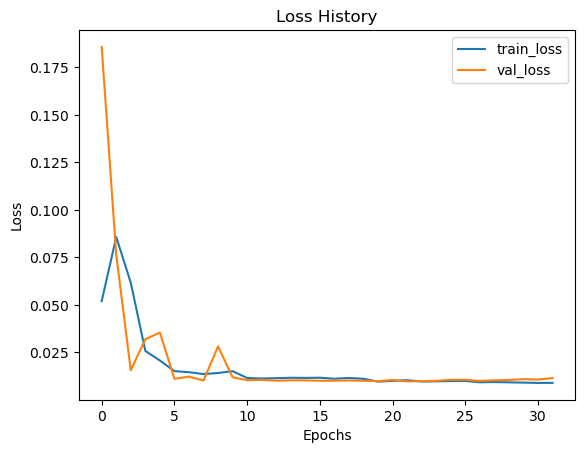

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

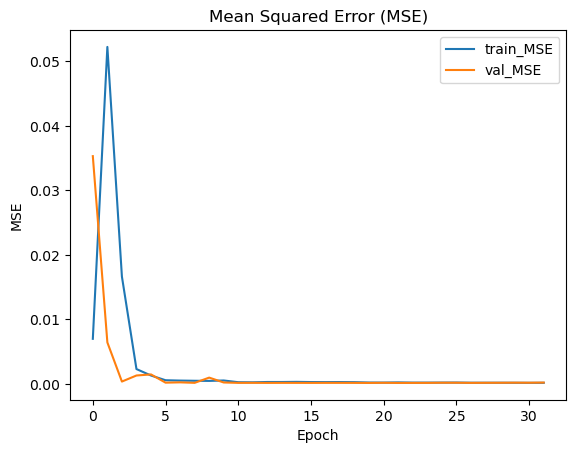

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

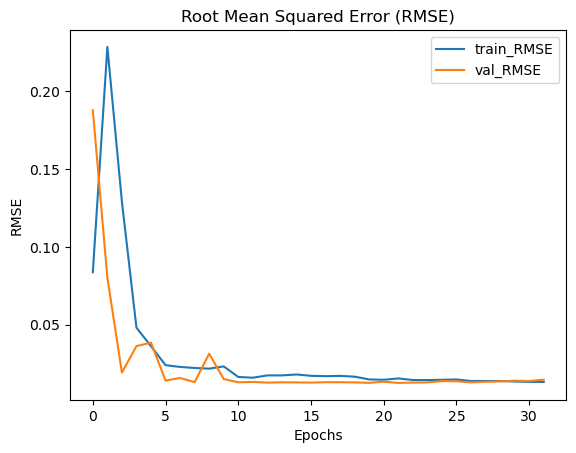

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

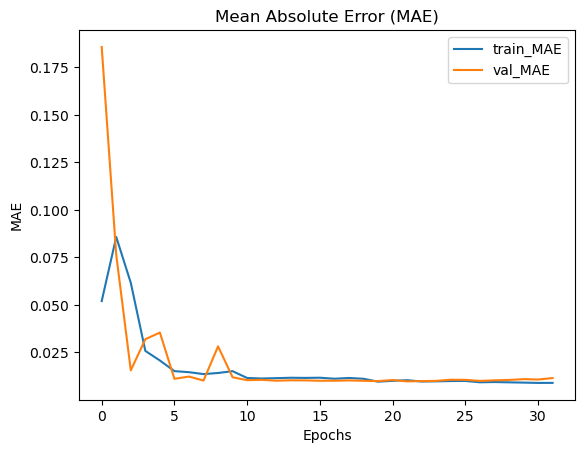

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

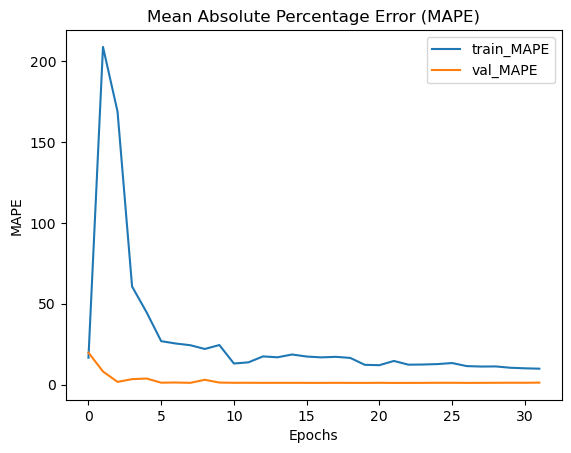

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-15 00:11:40.088339: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7559, 40, 2)
Labels Shape: (7559, 5, 1)
Prediction Shape: (7559, 5, 10)


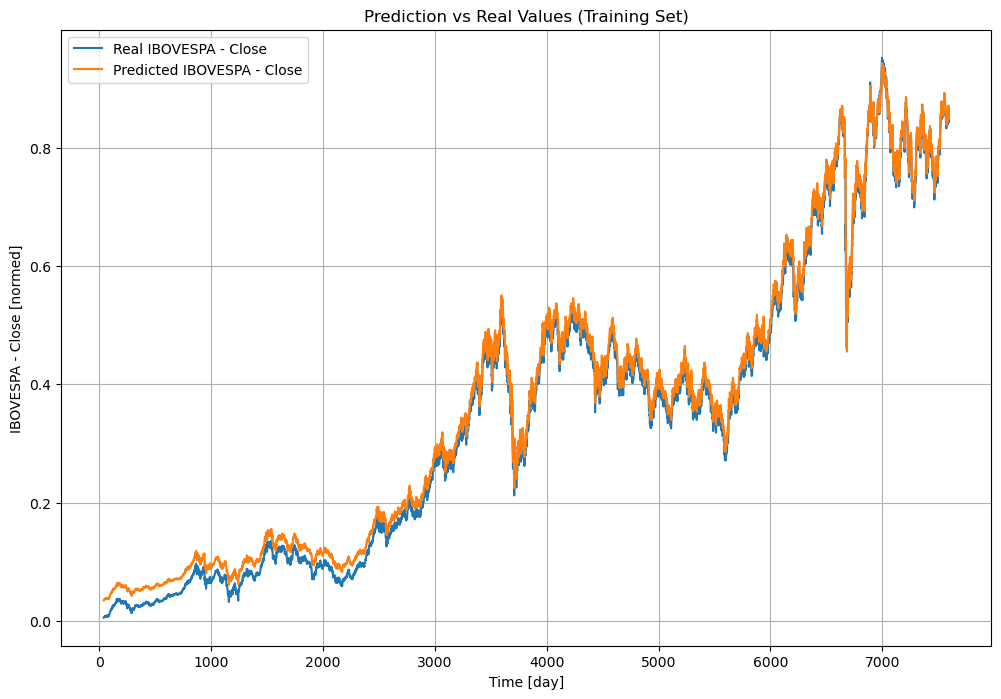

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 2)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


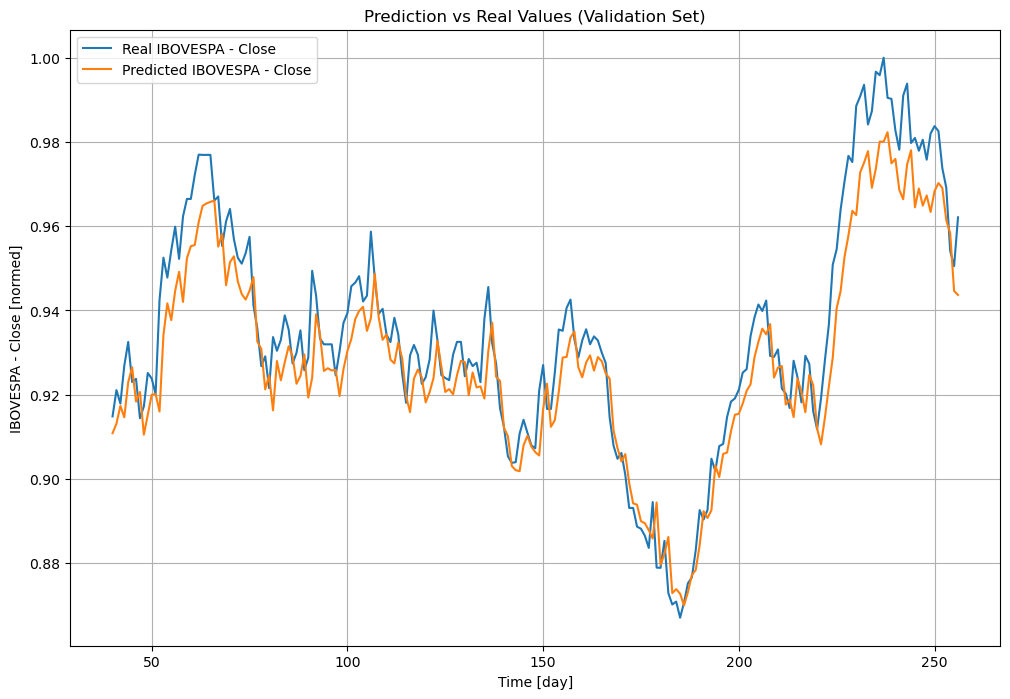

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 2)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


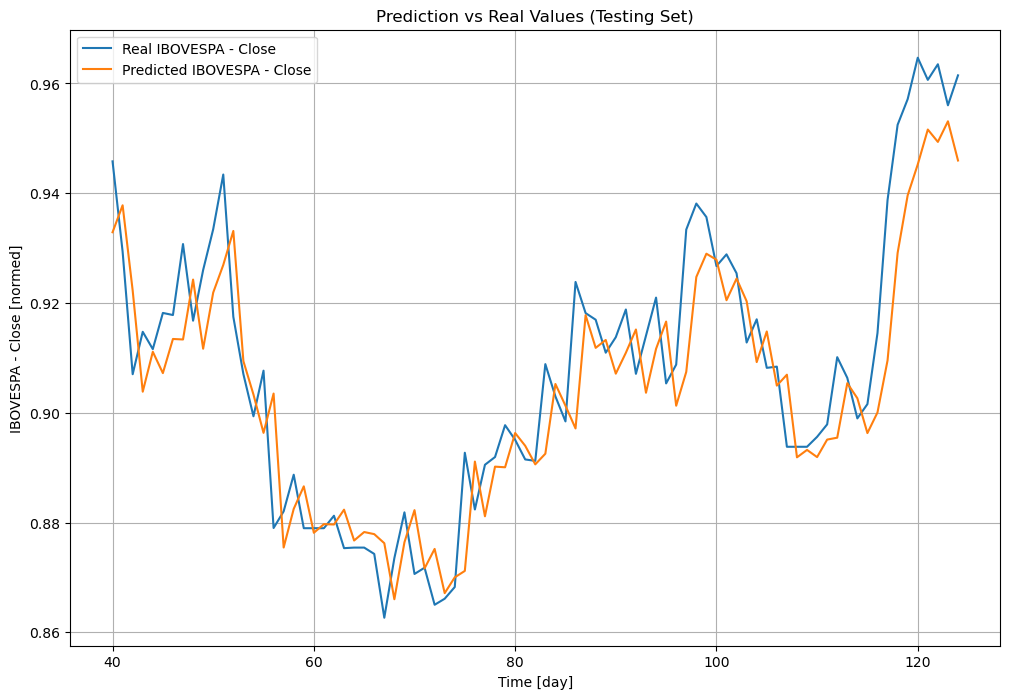

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

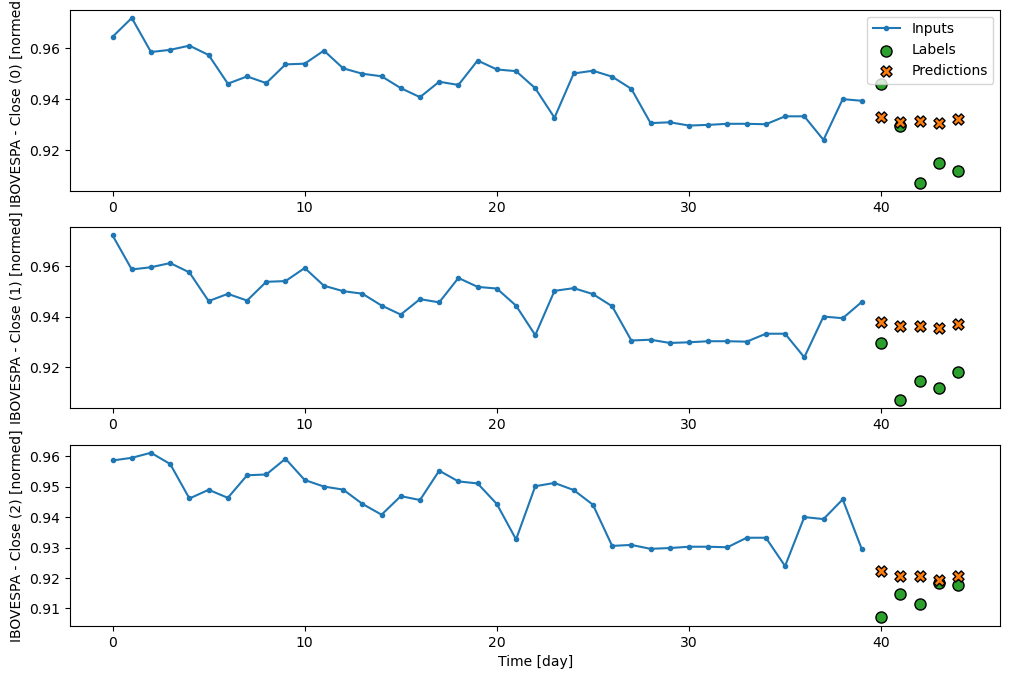

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:4m:26s:306ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step


array([[[0.9328923 , 0.9328923 , 0.9328923 , ..., 0.9328923 ,
         0.9328923 , 0.9328923 ],
        [0.9311118 , 0.9311118 , 0.9311118 , ..., 0.9311118 ,
         0.9311118 , 0.9311118 ],
        [0.93117666, 0.93117666, 0.93117666, ..., 0.93117666,
         0.93117666, 0.93117666],
        [0.9305923 , 0.9305923 , 0.9305923 , ..., 0.9305923 ,
         0.9305923 , 0.9305923 ],
        [0.932271  , 0.932271  , 0.932271  , ..., 0.932271  ,
         0.93227065, 0.93227065]],

       [[0.93780535, 0.93780535, 0.93780535, ..., 0.93780535,
         0.93780535, 0.93780535],
        [0.93618846, 0.93618846, 0.93618846, ..., 0.93618846,
         0.93618846, 0.93618846],
        [0.9361067 , 0.9361067 , 0.9361067 , ..., 0.9361067 ,
         0.9361067 , 0.9361067 ],
        [0.93543845, 0.93543845, 0.93543845, ..., 0.93543845,
         0.93543845, 0.93543845],
        [0.9369478 , 0.9369478 , 0.9369478 , ..., 0.9369478 ,
         0.9369476 , 0.9369476 ]],

       [[0.9222696 , 0.9222696 , 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')